# Historical weather data - Zagreb, Croatia

### Import required packages

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skew, kurtosis
import scipy.stats
%matplotlib inline

In [123]:
# Set LaTex font for graphs
# matplotlib.rcParams['text.usetex']=True
params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
# Define colormap
my_cmap = plt.get_cmap("rainbow")
# Calculate colormap values
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

### Read CSV data into Pandas dataframe

In [124]:
# Read CSV data into dataframe
data = pd.read_csv("weather_data_zagreb.csv")

# Convert string time to datetime object
data['time'] = pd.to_datetime(data['time'])

# Drop all NaN values
data = data.dropna(subset = ['temperature_2m_max (°C)','temperature_2m_mean (°C)'])

# Print dataframe
data

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
1,1940-01-02,3.0,-5.6,-13.8,-8.8,-9.9,-18.4,-13.2,1940-01-02T07:37,1940-01-02T16:22,...,27268.41,0.0,0.0,0.00,0.0,8.4,20.5,48.0,6.56,0.52
2,1940-01-03,2.0,-4.7,-17.2,-11.3,-9.5,-22.0,-16.0,1940-01-03T07:37,1940-01-03T16:23,...,27334.64,0.0,0.0,0.00,0.0,9.7,25.2,226.0,6.15,0.46
3,1940-01-04,71.0,-2.9,-10.7,-6.6,-6.5,-14.9,-10.5,1940-01-04T07:37,1940-01-04T16:24,...,4821.56,0.6,0.0,0.42,6.0,7.3,16.6,353.0,2.92,0.29
4,1940-01-05,3.0,-0.0,-3.6,-1.9,-4.5,-7.3,-6.0,1940-01-05T07:37,1940-01-05T16:25,...,24000.50,0.0,0.0,0.00,0.0,8.7,21.2,13.0,4.92,0.64
5,1940-01-06,1.0,0.5,-2.6,-1.1,-3.3,-6.4,-5.0,1940-01-06T07:36,1940-01-06T16:26,...,26103.36,0.0,0.0,0.00,0.0,8.2,15.1,14.0,5.61,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30642,2023-11-23,2.0,7.0,-1.3,2.9,4.3,-4.3,-0.1,2023-11-23T07:06,2023-11-23T16:18,...,28711.11,0.0,0.0,0.00,0.0,11.8,23.8,270.0,7.28,0.76
30643,2023-11-24,55.0,11.8,-1.4,4.5,9.6,-4.6,1.7,2023-11-24T07:07,2023-11-24T16:17,...,25659.43,2.2,2.2,0.00,4.0,10.8,22.3,346.0,6.80,0.90
30644,2023-11-25,73.0,5.8,-2.0,2.8,1.5,-5.8,-1.0,2023-11-25T07:09,2023-11-25T16:16,...,27902.82,2.6,1.5,0.77,5.0,21.6,47.5,351.0,6.76,1.05
30645,2023-11-26,71.0,6.0,-2.4,1.3,2.6,-6.4,-2.3,2023-11-26T07:10,2023-11-26T16:16,...,26384.30,0.3,0.2,0.07,3.0,10.7,22.3,314.0,6.33,0.81


### White Christmas years

#### Years in which there was a snowfall on a Christmas day

In [125]:
# Filter only Christmas evening and Christmas dates which include snowfall values larger than zero
white_christmas_years = data[((data["time"].dt.day == 24) | (data["time"].dt.day == 25)) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create dataframe copy which contains only two columns
white_christmas_years = white_christmas_years[["time", "snowfall_sum (cm)"]].copy()
# Print dataframe
white_christmas_years

,time,snowfall_sum (cm)
0,1940-12-24,8.19
1,1940-12-25,6.86
2,1943-12-25,2.03
3,1956-12-24,0.07
4,1959-12-24,0.21
5,1959-12-25,0.07
6,1961-12-24,5.81
7,1961-12-25,0.28
8,1962-12-24,0.42
9,1963-12-24,0.21


#### Total number of years with snow on December 24th or December 25th

In [126]:
white_christmas_years["time"].dt.year.nunique()

20

#### Total amount of snowfall during Christmas evening and Christmas day by year

In [127]:
# Total amount of snowfall during Christmas evening and Christmas day by year
total_snowfall_christmas = white_christmas_years["snowfall_sum (cm)"].groupby(white_christmas_years["time"].dt.year).sum()
# Print series
total_snowfall_christmas

time
1940    15.05
1943     2.03
1956     0.07
1959     0.28
1961     6.09
1962     0.42
1963     0.21
1965     4.34
1969     0.07
1970     8.12
1981     0.56
1982    12.32
1984     6.23
1986     0.07
1990     0.56
1993     1.33
1994     7.35
1996     6.02
2002     0.63
2007     6.72
Name: snowfall_sum (cm), dtype: float64

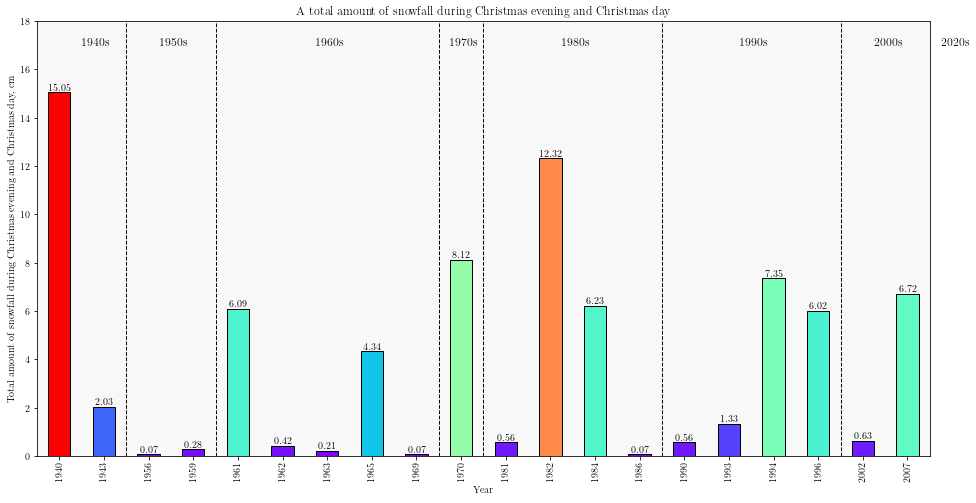

In [128]:
# Plot a total amount of snowfall during Christmas evening and Christmas day
plot = total_snowfall_christmas.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total amount of snowfall during Christmas evening and Christmas day, cm", legend=False, ylim=(0,18), color=my_cmap(rescale(total_snowfall_christmas)), edgecolor="black")
plt.title("A total amount of snowfall during Christmas evening and Christmas day")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Plot vertical decade lines
plt.axvline(x = 19.5, color = 'black', ls="--", lw=1)
plt.axvline(x = 17.5, color = 'black', ls="--", lw=1)
plt.axvline(x = 13.5, color = 'black', ls="--", lw=1)
plt.axvline(x = 9.5, color = 'black', ls="--", lw=1)
plt.axvline(x = 8.5, color = 'black', ls="--", lw=1)
plt.axvline(x = 3.5, color = 'black', ls="--", lw=1)
plt.axvline(x = 1.5, color = 'black', ls="--", lw=1)

plt.text(x=0.5, y=17, s="1940s", fontdict={"fontsize":12})
plt.text(x=2.25, y=17, s="1950s", fontdict={"fontsize":12})
plt.text(x=5.75, y=17, s="1960s", fontdict={"fontsize":12})
plt.text(x=8.75, y=17, s="1970s", fontdict={"fontsize":12})
plt.text(x=11.25, y=17, s="1980s", fontdict={"fontsize":12})
plt.text(x=15.25, y=17, s="1990s", fontdict={"fontsize":12})
plt.text(x=18.25, y=17, s="2000s", fontdict={"fontsize":12})
plt.text(x=19.75, y=17, s="2020s", fontdict={"fontsize":12})

# Save figure to pdf file
plt.savefig('total_amount_of_snowfall_christmas.pdf', bbox_inches='tight')
plt.savefig('total_amount_of_snowfall_christmas.png', bbox_inches='tight', facecolor="white")

#### Minimum, maximum and average temperatures on a Christmas day for a period from 1940 to 2022

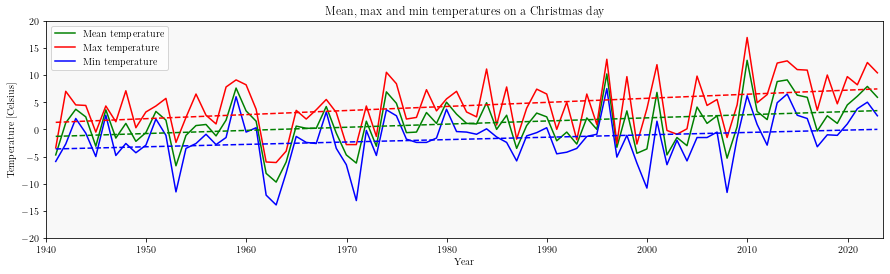

In [129]:
# Filter out Christmas data
christmas_data = data[(data["time"].dt.day == 25) & (data["time"].dt.month == 12)].reset_index(drop=True)

plt.figure().set_figwidth(15)

# Plot minimum, maximum and average temperatures on a Christmas day
plt.plot(christmas_data["time"], christmas_data["temperature_2m_mean (°C)"], label="Mean temperature", color="green", linestyle="-")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_max (°C)"], label="Max temperature", color="red", linestyle="-")
plt.plot(christmas_data["time"], christmas_data["temperature_2m_min (°C)"], label="Min temperature", color="blue", linestyle="-")

# Set xlabel and ylabel names
plt.xlabel("Year")
plt.ylabel("Temperature [Celsius]")

# Set limits of x and y labels
plt.xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 13)])
plt.ylim([-20, 20])

# Plot legends
plt.legend()

# Calculate linear trendlines
z_mean = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_mean (°C)"], 1)
p_mean = np.poly1d(z_mean)
z_max = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_max (°C)"], 1)
p_max = np.poly1d(z_max)
z_min = np.polyfit(christmas_data["time"].dt.year, christmas_data["temperature_2m_min (°C)"], 1)
p_min = np.poly1d(z_min)

# Plot trendlines
plt.plot(christmas_data["time"], p_mean(christmas_data["time"].dt.year), color="green", linestyle="--")
plt.plot(christmas_data["time"], p_max(christmas_data["time"].dt.year), color="red", linestyle="--")
plt.plot(christmas_data["time"], p_min(christmas_data["time"].dt.year), color="blue", linestyle="--")

plt.title("Mean, max and min temperatures on a Christmas day")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('christmas_temperatures.pdf', bbox_inches='tight')

#### Years with snowfall during the period of 5 days before Christmas

In [130]:
# Filter out all the years with the snowfall in the period from December 15th to December 25th
snowfall_before_christmas_years = data[(data["time"].dt.day >= 20) & (data["time"].dt.day <= 25) & (data["time"].dt.month == 12) & (data["snowfall_sum (cm)"] != 0.0)].reset_index(drop=True)
# Create three-column dataframe
snowfall_before_christmas_years = snowfall_before_christmas_years[["time", "temperature_2m_mean (°C)", "snowfall_sum (cm)"]].copy()
# Print dataframe
# snowfall_before_christmas_years.groupby(snowfall_before_christmas_years["time"].dt.year).value_counts()
snowfall_before_christmas_years

,time,temperature_2m_mean (°C),snowfall_sum (cm)
0,1940-12-22,-13.1,1.05
1,1940-12-23,-8.2,2.87
2,1940-12-24,-7.4,8.19
3,1940-12-25,-4.7,6.86
4,1941-12-20,0.9,5.53
...,...,...,...
90,2003-12-22,2.9,0.84
91,2004-12-20,0.1,0.49
92,2006-12-21,2.4,0.14
93,2007-12-24,-2.6,5.60


## Hot days in Zagreb

#### Get all days with max temperature larger than given threshold value

In [131]:
# Define threshold temperature value
max_threshold_temp_value = 33

# Filter out days with maximum temperature values larger than threshold value
hot_days = data[data["temperature_2m_max (°C)"] >= max_threshold_temp_value].reset_index(drop=True)
# Print dataframe
hot_days

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1943-08-21,0.0,34.4,16.4,26.2,35.5,16.7,27.1,1943-08-21T05:03,1943-08-21T18:55,...,45153.57,0.0,0.0,0.0,0.0,7.1,14.4,255.0,23.77,5.02
1,1943-08-22,0.0,34.0,15.9,25.7,34.3,16.1,26.2,1943-08-22T05:04,1943-08-22T18:53,...,44996.73,0.0,0.0,0.0,0.0,8.6,23.0,236.0,23.71,5.37
2,1945-07-26,1.0,33.0,19.7,26.8,34.8,20.7,28.2,1945-07-26T04:32,1945-07-26T19:32,...,47172.03,0.0,0.0,0.0,0.0,7.2,19.8,127.0,26.09,5.62
3,1945-07-27,1.0,34.0,19.0,26.5,35.4,20.7,27.8,1945-07-27T04:33,1945-07-27T19:31,...,50003.09,0.0,0.0,0.0,0.0,9.9,30.6,238.0,24.85,5.71
4,1945-07-28,0.0,35.1,19.5,27.2,36.3,20.8,28.4,1945-07-28T04:35,1945-07-28T19:30,...,49873.89,0.0,0.0,0.0,0.0,13.6,27.4,239.0,26.11,6.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2023-06-23,65.0,34.5,19.0,25.0,36.0,19.9,27.3,2023-06-23T04:06,2023-06-23T19:50,...,42360.87,15.1,15.1,0.0,6.0,23.4,50.0,345.0,22.18,4.87
344,2023-07-17,1.0,34.5,23.0,27.8,38.3,26.1,31.6,2023-07-17T04:22,2023-07-17T19:41,...,50400.00,0.0,0.0,0.0,0.0,14.4,31.0,21.0,25.89,5.62
345,2023-08-25,1.0,33.3,22.1,27.9,38.3,25.5,32.3,2023-08-25T05:08,2023-08-25T18:48,...,43478.55,0.0,0.0,0.0,0.0,7.3,16.9,103.0,20.73,4.40
346,2023-08-26,0.0,34.6,22.6,28.0,38.0,23.9,31.3,2023-08-26T05:09,2023-08-26T18:46,...,43763.41,0.0,0.0,0.0,0.0,10.0,27.4,189.0,21.25,4.86


#### Get a total number of hot days per year

In [132]:
# Get a total number of hot days per each year
total_num_of_hot_days_per_year = hot_days.groupby(hot_days["time"].dt.year)["time"].count()
# Print the total number of hot days per each year
total_num_of_hot_days_per_year

time
1943     2
1945     7
1946    14
1947     3
1949     5
1950    16
1951     1
1952    12
1956     1
1957     8
1958     6
1961     2
1963     1
1965     1
1967     1
1968     2
1970     2
1971     1
1979     1
1980     1
1981     1
1983     7
1984     2
1987     3
1988    13
1992    15
1993     8
1994     4
1997     1
1998     5
1999     2
2000    11
2001     9
2002     1
2003    13
2005     3
2006     3
2007    14
2008     2
2009     5
2010     6
2011    12
2012    25
2013    16
2015    15
2016     3
2017    26
2018     1
2019     7
2021    12
2022     9
2023     7
Name: time, dtype: int64

#### Plot the total number of hot days for each year

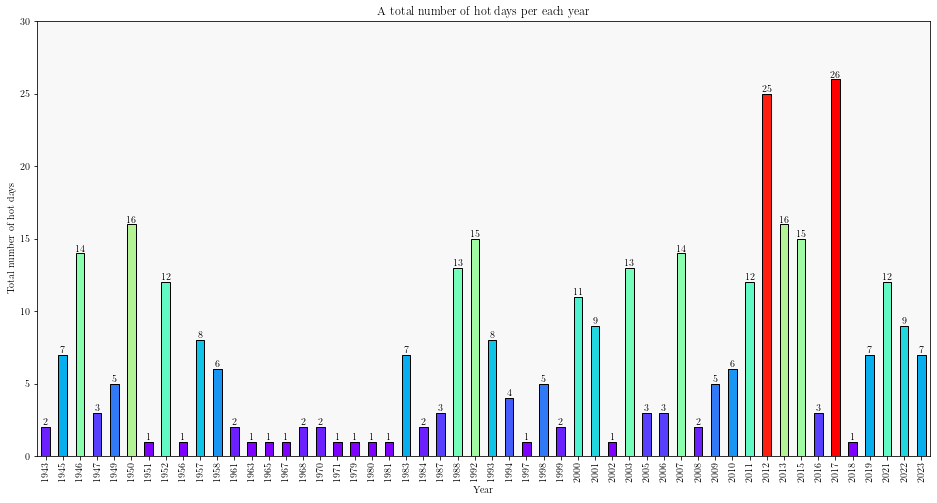

In [133]:
# Plot a total number of hot days per each year
plot = total_num_of_hot_days_per_year.plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of hot days", legend=False, ylim=(0,30), color=my_cmap(rescale(total_num_of_hot_days_per_year)), edgecolor="black")
plt.title("A total number of hot days per each year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_hot_days_per_each_year.pdf', bbox_inches='tight')

#### Get a total number of years with at least one hot day

In [134]:
# Get a total number of years with at least one hot day
total_num_of_years_with_at_least_one_hot_day = total_num_of_hot_days_per_year.size
# Print out the value
print("A total number of years with at least one hot day:", total_num_of_years_with_at_least_one_hot_day)

A total number of years with at least one hot day: 52


#### Get a total number of years without any hot day

In [135]:
# Get a total number of years without any hot day
total_num_of_years_without_any_hot_day = len(data["time"].dt.year.unique()) - total_num_of_years_with_at_least_one_hot_day
# Print out the value
print("A total number of years without any hot day:", total_num_of_years_without_any_hot_day)

A total number of years without any hot day: 32


#### Total number of hot days per each decade

In [136]:
# Data by decades
_40s = data[(data["time"].dt.year >= 1940) & (data["time"].dt.year <= 1949)]
_50s = data[(data["time"].dt.year >= 1950) & (data["time"].dt.year <= 1959)]
_60s = data[(data["time"].dt.year >= 1960) & (data["time"].dt.year <= 1969)]
_70s = data[(data["time"].dt.year >= 1970) & (data["time"].dt.year <= 1979)]
_80s = data[(data["time"].dt.year >= 1980) & (data["time"].dt.year <= 1989)]
_90s = data[(data["time"].dt.year >= 1990) & (data["time"].dt.year <= 1999)]
_00s = data[(data["time"].dt.year >= 2000) & (data["time"].dt.year <= 2009)]
_10s = data[(data["time"].dt.year >= 2010) & (data["time"].dt.year <= 2019)]
_20s = data[(data["time"].dt.year >= 2020) & (data["time"].dt.year <= 2029)]

In [137]:
# Store a total number of hot days in each decade into dictionary
total_num_of_hot_days_per_decade = {
    "1940-1949": _40s[_40s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1950-1959": _50s[_50s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1960-1969": _60s[_60s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1970-1979": _70s[_70s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1980-1989": _80s[_80s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "1990-1999": _90s[_90s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2000-2009": _00s[_00s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2010-2019": _10s[_10s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count(),
    "2020-2029": _20s[_20s["temperature_2m_max (°C)"] >= max_threshold_temp_value]["temperature_2m_max (°C)"].count()
}

# Convert dictionary to dataframe
total_num_of_hot_days_per_decade = pd.DataFrame.from_dict([total_num_of_hot_days_per_decade]).transpose().rename(columns={0: "Total number of hot days"})
total_num_of_hot_days_per_decade

,Total number of hot days
1940-1949,31
1950-1959,44
1960-1969,7
1970-1979,4
1980-1989,27
1990-1999,35
2000-2009,61
2010-2019,111
2020-2029,28


#### Plot a total number of hot days per decade

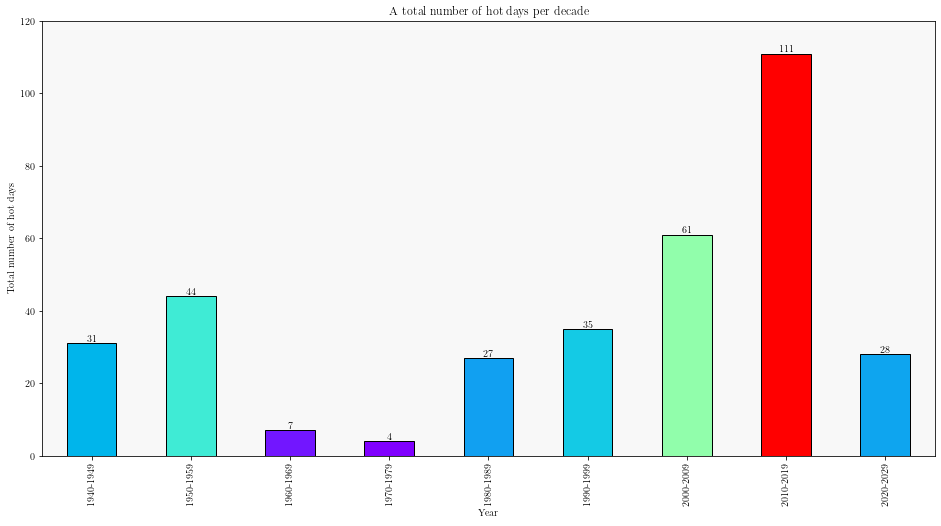

In [138]:
# Plot a total number of hot days per decade
plot = total_num_of_hot_days_per_decade["Total number of hot days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of hot days", legend=False, ylim=(0,120), color=my_cmap(rescale(total_num_of_hot_days_per_decade["Total number of hot days"])), edgecolor="black")
plt.title("A total number of hot days per decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_hot_days_per_decades.pdf', bbox_inches='tight')

## Heatwaves in Zagreb

#### Create heatwaves dataframe that stores only heatwave data (three or more consecutive days with max temperatures larger than given threshold value)

In [139]:
# Every time we see a date with a difference greater than a day, we add a value to that date. 
# Otherwise it remains with the previous value so that we end up with a unique identifier per group.
hot_days['grp_date'] = hot_days["time"].diff().dt.days.ne(1).cumsum()

In [140]:
# Calculate the total number of consecutive hot days by counting the equal grp_date values
num_of_consecutive_hot_days = hot_days.groupby('grp_date')['grp_date'].count()

In [141]:
# Join dataframes on grp_date column values
df = hot_days.join(num_of_consecutive_hot_days, on="grp_date", lsuffix="", rsuffix="_total_number")
# Consider only that days with number larger than 3, i.e. we shall assume that heatwaves occur when 3 
# or more days are hotter than given threshold value.
heat_waves = df[df["grp_date_total_number"] >= 3].reset_index(drop=True)
# Print heatwaves dataframe
heat_waves

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
0,1945-07-26,1.0,33.0,19.7,26.8,34.8,20.7,28.2,1945-07-26T04:32,1945-07-26T19:32,...,0.0,0.0,0.0,7.2,19.8,127.0,26.09,5.62,2,3
1,1945-07-27,1.0,34.0,19.0,26.5,35.4,20.7,27.8,1945-07-27T04:33,1945-07-27T19:31,...,0.0,0.0,0.0,9.9,30.6,238.0,24.85,5.71,2,3
2,1945-07-28,0.0,35.1,19.5,27.2,36.3,20.8,28.4,1945-07-28T04:35,1945-07-28T19:30,...,0.0,0.0,0.0,13.6,27.4,239.0,26.11,6.23,2,3
3,1946-08-09,1.0,34.0,19.7,27.5,35.0,19.4,28.0,1946-08-09T04:49,1946-08-09T19:14,...,0.0,0.0,0.0,6.3,17.6,48.0,23.81,5.31,9,5
4,1946-08-10,0.0,34.8,19.8,27.8,36.2,21.3,29.0,1946-08-10T04:50,1946-08-10T19:12,...,0.0,0.0,0.0,8.2,21.6,263.0,23.29,5.37,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2023-06-22,1.0,33.6,22.2,27.9,39.3,24.9,32.3,2023-06-22T04:06,2023-06-22T19:49,...,0.0,0.0,0.0,11.1,20.2,294.0,27.45,5.77,167,3
167,2023-06-23,65.0,34.5,19.0,25.0,36.0,19.9,27.3,2023-06-23T04:06,2023-06-23T19:50,...,15.1,0.0,6.0,23.4,50.0,345.0,22.18,4.87,167,3
168,2023-08-25,1.0,33.3,22.1,27.9,38.3,25.5,32.3,2023-08-25T05:08,2023-08-25T18:48,...,0.0,0.0,0.0,7.3,16.9,103.0,20.73,4.40,169,3
169,2023-08-26,0.0,34.6,22.6,28.0,38.0,23.9,31.3,2023-08-26T05:09,2023-08-26T18:46,...,0.0,0.0,0.0,10.0,27.4,189.0,21.25,4.86,169,3


#### Total number of heatwave days per year

In [142]:
# Calculate total number of heatwave days per each year
num_of_heatwave_days_per_year = heat_waves.groupby(heat_waves["time"].dt.year)["grp_date"].count().to_frame(name="Num of heatwave days")
# Print dataframe
num_of_heatwave_days_per_year["Num of heatwave days"]

time
1945     3
1946     8
1950    13
1952     5
1957     8
1958     3
1983     3
1988     3
1992    12
1993     3
2000     6
2001     6
2005     3
2007    10
2010     4
2011     9
2012    15
2013    15
2015    11
2017    18
2021     4
2022     3
2023     6
Name: Num of heatwave days, dtype: int64

In [143]:
# Total number of years with heatwaves
number_of_years_with_heatwaves, _ = num_of_heatwave_days_per_year.shape
print("Number of years with heatwaves:", number_of_years_with_heatwaves)

Number of years with heatwaves: 23


#### Plot a total number of heatwave days per year

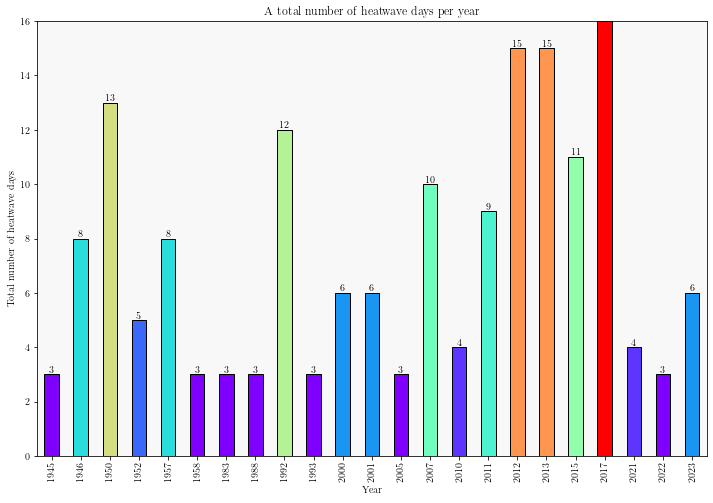

In [144]:
# Plot a total number of heatwave days per year
plot = num_of_heatwave_days_per_year["Num of heatwave days"].plot(kind="bar", figsize=(12,8), xlabel="Year", ylabel="Total number of heatwave days", legend=False, ylim=(0,16), color=my_cmap(rescale(num_of_heatwave_days_per_year["Num of heatwave days"])), edgecolor="black")
plt.title("A total number of heatwave days per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwave_days_per_year.pdf', bbox_inches='tight')

#### Total number of heatwave days per decades

In [145]:
# Heatwave data by decades
_40s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1940) & (heat_waves["time"].dt.year <= 1949)]
_50s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1950) & (heat_waves["time"].dt.year <= 1959)]
_60s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1960) & (heat_waves["time"].dt.year <= 1969)]
_70s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1970) & (heat_waves["time"].dt.year <= 1979)]
_80s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1980) & (heat_waves["time"].dt.year <= 1989)]
_90s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 1990) & (heat_waves["time"].dt.year <= 1999)]
_00s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2000) & (heat_waves["time"].dt.year <= 2009)]
_10s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2010) & (heat_waves["time"].dt.year <= 2019)]
_20s_heatwave_days = heat_waves[(heat_waves["time"].dt.year >= 2020) & (heat_waves["time"].dt.year <= 2029)]


In [146]:
# Store total number of heatwave days per decades in dictionary
total_num_of_heatwave_days_per_decade = {
    "1940-1949": _40s_heatwave_days["time"].size,
    "1950-1959": _50s_heatwave_days["time"].size,
    "1960-1969": _60s_heatwave_days["time"].size,
    "1970-1979": _70s_heatwave_days["time"].size,
    "1980-1989": _80s_heatwave_days["time"].size,
    "1990-1999": _90s_heatwave_days["time"].size,
    "2000-2009": _00s_heatwave_days["time"].size,
    "2010-2019": _10s_heatwave_days["time"].size,
    "2020-2029": _20s_heatwave_days["time"].size
}

# Convert dictionary to dataframe
total_num_of_heatwave_days_per_decade = pd.DataFrame.from_dict([total_num_of_heatwave_days_per_decade]).transpose().rename(columns={0: "Total number of heatwave days"})
total_num_of_heatwave_days_per_decade

,Total number of heatwave days
1940-1949,11
1950-1959,29
1960-1969,0
1970-1979,0
1980-1989,6
1990-1999,15
2000-2009,25
2010-2019,72
2020-2029,13


#### Plot a total number of heatwave days per decade

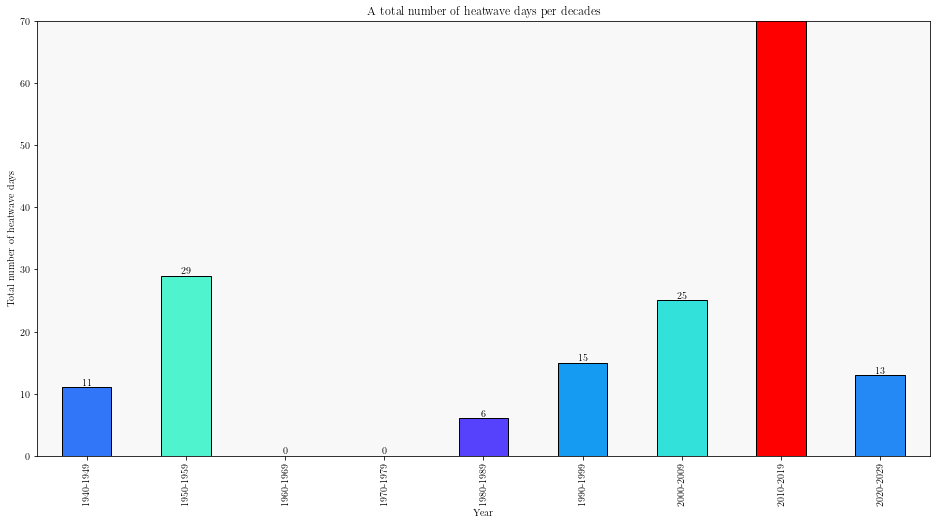

In [147]:
# Plot a total number of heatwave days per decade
plot = total_num_of_heatwave_days_per_decade["Total number of heatwave days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of heatwave days", legend=False, ylim=(0,70), color=my_cmap(rescale(total_num_of_heatwave_days_per_decade["Total number of heatwave days"])), edgecolor="black")
plt.title("A total number of heatwave days per decades")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwave_days_per_decades.pdf', bbox_inches='tight')

#### Total number of heatwaves per year

In [148]:
# Determine total number of heatwaves per year
total_num_of_heatwaves_per_year = heat_waves.groupby(heat_waves.time.dt.year)["grp_date"].unique().apply(lambda x: len(x))
# Print series
total_num_of_heatwaves_per_year

time
1945    1
1946    2
1950    2
1952    1
1957    2
1958    1
1983    1
1988    1
1992    3
1993    1
2000    1
2001    2
2005    1
2007    1
2010    1
2011    2
2012    3
2013    3
2015    3
2017    4
2021    1
2022    1
2023    2
Name: grp_date, dtype: int64

#### Plot total number of heatwaves per year

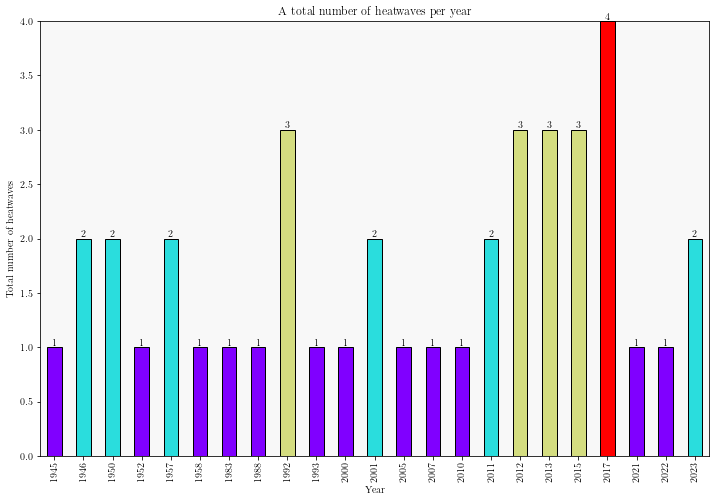

In [149]:
# Plot a total number of heatwaves per year
plot = total_num_of_heatwaves_per_year.plot(kind="bar", figsize=(12,8), xlabel="Year", ylabel="Total number of heatwaves", legend=False, ylim=(0,4), color=my_cmap(rescale(total_num_of_heatwaves_per_year)), edgecolor="black")
plt.title("A total number of heatwaves per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwaves_per_year.pdf', bbox_inches='tight')

#### Total number of heatwaves per decades

In [150]:
# Create dataframes with the total number of heatwaves per each decade
_40s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1940 and key <= 1949}
_50s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1950 and key <= 1959}
_60s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1960 and key <= 1969}
_70s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1970 and key <= 1979}
_80s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1980 and key <= 1989}
_90s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 1990 and key <= 1999}
_00s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2000 and key <= 2009}
_10s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2010 and key <= 2019}
_20s_num_of_heatwaves = {key:value for (key, value) in total_num_of_heatwaves_per_year.to_dict().items() if key >= 2020 and key <= 2029}

In [151]:
# Store total number of heatwaves per decades in dictionary
total_num_of_heatwaves_per_decade = {
    "1940-1949": len(_40s_num_of_heatwaves.items()),
    "1950-1959": len(_50s_num_of_heatwaves.items()),
    "1960-1969": len(_60s_num_of_heatwaves.items()),
    "1970-1979": len(_70s_num_of_heatwaves.items()),
    "1980-1989": len(_80s_num_of_heatwaves.items()),
    "1990-1999": len(_90s_num_of_heatwaves.items()),
    "2000-2009": len(_00s_num_of_heatwaves.items()),
    "2010-2019": len(_10s_num_of_heatwaves.items()),
    "2020-2029": len(_20s_num_of_heatwaves.items())
}

# Convert dictionary to dataframe
total_num_of_heatwaves_per_decade = pd.DataFrame.from_dict([total_num_of_heatwaves_per_decade]).transpose().rename(columns={0: "Total number of heatwaves"})
total_num_of_heatwaves_per_decade

,Total number of heatwaves
1940-1949,2
1950-1959,4
1960-1969,0
1970-1979,0
1980-1989,2
1990-1999,2
2000-2009,4
2010-2019,6
2020-2029,3


#### Plot a total number of heatwaves per each decade

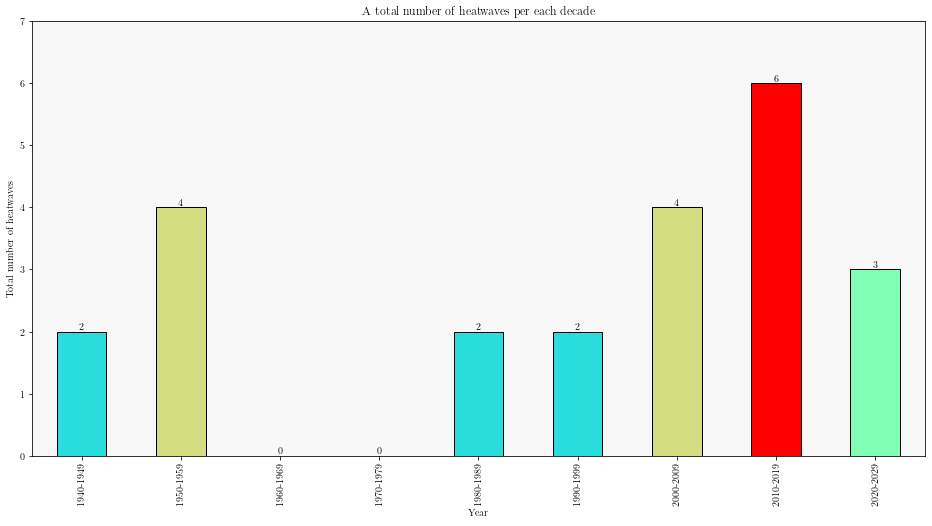

In [152]:
# Plot a total number of heatwaves per decades
plot = total_num_of_heatwaves_per_decade["Total number of heatwaves"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of heatwaves", legend=False, ylim=(0,7), color=my_cmap(rescale(total_num_of_heatwaves_per_decade["Total number of heatwaves"])), edgecolor="black")
plt.title("A total number of heatwaves per each decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_heatwaves_per_decades.pdf', bbox_inches='tight')

#### Bubble plot total number of heatwave days and heatwaves per year

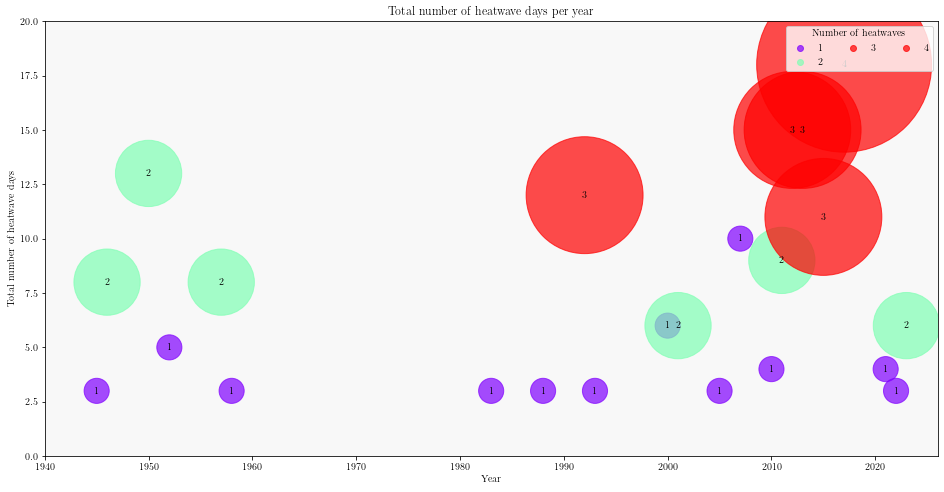

In [153]:
# Get colormap with wanted number of values (3 in our case)
cm = plt.cm.get_cmap('rainbow', 3)

# Plot scatter data using colormap
sc = plt.scatter(
    x=heat_waves["time"].dt.year.unique(), 
    y=num_of_heatwave_days_per_year["Num of heatwave days"],
    s=[(i*10)**2.8 for i in total_num_of_heatwaves_per_year.to_list()],
    c=total_num_of_heatwaves_per_year,
    alpha=0.7,
    vmin=1,
    vmax=3,
    cmap=cm)

plt.gcf().set_figwidth(16)
plt.gcf().set_figheight(8)

ax = plt.gca()
ax.set_facecolor("#F8F8F8")
ax.set_ylim((0,20))
ax.set_xlim((1940,2026))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of heatwave days")
ax.set_title("Total number of heatwave days per year")

# Produce a legend with a cross-section of sizes from the scatter
handles, labels = sc.legend_elements(alpha=0.7)
legend = ax.legend(handles, labels, loc="upper right", title="Number of heatwaves", ncol=3)

# Define colorbar with a list of wanted ticks distribution
# cbar = plt.gcf().colorbar(sc, ticks=[i for i in range(0,4)], label="Number of heatwaves")

# Add labels to all points
for (xi, yi, zi) in zip(heat_waves["time"].dt.year.unique().tolist(), num_of_heatwave_days_per_year["Num of heatwave days"].to_list(), total_num_of_heatwaves_per_year.to_list()):
    plt.annotate(zi, (xi,yi), ha='center', va="center")
    
# Save figure to pdf file
plt.savefig('bubbleplot_heatwave_days_and_heatwaves_per_year.pdf', bbox_inches='tight')

## Cold days in Zagreb

#### Get all days with max daily temperature lower than freezing temperature

In [154]:
# Define threshold cold temperature value
cold_threshold_temp_value = 0

# Filter out days with temperature values lower than freezing temperature
cold_days = data[data["temperature_2m_max (°C)"] < cold_threshold_temp_value].reset_index(drop=True)
# Print dataframe
cold_days

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-01-02,3.0,-5.6,-13.8,-8.8,-9.9,-18.4,-13.2,1940-01-02T07:37,1940-01-02T16:22,...,27268.41,0.0,0.0,0.00,0.0,8.4,20.5,48.0,6.56,0.52
1,1940-01-03,2.0,-4.7,-17.2,-11.3,-9.5,-22.0,-16.0,1940-01-03T07:37,1940-01-03T16:23,...,27334.64,0.0,0.0,0.00,0.0,9.7,25.2,226.0,6.15,0.46
2,1940-01-04,71.0,-2.9,-10.7,-6.6,-6.5,-14.9,-10.5,1940-01-04T07:37,1940-01-04T16:24,...,4821.56,0.6,0.0,0.42,6.0,7.3,16.6,353.0,2.92,0.29
3,1940-01-07,0.0,-0.3,-3.7,-1.6,-3.7,-7.8,-5.1,1940-01-07T07:36,1940-01-07T16:27,...,27646.87,0.0,0.0,0.00,0.0,6.8,12.2,45.0,6.71,0.58
4,1940-01-08,1.0,-1.3,-4.3,-2.7,-4.7,-8.4,-6.5,1940-01-08T07:36,1940-01-08T16:28,...,27736.20,0.0,0.0,0.00,0.0,7.5,14.8,28.0,6.56,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2019-01-23,73.0,-1.1,-2.6,-2.1,-4.4,-6.4,-5.6,2019-01-23T07:27,2019-01-23T16:47,...,12.79,4.4,0.0,3.08,18.0,11.8,22.3,49.0,2.95,0.32
1358,2019-01-26,2.0,-0.6,-8.9,-4.4,-4.5,-13.6,-8.6,2019-01-26T07:24,2019-01-26T16:52,...,26437.14,0.0,0.0,0.00,0.0,11.1,22.7,247.0,6.93,0.60
1359,2021-02-12,1.0,-1.2,-6.3,-4.3,-6.3,-11.1,-9.1,2021-02-12T07:02,2021-02-12T17:18,...,33177.82,0.0,0.0,0.00,0.0,12.0,29.5,36.0,11.44,1.21
1360,2021-02-13,3.0,-1.8,-6.6,-4.4,-7.8,-11.5,-9.6,2021-02-13T07:00,2021-02-13T17:19,...,28159.37,0.0,0.0,0.00,0.0,17.3,37.8,41.0,9.54,1.12


#### Get a total number of cold days per each year

In [155]:
# Get a total number of cold days per each year
total_num_of_cold_days_per_year = cold_days.groupby(cold_days["time"].dt.year)["time"].count()
# Print the total number of cold days per each year
total_num_of_cold_days_per_year

time
1940    68
1941    32
1942    48
1943    13
1944    14
        ..
2017    19
2018     8
2019     2
2021     2
2022     1
Name: time, Length: 80, dtype: int64

#### Plot a total number of cold days for each year

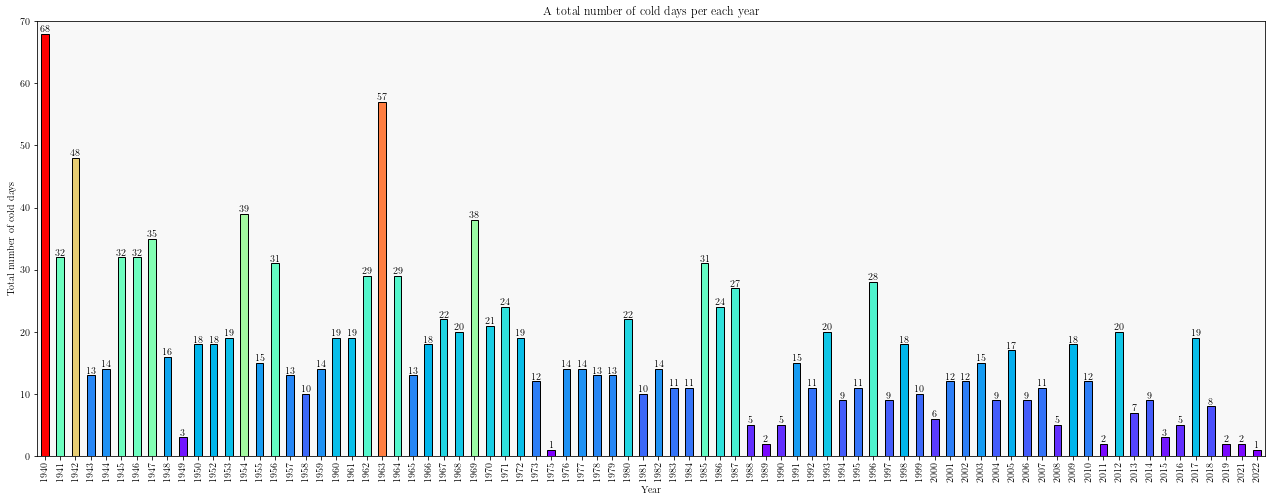

In [156]:
# Plot a total number of cold days per each year
plot = total_num_of_cold_days_per_year.plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total number of cold days", legend=False, ylim=(0,70), color=my_cmap(rescale(total_num_of_cold_days_per_year)), edgecolor="black")
plt.title("A total number of cold days per each year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_cold_days_per_each_year.pdf', bbox_inches='tight')

#### Get a total number of years with at least one cold day

In [157]:
# Get a total number of years with at least one cold day
total_num_of_years_with_at_least_one_cold_day = total_num_of_cold_days_per_year.size
# Print out the value
print("A total number of years with at least one cold day:", total_num_of_years_with_at_least_one_cold_day)

A total number of years with at least one cold day: 80


#### Get a total number of years without any cold day

In [158]:
# Get a total number of years without any cold day
total_num_of_years_without_any_cold_day = len(data["time"].dt.year.unique()) - total_num_of_years_with_at_least_one_cold_day
# Print out the value
print("A total number of years without any cold day:", total_num_of_years_without_any_cold_day)

A total number of years without any cold day: 4


#### Years without any cold day

In [159]:
# Filter out years without any cold day
years_without_any_cold_day = []
for year in data["time"].dt.year.unique():
    if year not in cold_days["time"].dt.year.unique():
        years_without_any_cold_day.append(year)

# Print years       
print("Years without any cold day:", years_without_any_cold_day)

Years without any cold day: [1951, 1974, 2020, 2023]


#### Total number of cold days per each decade

In [160]:
# Store a total number of cold days in each decade into dictionary
total_num_of_cold_days_per_decade = {
    "1940-1949": _40s[_40s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1950-1959": _50s[_50s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1960-1969": _60s[_60s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1970-1979": _70s[_70s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1980-1989": _80s[_80s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "1990-1999": _90s[_90s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "2000-2009": _00s[_00s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "2010-2019": _10s[_10s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count(),
    "2020-2029": _20s[_20s["temperature_2m_max (°C)"] < 0]["temperature_2m_max (°C)"].count()
}

# Convert dictionary to dataframe
total_num_of_cold_days_per_decade = pd.DataFrame.from_dict([total_num_of_cold_days_per_decade]).transpose().rename(columns={0: "Total number of cold days"})
total_num_of_cold_days_per_decade

,Total number of cold days
1940-1949,293
1950-1959,177
1960-1969,264
1970-1979,131
1980-1989,157
1990-1999,136
2000-2009,114
2010-2019,87
2020-2029,3


#### Plot a total number of cold days per decades

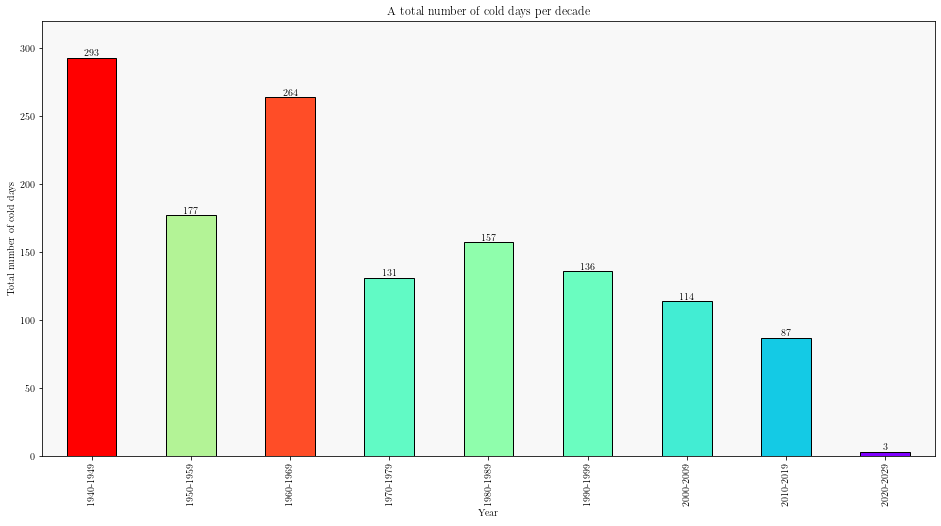

In [161]:
# Plot a total number of cold days per decade
plot = total_num_of_cold_days_per_decade["Total number of cold days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of cold days", legend=False, ylim=(0,320), color=my_cmap(rescale(total_num_of_cold_days_per_decade["Total number of cold days"])), edgecolor="black")
plt.title("A total number of cold days per decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_cold_days_per_decades.pdf', bbox_inches='tight')

## Coldwaves in Zagreb

#### Create coldwaves dataframe that stores only coldwave data (three or more consecutive days with max temperatures below freezing threshold value)

In [162]:
# Every time we see a date with a difference greater than a day, we add a value to that date. 
# Otherwise it remains with the previous value so that we end up with a unique identifier per group.
cold_days['grp_date'] = cold_days["time"].diff().dt.days.ne(1).cumsum()

In [163]:
# Calculate the total number of consecutive cold days by counting the equal grp_date values
num_of_consecutive_cold_days = cold_days.groupby('grp_date')['grp_date'].count()

In [164]:
# Join dataframes on grp_date column values
df = cold_days.join(num_of_consecutive_cold_days, on="grp_date", lsuffix="", rsuffix="_total_number")
# Consider only that days with number larger than 3, i.e. we shall assume that heatwaves occur when 3 
# or more days are below given freezing threshold value.
cold_waves = df[df["grp_date_total_number"] >= 3].reset_index(drop=True)
# Print heatwaves dataframe
cold_waves

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
0,1940-01-02,3.0,-5.6,-13.8,-8.8,-9.9,-18.4,-13.2,1940-01-02T07:37,1940-01-02T16:22,...,0.0,0.00,0.0,8.4,20.5,48.0,6.56,0.52,1,3
1,1940-01-03,2.0,-4.7,-17.2,-11.3,-9.5,-22.0,-16.0,1940-01-03T07:37,1940-01-03T16:23,...,0.0,0.00,0.0,9.7,25.2,226.0,6.15,0.46,1,3
2,1940-01-04,71.0,-2.9,-10.7,-6.6,-6.5,-14.9,-10.5,1940-01-04T07:37,1940-01-04T16:24,...,0.0,0.42,6.0,7.3,16.6,353.0,2.92,0.29,1,3
3,1940-01-07,0.0,-0.3,-3.7,-1.6,-3.7,-7.8,-5.1,1940-01-07T07:36,1940-01-07T16:27,...,0.0,0.00,0.0,6.8,12.2,45.0,6.71,0.58,2,19
4,1940-01-08,1.0,-1.3,-4.3,-2.7,-4.7,-8.4,-6.5,1940-01-08T07:36,1940-01-08T16:28,...,0.0,0.00,0.0,7.5,14.8,28.0,6.56,0.56,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2018-02-27,73.0,-6.4,-10.0,-8.3,-12.4,-15.5,-14.2,2018-02-27T06:38,2018-02-27T17:39,...,0.0,2.59,22.0,25.1,48.6,18.0,9.45,0.71,348,7
1107,2018-02-28,3.0,-5.8,-16.3,-10.4,-9.7,-21.1,-14.8,2018-02-28T06:36,2018-02-28T17:40,...,0.0,0.00,0.0,11.2,22.0,17.0,13.93,0.90,348,7
1108,2018-03-01,73.0,-6.3,-16.1,-10.2,-10.1,-20.9,-14.4,2018-03-01T06:34,2018-03-01T17:42,...,0.2,3.36,15.0,8.2,15.5,74.0,7.34,0.46,348,7
1109,2018-03-02,73.0,-2.3,-6.2,-4.5,-5.5,-10.1,-7.8,2018-03-02T06:32,2018-03-02T17:43,...,1.1,0.77,8.0,5.8,10.8,30.0,6.07,0.54,348,7


#### Total number of coldwave days per year

Why is there only one coldwave day in 2015? <br><br>
This is because coldwave from the end of 2014 extends into 2015 and algorithm also detects it as a 2015 year coldwave!

In [165]:
# Just to show why there is only one coldwave day in 2015!
cold_waves[(cold_waves.time.dt.year == 2014) | (cold_waves.time.dt.year == 2015) | (cold_waves.time.dt.year == 2016)]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),grp_date,grp_date_total_number
1072,2014-01-25,71.0,-0.1,-7.9,-2.3,-4.5,-12.3,-6.7,2014-01-25T07:25,2014-01-25T16:51,...,0.0,0.77,4.0,16.6,45.7,43.0,7.71,0.69,339,5
1073,2014-01-26,71.0,-3.3,-11.3,-7.3,-6.9,-15.6,-11.3,2014-01-26T07:24,2014-01-26T16:52,...,0.0,0.28,2.0,8.7,12.6,85.0,6.72,0.47,339,5
1074,2014-01-27,3.0,-1.4,-13.3,-7.6,-5.0,-17.7,-11.4,2014-01-27T07:23,2014-01-27T16:53,...,0.0,0.00,0.0,7.9,14.4,49.0,6.55,0.50,339,5
1075,2014-01-28,73.0,-1.3,-9.8,-5.5,-5.1,-14.0,-9.3,2014-01-28T07:22,2014-01-28T16:55,...,0.0,1.47,9.0,7.6,15.5,34.0,4.75,0.40,339,5
1076,2014-01-29,73.0,-0.7,-6.8,-3.6,-3.7,-11.0,-7.1,2014-01-29T07:21,2014-01-29T16:56,...,0.0,1.68,11.0,8.1,15.5,73.0,4.50,0.43,339,5
1077,2014-12-28,75.0,-0.2,-4.8,-1.8,-4.6,-11.7,-7.3,2014-12-28T07:36,2014-12-28T16:18,...,0.0,15.54,23.0,27.8,59.4,31.0,1.35,0.39,340,5
1078,2014-12-29,71.0,-1.4,-8.9,-5.1,-5.1,-13.5,-10.0,2014-12-29T07:37,2014-12-29T16:19,...,0.0,0.14,0.0,23.9,54.7,9.0,6.27,0.71,340,5
1079,2014-12-30,71.0,-2.8,-13.6,-9.2,-7.8,-18.7,-14.0,2014-12-30T07:37,2014-12-30T16:19,...,0.0,0.28,1.0,15.5,36.4,12.0,6.09,0.43,340,5
1080,2014-12-31,2.0,-6.4,-18.3,-12.3,-11.6,-23.4,-17.1,2014-12-31T07:37,2014-12-31T16:20,...,0.0,0.00,0.0,12.7,28.8,30.0,6.48,0.34,340,5
1081,2015-01-01,3.0,-4.3,-19.2,-10.9,-8.2,-24.0,-15.1,2015-01-01T07:37,2015-01-01T16:21,...,0.0,0.00,0.0,6.3,14.4,270.0,1.70,0.19,340,5


In [166]:
# Calculate total number of coldwave days per each year
num_of_coldwave_days_per_year = cold_waves.groupby(cold_waves["time"].dt.year)["grp_date"].count().to_frame(name="Num of coldwave days")
# Print dataframe
num_of_coldwave_days_per_year["Num of coldwave days"]

time
1940    64
1941    25
1942    48
1943     9
1944    12
        ..
2014     9
2015     1
2016     3
2017    19
2018     7
Name: Num of coldwave days, Length: 72, dtype: int64

In [167]:
# Total number of years with coldwaves
number_of_years_with_coldwaves, _ = num_of_coldwave_days_per_year.shape
print("Number of years with coldwaves:", number_of_years_with_coldwaves)

Number of years with coldwaves: 72


#### Plot total number of coldwave days per year

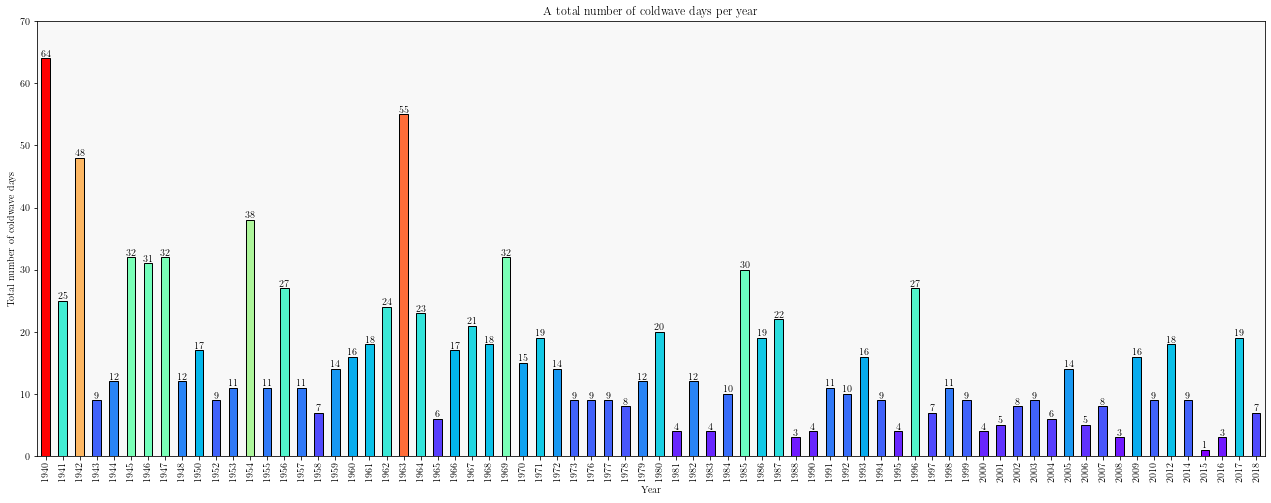

In [168]:
# Plot a total number of coldwave days per year
plot = num_of_coldwave_days_per_year["Num of coldwave days"].plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total number of coldwave days", legend=False, ylim=(0,70), color=my_cmap(rescale(num_of_coldwave_days_per_year["Num of coldwave days"])), edgecolor="black")
plt.title("A total number of coldwave days per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwave_days_per_year.pdf', bbox_inches='tight')

#### Total number of coldwave days per decades

In [169]:
# Coldwave data by decades
_40s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1940) & (cold_waves["time"].dt.year <= 1949)]
_50s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1950) & (cold_waves["time"].dt.year <= 1959)]
_60s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1960) & (cold_waves["time"].dt.year <= 1969)]
_70s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1970) & (cold_waves["time"].dt.year <= 1979)]
_80s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1980) & (cold_waves["time"].dt.year <= 1989)]
_90s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 1990) & (cold_waves["time"].dt.year <= 1999)]
_00s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 2000) & (cold_waves["time"].dt.year <= 2009)]
_10s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 2010) & (cold_waves["time"].dt.year <= 2019)]
_20s_coldwave_days = cold_waves[(cold_waves["time"].dt.year >= 2020) & (cold_waves["time"].dt.year <= 2029)]


In [170]:
# Store total number of coldwave days per decades in dictionary
total_num_of_coldwave_days_per_decade = {
    "1940-1949": _40s_coldwave_days["time"].size,
    "1950-1959": _50s_coldwave_days["time"].size,
    "1960-1969": _60s_coldwave_days["time"].size,
    "1970-1979": _70s_coldwave_days["time"].size,
    "1980-1989": _80s_coldwave_days["time"].size,
    "1990-1999": _90s_coldwave_days["time"].size,
    "2000-2009": _00s_coldwave_days["time"].size,
    "2010-2019": _10s_coldwave_days["time"].size,
    "2020-2029": _20s_coldwave_days["time"].size
}

# Convert dictionary to dataframe
total_num_of_coldwave_days_per_decade = pd.DataFrame.from_dict([total_num_of_coldwave_days_per_decade]).transpose().rename(columns={0: "Total number of coldwave days"})
total_num_of_coldwave_days_per_decade

,Total number of coldwave days
1940-1949,265
1950-1959,145
1960-1969,230
1970-1979,95
1980-1989,124
1990-1999,108
2000-2009,78
2010-2019,66
2020-2029,0


#### Plot total number of coldwave days per decade

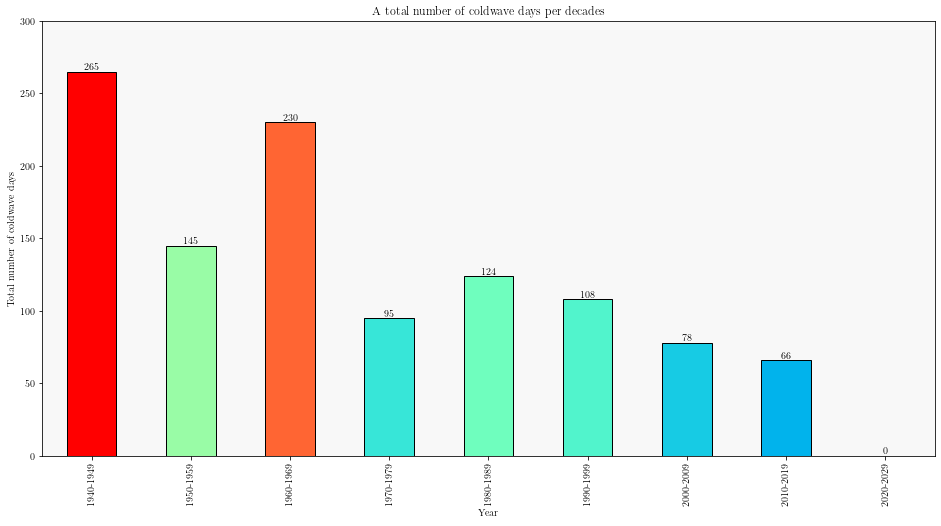

In [171]:
# Plot a total number of coldwave days per decade
plot = total_num_of_coldwave_days_per_decade["Total number of coldwave days"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of coldwave days", legend=False, ylim=(0,300), color=my_cmap(rescale(total_num_of_coldwave_days_per_decade["Total number of coldwave days"])), edgecolor="black")
plt.title("A total number of coldwave days per decades")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwave_days_per_decades.pdf', bbox_inches='tight')

#### Total number of coldwaves per year

In [172]:
# Determine total number of coldwaves per year
total_num_of_coldwaves_per_year = cold_waves.groupby(cold_waves.time.dt.year)["grp_date"].unique().apply(lambda x: len(x))
# Print series
total_num_of_coldwaves_per_year

time
1940    6
1941    4
1942    4
1943    2
1944    3
       ..
2014    2
2015    1
2016    1
2017    3
2018    1
Name: grp_date, Length: 72, dtype: int64

#### Plot total number of coldwaves per year

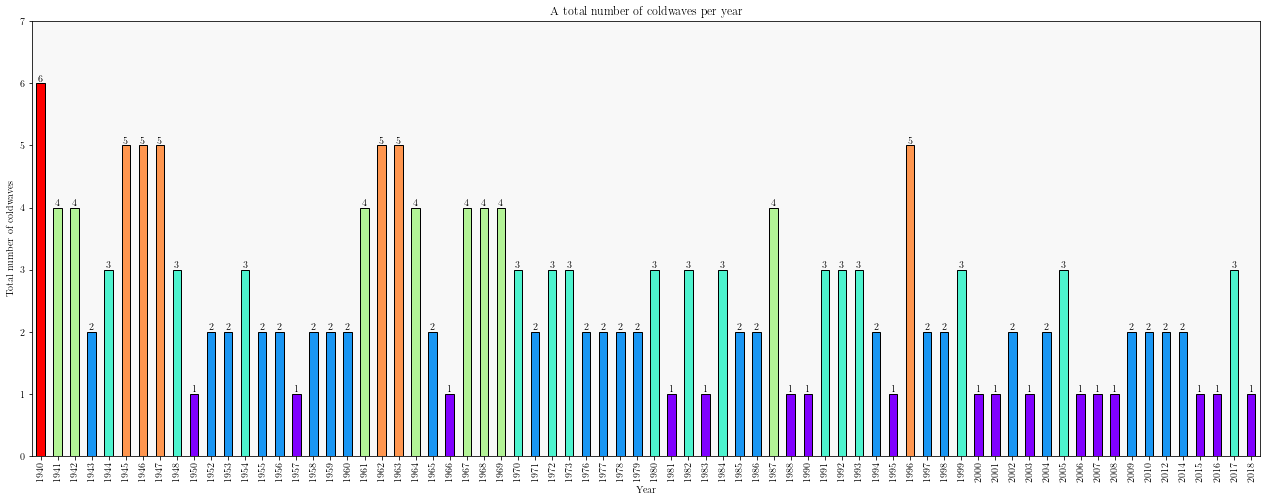

In [173]:
# Plot a total number of coldwaves per year
plot = total_num_of_coldwaves_per_year.plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total number of coldwaves", legend=False, ylim=(0,7), color=my_cmap(rescale(total_num_of_coldwaves_per_year)), edgecolor="black")
plt.title("A total number of coldwaves per year")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwaves_per_year.pdf', bbox_inches='tight')

#### Total number of coldwaves per decades

In [174]:
# Create dataframes with the total number of coldwaves per each decade
_40s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1940 and key <= 1949}
_50s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1950 and key <= 1959}
_60s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1960 and key <= 1969}
_70s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1970 and key <= 1979}
_80s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1980 and key <= 1989}
_90s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 1990 and key <= 1999}
_00s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 2000 and key <= 2009}
_10s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 2010 and key <= 2019}
_20s_num_of_coldwaves = {key:value for (key, value) in total_num_of_coldwaves_per_year.to_dict().items() if key >= 2020 and key <= 2029}

In [175]:
# Store total number of coldwaves per decades in dictionary
total_num_of_coldwaves_per_decade = {
    "1940-1949": len(_40s_num_of_coldwaves.items()),
    "1950-1959": len(_50s_num_of_coldwaves.items()),
    "1960-1969": len(_60s_num_of_coldwaves.items()),
    "1970-1979": len(_70s_num_of_coldwaves.items()),
    "1980-1989": len(_80s_num_of_coldwaves.items()),
    "1990-1999": len(_90s_num_of_coldwaves.items()),
    "2000-2009": len(_00s_num_of_coldwaves.items()),
    "2010-2019": len(_10s_num_of_coldwaves.items()),
    "2020-2029": len(_20s_num_of_coldwaves.items())
}

# Convert dictionary to dataframe
total_num_of_coldwaves_per_decade = pd.DataFrame.from_dict([total_num_of_coldwaves_per_decade]).transpose().rename(columns={0: "Total number of coldwaves"})
total_num_of_coldwaves_per_decade

,Total number of coldwaves
1940-1949,9
1950-1959,9
1960-1969,10
1970-1979,8
1980-1989,9
1990-1999,10
2000-2009,10
2010-2019,7
2020-2029,0


#### Plot a total number of coldwaves per each decade

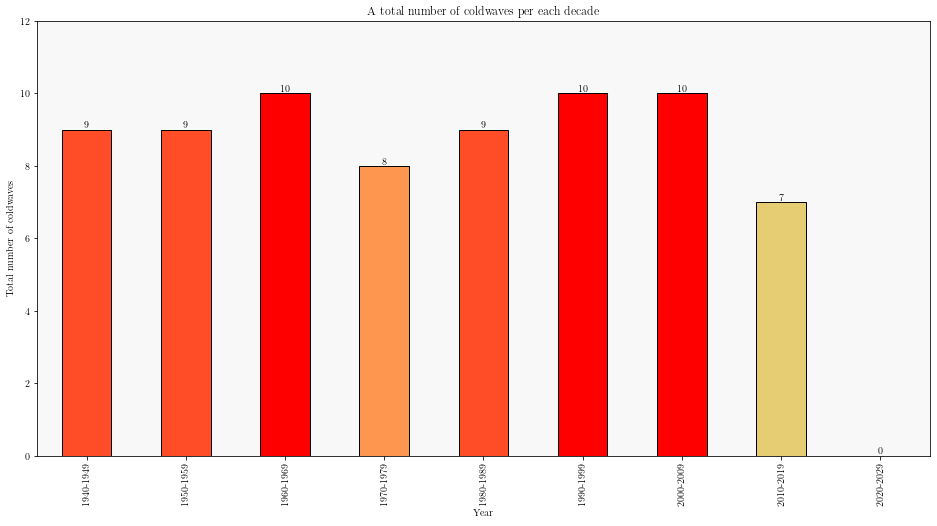

In [176]:
# Plot a total number of coldwaves per decades
plot = total_num_of_coldwaves_per_decade["Total number of coldwaves"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total number of coldwaves", legend=False, ylim=(0,12), color=my_cmap(rescale(total_num_of_coldwaves_per_decade["Total number of coldwaves"])), edgecolor="black")
plt.title("A total number of coldwaves per each decade")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_num_of_coldwaves_per_decades.pdf', bbox_inches='tight')

#### Bubble plot total number of coldwave days and coldwaves per year

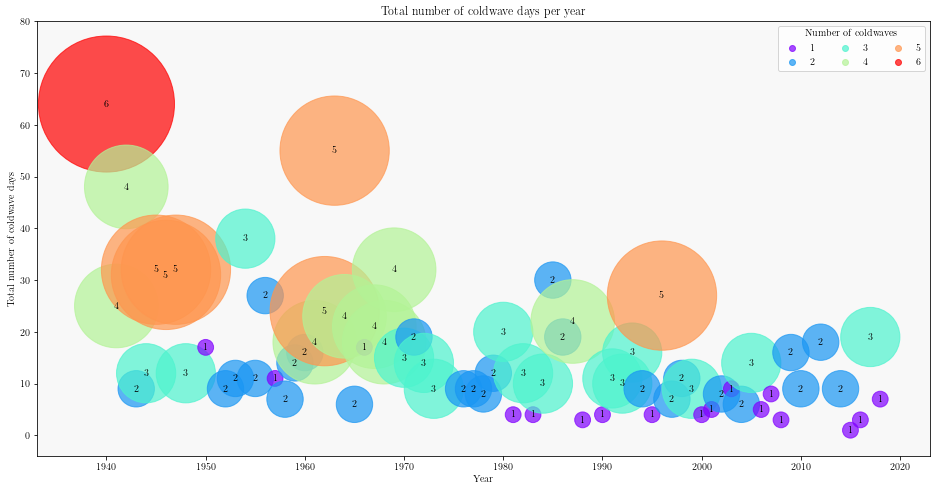

In [177]:
# Get colormap with wanted number of values (3 in our case)
cm = plt.cm.get_cmap('rainbow', 6)

# Plot scatter data using colormap
sc = plt.scatter(
    x=cold_waves["time"].dt.year.unique(), 
    y=num_of_coldwave_days_per_year["Num of coldwave days"],
    s=[(i*10)**2.4 for i in total_num_of_coldwaves_per_year.to_list()],
    c=total_num_of_coldwaves_per_year,
    alpha=0.7,
    vmin=1,
    vmax=6,
    cmap=cm)

plt.gcf().set_figwidth(16)
plt.gcf().set_figheight(8)

ax = plt.gca()
ax.set_facecolor("#F8F8F8")
ax.set_ylim((-4,80))
ax.set_xlim((1933,2023))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of coldwave days")
ax.set_title("Total number of coldwave days per year")

# Produce a legend with a cross-section of sizes from the scatter
handles, labels = sc.legend_elements(alpha=0.7)
legend = ax.legend(handles, labels, loc="upper right", title="Number of coldwaves", ncol=3)

# Define colorbar with a list of wanted ticks distribution
# cbar = plt.gcf().colorbar(sc, ticks=[i for i in range(0,4)], label="Number of coldwaves")

# Add labels to all points
for (xi, yi, zi) in zip(cold_waves["time"].dt.year.unique().tolist(), num_of_coldwave_days_per_year["Num of coldwave days"].to_list(), total_num_of_coldwaves_per_year.to_list()):
    plt.annotate(zi, (xi,yi), ha='center', va="center")
    
# Save figure to pdf file
plt.savefig('bubbleplot_coldwave_days_and_coldwaves_per_year.pdf', bbox_inches='tight')

## Temperature distribution in the summer

#### Summer data

In [178]:
# Get only data for the summer periods
# Create empty summer data dataframe
summer_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    summer_data = summer_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=6, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=8, day=31))])

# Print summer data dataframe
summer_data = summer_data.reset_index(drop=True)
summer_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/1630609879.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summer_data = summer_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=6, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=8, day=31))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/1630609879.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summer_data = summer_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=6, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=8, day=31))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/1630609879.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summer_data = summer_data.appen

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-06-01,53.0,20.0,10.9,15.4,18.7,9.7,14.3,1940-06-01T04:09,1940-06-01T19:38,...,44676.06,1.9,1.9,0.0,7.0,12.2,25.9,351.0,19.95,3.49
1,1940-06-02,51.0,16.1,12.2,13.6,13.3,9.9,11.4,1940-06-02T04:08,1940-06-02T19:39,...,14565.13,1.1,1.1,0.0,7.0,21.7,48.6,20.0,10.14,2.14
2,1940-06-03,61.0,20.7,12.2,16.0,17.2,8.6,13.3,1940-06-03T04:08,1940-06-03T19:40,...,28333.48,8.5,8.5,0.0,11.0,26.2,52.2,18.0,14.63,3.45
3,1940-06-04,61.0,17.1,12.4,14.6,17.7,10.0,13.3,1940-06-04T04:07,1940-06-04T19:41,...,0.00,26.9,26.9,0.0,24.0,18.2,40.7,10.0,3.15,1.02
4,1940-06-05,53.0,23.0,13.7,18.4,21.3,12.9,17.6,1940-06-05T04:07,1940-06-05T19:42,...,47016.58,5.7,5.7,0.0,16.0,18.7,50.4,15.0,18.90,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,2023-08-27,1.0,33.8,20.5,26.8,36.4,21.9,29.4,2023-08-27T05:10,2023-08-27T18:44,...,43574.89,0.0,0.0,0.0,0.0,10.5,22.3,178.0,21.78,4.72
7724,2023-08-28,63.0,28.1,20.2,24.0,30.7,20.6,25.9,2023-08-28T05:11,2023-08-28T18:43,...,37536.92,5.4,5.4,0.0,3.0,18.9,42.1,70.0,18.21,3.91
7725,2023-08-29,65.0,24.3,17.0,19.4,27.5,17.4,20.9,2023-08-29T05:13,2023-08-29T18:41,...,30853.23,42.0,42.0,0.0,20.0,12.3,27.4,48.0,14.98,2.74
7726,2023-08-30,51.0,19.9,14.8,17.3,20.1,15.1,17.6,2023-08-30T05:14,2023-08-30T18:39,...,21049.25,1.0,1.0,0.0,7.0,12.1,26.3,28.0,10.88,2.03


#### Plot histogram of maximum daily temperatures for summer period (for all years)

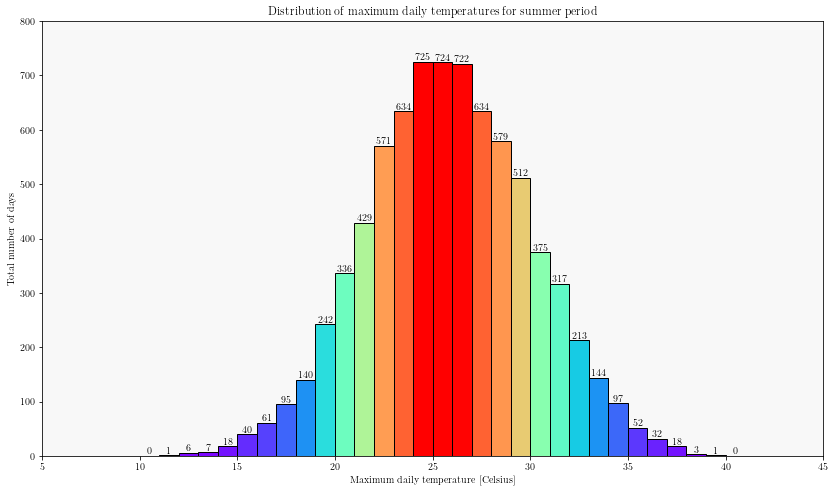

In [179]:
# Plot histogram of maximum daily temperatures for summer period
n, bins, patches = plt.hist(x=summer_data["temperature_2m_max (°C)"], bins=np.arange(10, 42, 1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('rainbow')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((5,45))
plt.ylim((0,800))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Total number of days")
plt.title("Distribution of maximum daily temperatures for summer period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_summer_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for summer period (for each decade separately)

In [180]:
# Summer period data by decades
_40s_summer_days = summer_data[(summer_data["time"].dt.year >= 1940) & (summer_data["time"].dt.year <= 1949)]
_50s_summer_days = summer_data[(summer_data["time"].dt.year >= 1950) & (summer_data["time"].dt.year <= 1959)]
_60s_summer_days = summer_data[(summer_data["time"].dt.year >= 1960) & (summer_data["time"].dt.year <= 1969)]
_70s_summer_days = summer_data[(summer_data["time"].dt.year >= 1970) & (summer_data["time"].dt.year <= 1979)]
_80s_summer_days = summer_data[(summer_data["time"].dt.year >= 1980) & (summer_data["time"].dt.year <= 1989)]
_90s_summer_days = summer_data[(summer_data["time"].dt.year >= 1990) & (summer_data["time"].dt.year <= 1999)]
_00s_summer_days = summer_data[(summer_data["time"].dt.year >= 2000) & (summer_data["time"].dt.year <= 2009)]
_10s_summer_days = summer_data[(summer_data["time"].dt.year >= 2010) & (summer_data["time"].dt.year <= 2019)]
_20s_summer_days = summer_data[(summer_data["time"].dt.year >= 2020) & (summer_data["time"].dt.year <= 2029)]

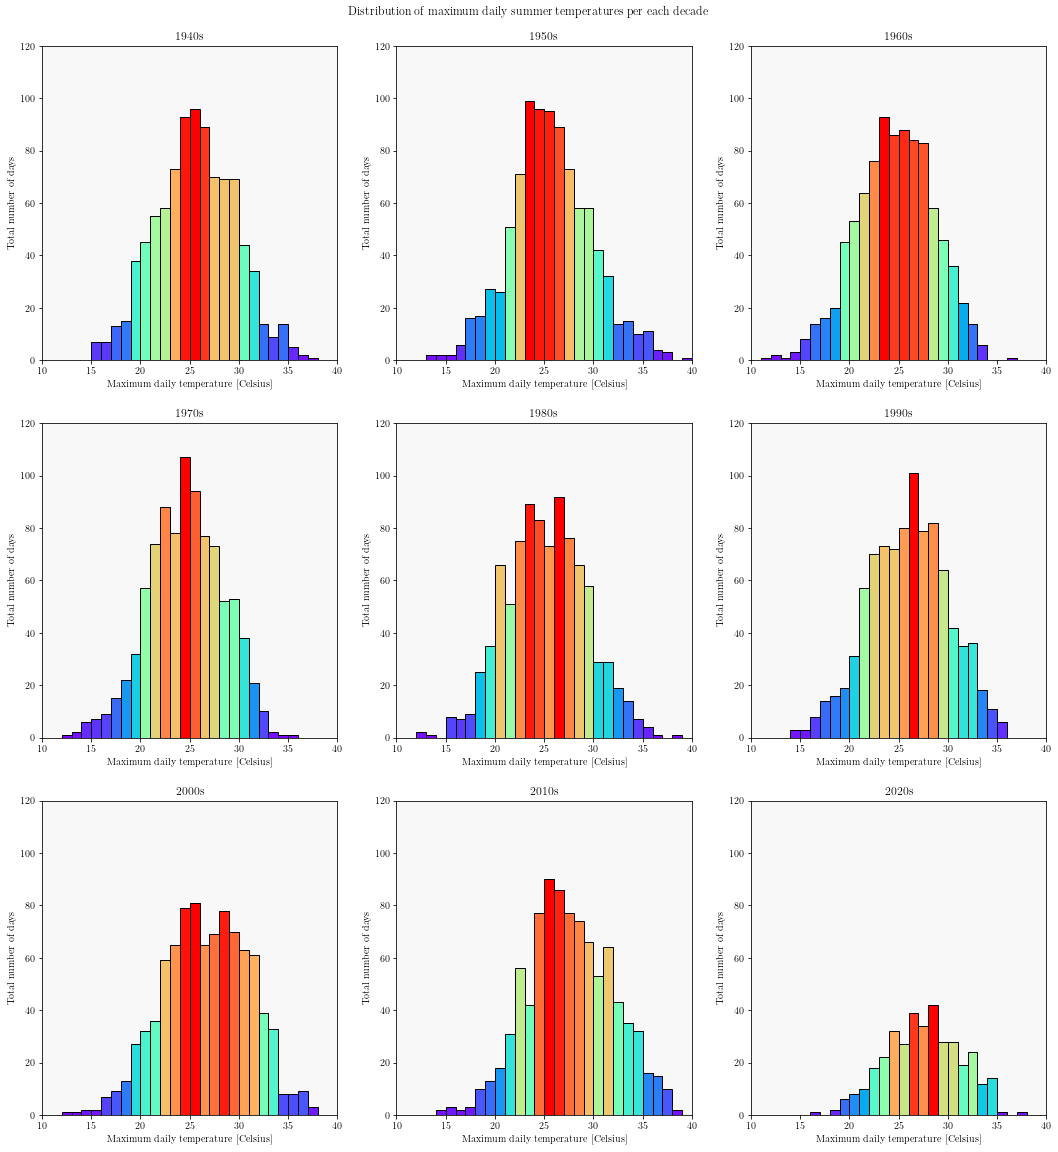

In [181]:
# Create dictionary which will be used to iterate through
max_summer_temp_data_by_decade = {
    1: [_40s_summer_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_summer_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_summer_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_summer_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_summer_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_summer_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_summer_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_summer_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_summer_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_summer_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for summer period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_summer_temp_data_by_decade[key][0], bins=np.arange(10, 42, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((10,40))
    plt.ylim((0,120))
    plt.title(max_summer_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Total number of days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")
    
    # max_summer_temp_data_by_decade[key][0].plot.kde(ax=ax, secondary_y=True, color="black")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily summer temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_summer_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for summertime maximum daily temperature data (for each decade)

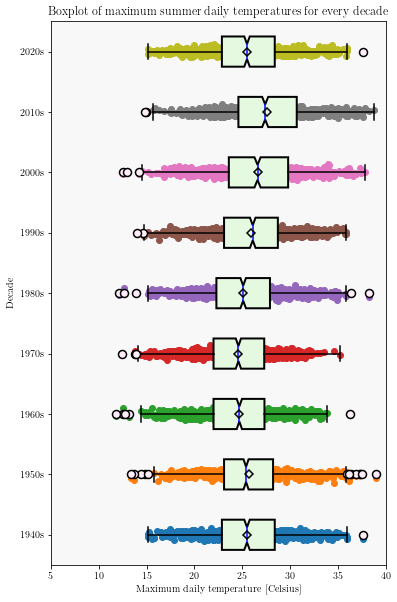

In [182]:
# Combine summer data max daily temperature data per decade into one single dataframe
summer_data_max_daily_temps = pd.DataFrame({"1940s": _40s_summer_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_summer_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_summer_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_summer_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_summer_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_summer_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_summer_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_summer_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_summer_days["temperature_2m_max (°C)"]})

# Create boxplot
summer_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(5,40), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum summer daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(summer_data_max_daily_temps):
   y = summer_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_summer_period_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of summertime maximum daily temperature data

In [183]:
# Create dataframe to store data in
stat_chars_of_summer_max_temps = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "STD", "variance", "standard error", "range", "skewness", "kurtosis", "modes"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in max_summer_temp_data_by_decade:
    stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by_decade[key][1],
                                                                            "mean": max_summer_temp_data_by_decade[key][0].mean(),
                                                                            "Q1 - 25%": max_summer_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": max_summer_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": max_summer_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.75],
                                                                            "STD": max_summer_temp_data_by_decade[key][0].std(),
                                                                            "variance": max_summer_temp_data_by_decade[key][0].var(),
                                                                            "standard error": max_summer_temp_data_by_decade[key][0].sem(),
                                                                            "range": max_summer_temp_data_by_decade[key][0].max() - max_summer_temp_data_by_decade[key][0].min(),
                                                                            "skewness": skew(max_summer_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "kurtosis": kurtosis(max_summer_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "modes": max_summer_temp_data_by_decade[key][0].agg(lambda x: x.mode().tolist())}, ignore_index=True)
                                                                            

# Print dataframe
stat_chars_of_summer_max_temps

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2973263173.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2973263173.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2973263173.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_summer_max_temps = stat_chars_of_summer_max_temps.append({"decade": max_summer_temp_data_by

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,STD,variance,standard error,range,skewness,kurtosis,modes
0,1940s,25.540217,22.875,25.50,28.400,3.996883,15.975073,0.131773,22.4,0.009738,-0.219424,"[25.0, 25.6]"
1,1950s,25.667391,23.100,25.40,28.225,4.073370,16.592341,0.134295,25.6,0.183207,0.169930,[24.9]
2,1960s,24.621957,22.000,24.70,27.325,3.882524,15.073990,0.128003,24.5,-0.172507,-0.153336,"[21.8, 24.9, 26.4]"
3,1970s,24.557500,22.000,24.60,27.300,3.768203,14.199356,0.124234,22.8,-0.167490,-0.153745,[25.2]
4,1980s,25.132174,22.300,25.10,27.900,4.074129,16.598528,0.134320,26.2,0.038328,-0.163565,[26.3]
5,1990s,25.941848,23.100,26.10,28.725,4.035506,16.285309,0.133047,21.8,-0.109040,-0.271785,[26.7]
6,2000s,26.622174,23.600,26.60,29.800,4.332506,18.770607,0.142838,25.3,-0.148054,-0.293719,[31.1]
7,2010s,27.549348,24.600,27.40,30.700,4.327144,18.724178,0.142662,24.0,0.042526,-0.298067,[24.6]
8,2020s,27.509239,24.700,27.65,30.200,3.792898,14.386072,0.197718,20.9,-0.070547,-0.464088,"[24.6, 26.3, 26.5, 27.7, 28.0, 28.7, 29.8, 30...."


## Temperature distribution in the winter

#### Winter data

In [184]:
# Get only data for the winter periods
# Create empty winter data dataframe
winter_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=1, day=1)) & (data["time"] < pd.Timestamp(year=year, month=3, day=1))])
    winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=12, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=12, day=31))])

# Print winter data dataframe
winter_data = winter_data.sort_values(by="time").drop_duplicates(subset=["time"]).reset_index(drop=True)
winter_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/1717393023.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=1, day=1)) & (data["time"] < pd.Timestamp(year=year, month=3, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/1717393023.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winter_data = winter_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=12, day=1)) & (data["time"] <= pd.Timestamp(year=year, month=12, day=31))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/1717393023.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  winter_data = winter_data.appen

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-01-02,3.0,-5.6,-13.8,-8.8,-9.9,-18.4,-13.2,1940-01-02T07:37,1940-01-02T16:22,...,27268.41,0.0,0.0,0.00,0.0,8.4,20.5,48.0,6.56,0.52
1,1940-01-03,2.0,-4.7,-17.2,-11.3,-9.5,-22.0,-16.0,1940-01-03T07:37,1940-01-03T16:23,...,27334.64,0.0,0.0,0.00,0.0,9.7,25.2,226.0,6.15,0.46
2,1940-01-04,71.0,-2.9,-10.7,-6.6,-6.5,-14.9,-10.5,1940-01-04T07:37,1940-01-04T16:24,...,4821.56,0.6,0.0,0.42,6.0,7.3,16.6,353.0,2.92,0.29
3,1940-01-05,3.0,-0.0,-3.6,-1.9,-4.5,-7.3,-6.0,1940-01-05T07:37,1940-01-05T16:25,...,24000.50,0.0,0.0,0.00,0.0,8.7,21.2,13.0,4.92,0.64
4,1940-01-06,1.0,0.5,-2.6,-1.1,-3.3,-6.4,-5.0,1940-01-06T07:36,1940-01-06T16:26,...,26103.36,0.0,0.0,0.00,0.0,8.2,15.1,14.0,5.61,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,2023-02-24,51.0,15.2,2.5,8.8,10.9,-0.5,5.8,2023-02-24T06:43,2023-02-24T17:34,...,32460.79,0.2,0.2,0.00,1.0,24.3,48.6,246.0,9.77,1.60
7545,2023-02-25,75.0,13.2,2.0,7.7,11.1,-1.2,5.0,2023-02-25T06:42,2023-02-25T17:36,...,10395.39,41.7,37.1,3.22,17.0,17.9,33.5,94.0,4.38,0.71
7546,2023-02-26,75.0,2.5,0.7,1.5,-0.9,-4.3,-2.5,2023-02-26T06:40,2023-02-26T17:37,...,0.00,15.3,1.6,9.59,23.0,17.2,35.6,33.0,4.38,0.65
7547,2023-02-27,71.0,3.2,0.3,1.4,-1.5,-4.6,-3.0,2023-02-27T06:38,2023-02-27T17:38,...,59.01,0.3,0.0,0.21,3.0,16.6,33.5,41.0,4.52,0.97


#### Plot histogram of maximum daily temperatures for winter period (for all years)

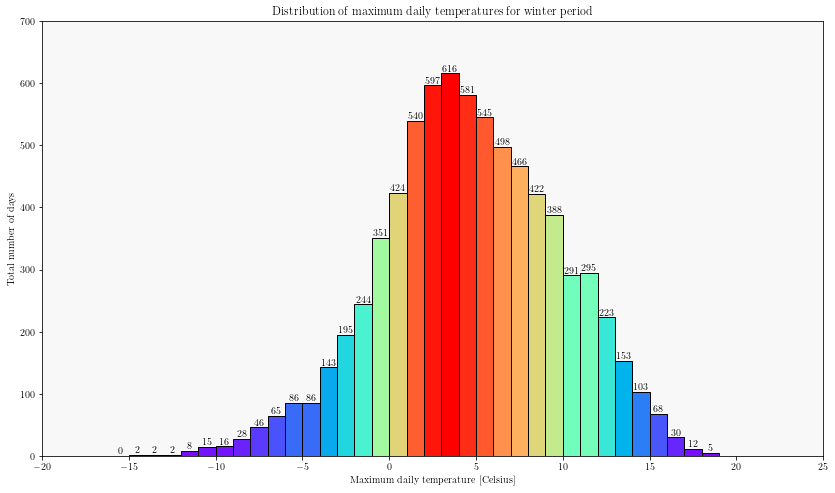

In [185]:
# Plot histogram of maximum daily temperatures for winter period
n, bins, patches = plt.hist(x=winter_data["temperature_2m_max (°C)"], bins=np.arange(-16, 20, 1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('rainbow')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((-20,25))
plt.ylim((0,700))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Total number of days")
plt.title("Distribution of maximum daily temperatures for winter period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_winter_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for winter period (for each decade separately)

In [186]:
# Winter period data by decades
_40s_winter_days = winter_data[(winter_data["time"].dt.year >= 1940) & (winter_data["time"].dt.year <= 1949)]
_50s_winter_days = winter_data[(winter_data["time"].dt.year >= 1950) & (winter_data["time"].dt.year <= 1959)]
_60s_winter_days = winter_data[(winter_data["time"].dt.year >= 1960) & (winter_data["time"].dt.year <= 1969)]
_70s_winter_days = winter_data[(winter_data["time"].dt.year >= 1970) & (winter_data["time"].dt.year <= 1979)]
_80s_winter_days = winter_data[(winter_data["time"].dt.year >= 1980) & (winter_data["time"].dt.year <= 1989)]
_90s_winter_days = winter_data[(winter_data["time"].dt.year >= 1990) & (winter_data["time"].dt.year <= 1999)]
_00s_winter_days = winter_data[(winter_data["time"].dt.year >= 2000) & (winter_data["time"].dt.year <= 2009)]
_10s_winter_days = winter_data[(winter_data["time"].dt.year >= 2010) & (winter_data["time"].dt.year <= 2019)]
_20s_winter_days = winter_data[(winter_data["time"].dt.year >= 2020) & (winter_data["time"].dt.year <= 2029)]

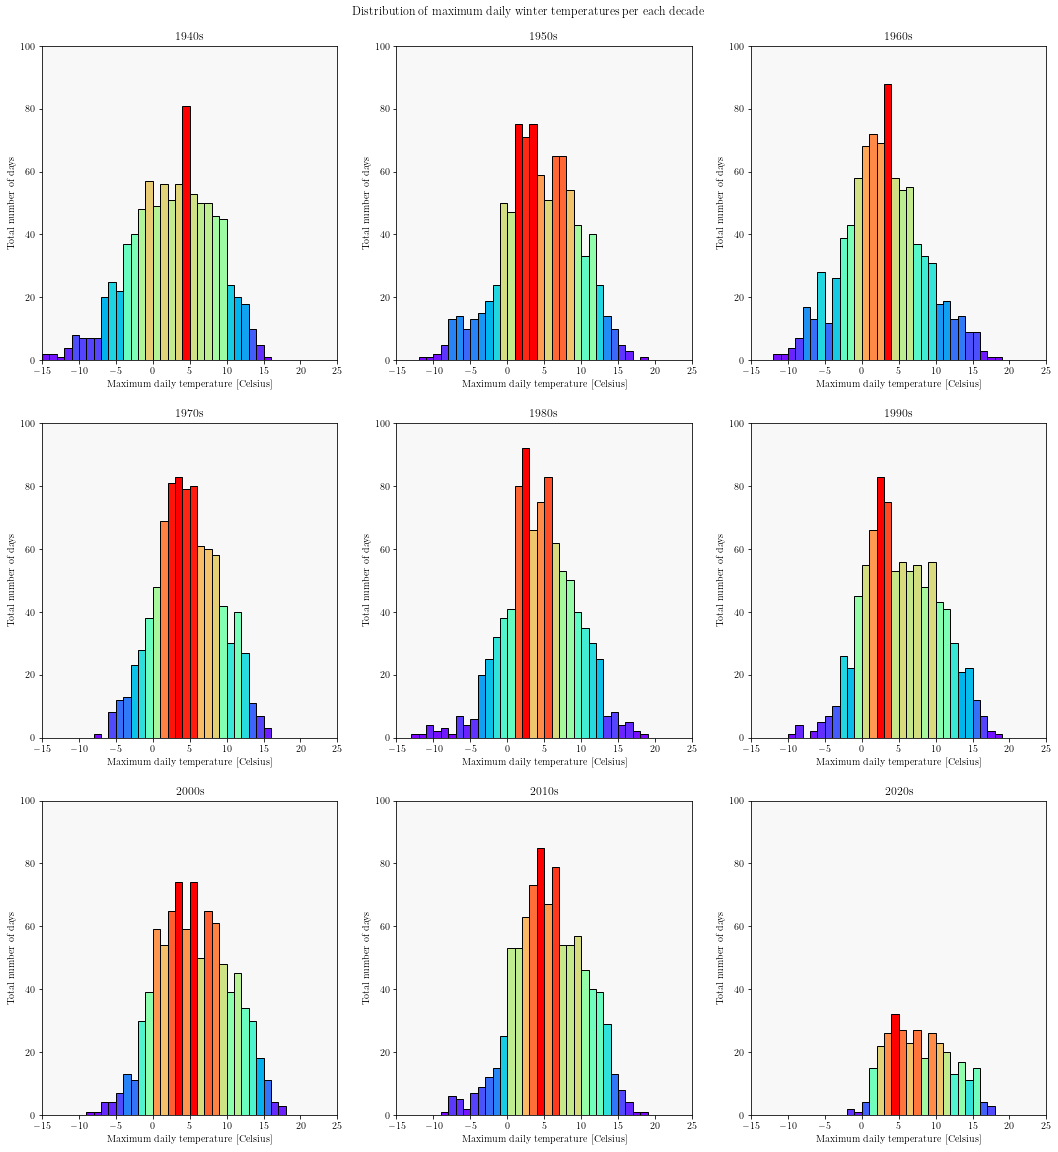

In [187]:
# Create dictionary which will be used to iterate through
max_winter_temp_data_by_decade = {
    1: [_40s_winter_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_winter_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_winter_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_winter_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_winter_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_winter_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_winter_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_winter_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_winter_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_winter_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for winter period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_winter_temp_data_by_decade[key][0], bins=np.arange(-16, 20, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((-15,25))
    plt.ylim((0,100))
    plt.title(max_winter_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Total number of days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily winter temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_winter_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for wintertime maximum daily temperature data (for each decade)

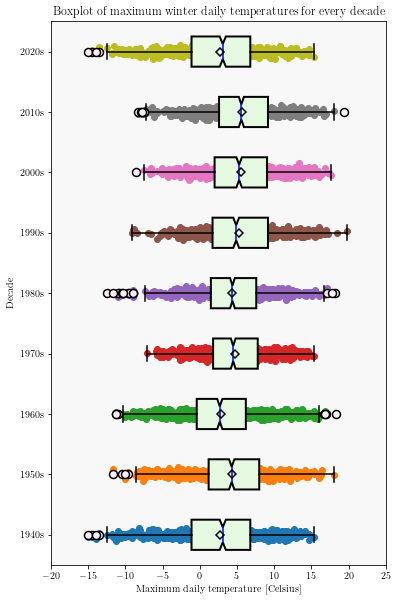

In [188]:
# Combine winter data max daily temperature data per decade into one single dataframe
winter_data_max_daily_temps = pd.DataFrame({"1940s": _40s_winter_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_winter_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_winter_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_winter_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_winter_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_winter_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_winter_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_winter_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_winter_days["temperature_2m_max (°C)"]})

# Create boxplot
winter_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(-20,25), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum winter daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(winter_data_max_daily_temps):
   y = winter_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_winter_period_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of wintertime maximum daily temperature data

In [189]:
# Create dataframe to store data in
stat_chars_of_winter_max_temps = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "STD", "variance", "standard error", "skewness", "kurtosis", "modes"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in max_winter_temp_data_by_decade:
    stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by_decade[key][1],
                                                                            "mean": max_winter_temp_data_by_decade[key][0].mean(),
                                                                            "Q1 - 25%": max_winter_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": max_winter_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": max_winter_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.75],
                                                                            "STD": max_winter_temp_data_by_decade[key][0].std(),
                                                                            "variance": max_winter_temp_data_by_decade[key][0].var(),
                                                                            "standard error": max_winter_temp_data_by_decade[key][0].sem(),
                                                                            "skewness": skew(max_winter_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "kurtosis": kurtosis(max_winter_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "modes": max_winter_temp_data_by_decade[key][0].agg(lambda x: x.mode().tolist())}, ignore_index=True)

# Print dataframe
stat_chars_of_winter_max_temps

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/3914225941.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/3914225941.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/3914225941.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_winter_max_temps = stat_chars_of_winter_max_temps.append({"decade": max_winter_temp_data_by

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,STD,variance,standard error,skewness,kurtosis,modes
0,1940s,2.672506,-1.100,3.1,6.800,5.567427,30.996247,0.185375,-0.291856,-0.253672,"[3.4, 4.8]"
1,1950s,4.309867,1.200,4.3,8.000,5.123139,26.246551,0.170582,-0.230094,-0.141912,[2.8]
2,1960s,2.890808,-0.400,2.7,6.200,5.314474,28.243629,0.176855,0.091146,-0.057058,[3.0]
3,1970s,4.713193,1.800,4.5,7.800,4.340460,18.839593,0.144522,0.016046,-0.421192,[2.5]
4,1980s,4.395903,1.500,4.4,7.600,4.785568,22.901657,0.159254,-0.139479,0.369958,[2.8]
5,1990s,5.334035,1.725,4.9,9.175,5.013299,25.133169,0.166925,0.107411,-0.420545,[2.7]
6,2000s,5.573643,2.000,5.3,9.050,4.848827,23.511123,0.161359,0.033781,-0.546621,"[3.1, 5.3]"
7,2010s,5.741242,2.600,5.6,9.175,4.682260,21.923558,0.155902,-0.112430,-0.127900,[3.5]
8,2020s,7.842121,4.425,7.4,11.000,4.309114,18.568464,0.237209,0.295790,-0.738381,[9.6]


## Temperature distribution in the spring

#### Spring data

In [190]:
# Get only data for the spring periods
# Create empty spring data dataframe
spring_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    spring_data = spring_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=3, day=1)) & (data["time"] < pd.Timestamp(year=year, month=6, day=1))])

# Print spring data dataframe
spring_data = spring_data.sort_values(by="time").drop_duplicates(subset=["time"]).reset_index(drop=True)
spring_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2774089988.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spring_data = spring_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=3, day=1)) & (data["time"] < pd.Timestamp(year=year, month=6, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2774089988.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spring_data = spring_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=3, day=1)) & (data["time"] < pd.Timestamp(year=year, month=6, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2774089988.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spring_data = spring_data.append(da

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-03-01,71.0,6.6,-4.2,0.6,3.1,-8.2,-3.4,1940-03-01T06:33,1940-03-01T17:42,...,29800.48,0.4,0.0,0.28,4.0,15.1,34.2,25.0,11.66,1.24
1,1940-03-02,71.0,-1.4,-7.0,-3.6,-6.8,-11.5,-8.6,1940-03-02T06:31,1940-03-02T17:44,...,36180.34,0.1,0.0,0.07,1.0,21.3,45.4,54.0,13.19,1.17
2,1940-03-03,0.0,0.1,-8.0,-3.5,-3.7,-12.4,-7.6,1940-03-03T06:29,1940-03-03T17:45,...,36362.16,0.0,0.0,0.00,0.0,8.9,17.3,224.0,15.11,1.35
3,1940-03-04,1.0,8.0,-7.0,1.0,3.6,-11.7,-3.2,1940-03-04T06:27,1940-03-04T17:47,...,36464.98,0.0,0.0,0.00,0.0,13.4,24.8,243.0,14.13,1.71
4,1940-03-05,53.0,8.2,-1.0,3.1,4.9,-5.6,-0.4,1940-03-05T06:26,1940-03-05T17:48,...,25200.00,1.1,1.1,0.00,3.0,18.7,31.7,252.0,9.23,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,2023-05-27,53.0,21.6,14.0,17.7,21.5,13.2,16.6,2023-05-27T04:13,2023-05-27T19:33,...,50400.00,0.8,0.8,0.00,1.0,14.1,28.8,18.0,21.37,4.03
7724,2023-05-28,51.0,23.2,12.8,18.3,24.1,11.6,18.0,2023-05-28T04:12,2023-05-28T19:34,...,50400.00,0.4,0.4,0.00,4.0,11.4,23.8,34.0,25.79,4.75
7725,2023-05-29,63.0,24.4,13.9,18.3,25.8,13.5,18.5,2023-05-29T04:11,2023-05-29T19:35,...,46767.60,12.6,12.6,0.00,4.0,17.8,36.7,39.0,22.73,4.04
7726,2023-05-30,61.0,23.5,13.9,18.0,23.9,13.9,18.2,2023-05-30T04:10,2023-05-30T19:36,...,43048.73,4.4,4.4,0.00,5.0,17.0,33.8,21.0,23.67,4.21


#### Plot histogram of maximum daily temperatures for spring period (for all years)

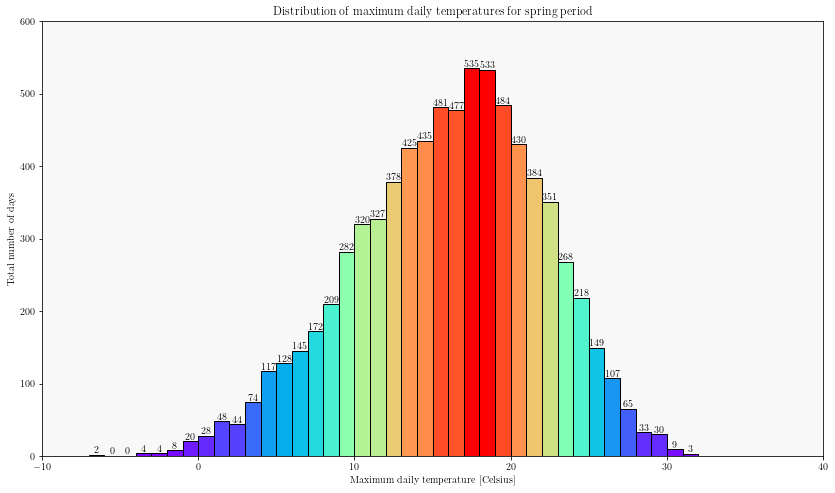

In [191]:
# Plot histogram of maximum daily temperatures for spring period
n, bins, patches = plt.hist(x=spring_data["temperature_2m_max (°C)"], bins=np.arange(-7, 33, 1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('rainbow')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((-10,40))
plt.ylim((0,600))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Total number of days")
plt.title("Distribution of maximum daily temperatures for spring period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_spring_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for spring period (for each decade separately)

In [192]:
# Spring period data by decades
_40s_spring_days = spring_data[(spring_data["time"].dt.year >= 1940) & (spring_data["time"].dt.year <= 1949)]
_50s_spring_days = spring_data[(spring_data["time"].dt.year >= 1950) & (spring_data["time"].dt.year <= 1959)]
_60s_spring_days = spring_data[(spring_data["time"].dt.year >= 1960) & (spring_data["time"].dt.year <= 1969)]
_70s_spring_days = spring_data[(spring_data["time"].dt.year >= 1970) & (spring_data["time"].dt.year <= 1979)]
_80s_spring_days = spring_data[(spring_data["time"].dt.year >= 1980) & (spring_data["time"].dt.year <= 1989)]
_90s_spring_days = spring_data[(spring_data["time"].dt.year >= 1990) & (spring_data["time"].dt.year <= 1999)]
_00s_spring_days = spring_data[(spring_data["time"].dt.year >= 2000) & (spring_data["time"].dt.year <= 2009)]
_10s_spring_days = spring_data[(spring_data["time"].dt.year >= 2010) & (spring_data["time"].dt.year <= 2019)]
_20s_spring_days = spring_data[(spring_data["time"].dt.year >= 2020) & (spring_data["time"].dt.year <= 2029)]

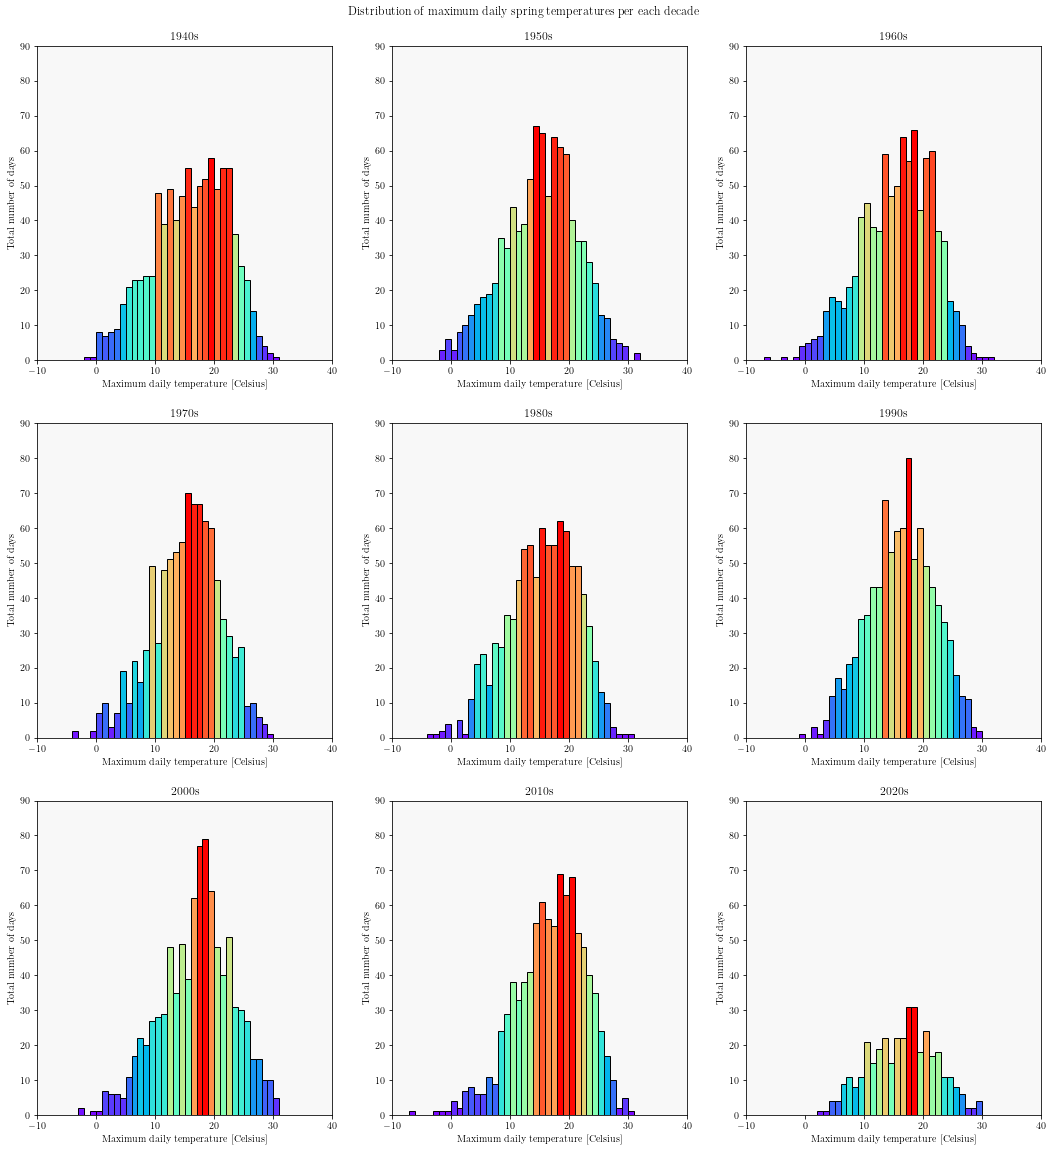

In [193]:
# Create dictionary which will be used to iterate through
max_spring_temp_data_by_decade = {
    1: [_40s_spring_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_spring_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_spring_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_spring_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_spring_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_spring_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_spring_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_spring_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_spring_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_spring_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for spring period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_spring_temp_data_by_decade[key][0], bins=np.arange(-7, 33, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((-10,40))
    plt.ylim((0,90))
    plt.title(max_spring_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Total number of days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily spring temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_spring_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for springtime maximum daily temperature data (for each decade)

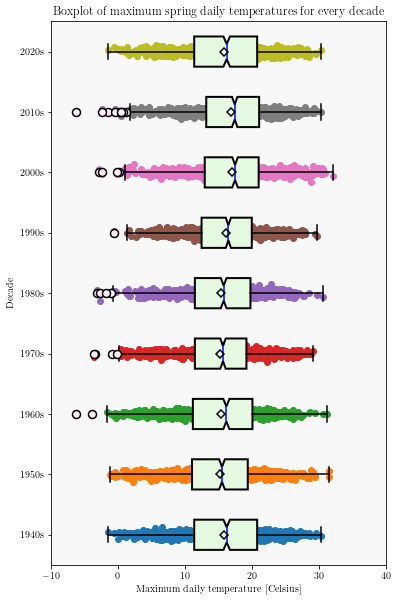

In [194]:
# Combine spring data max daily temperature data per decade into one single dataframe
spring_data_max_daily_temps = pd.DataFrame({"1940s": _40s_spring_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_spring_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_spring_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_spring_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_spring_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_spring_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_spring_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_spring_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_spring_days["temperature_2m_max (°C)"]})

# Create boxplot
spring_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(-10,40), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum spring daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(spring_data_max_daily_temps):
   y = spring_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_spring_period_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of springtime maximum daily temperature data

In [195]:
# Create dataframe to store data in
stat_chars_of_spring_max_temps = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "STD", "variance", "standard error", "skewness", "kurtosis", "modes"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in max_spring_temp_data_by_decade:
    stat_chars_of_spring_max_temps = stat_chars_of_spring_max_temps.append({"decade": max_spring_temp_data_by_decade[key][1],
                                                                            "mean": max_spring_temp_data_by_decade[key][0].mean(),
                                                                            "Q1 - 25%": max_spring_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": max_spring_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": max_spring_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.75],
                                                                            "STD": max_spring_temp_data_by_decade[key][0].std(),
                                                                            "variance": max_spring_temp_data_by_decade[key][0].var(),
                                                                            "standard error": max_spring_temp_data_by_decade[key][0].sem(),
                                                                            "skewness": skew(max_spring_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "kurtosis": kurtosis(max_spring_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "modes": max_spring_temp_data_by_decade[key][0].agg(lambda x: x.mode().tolist())}, ignore_index=True)

# Print dataframe
stat_chars_of_spring_max_temps

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/3085336881.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_spring_max_temps = stat_chars_of_spring_max_temps.append({"decade": max_spring_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/3085336881.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_spring_max_temps = stat_chars_of_spring_max_temps.append({"decade": max_spring_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/3085336881.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_spring_max_temps = stat_chars_of_spring_max_temps.append({"decade": max_spring_temp_data_by

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,STD,variance,standard error,skewness,kurtosis,modes
0,1940s,15.835870,11.400,16.25,20.800,6.281816,39.461215,0.207105,-0.329490,-0.534442,[22.4]
1,1950s,15.179022,11.075,15.55,19.400,6.152162,37.849102,0.202831,-0.236061,-0.258461,[17.1]
2,1960s,15.427283,11.200,16.20,20.100,6.079408,36.959200,0.200432,-0.403831,-0.192845,[18.8]
3,1970s,15.265109,11.500,15.70,19.200,5.756203,33.133874,0.189776,-0.336305,-0.042126,[15.6]
4,1980s,15.407826,11.500,15.80,19.800,5.882602,34.605009,0.193944,-0.331065,-0.329950,"[17.7, 18.8]"
5,1990s,16.145870,12.500,16.50,20.000,5.525691,30.533258,0.182177,-0.160619,-0.400092,[13.9]
6,2000s,16.997174,12.975,17.50,21.025,6.086228,37.042168,0.200657,-0.299962,-0.080681,[18.1]
7,2010s,16.909891,13.200,17.45,21.100,5.788682,33.508836,0.190847,-0.494882,0.188954,[15.9]
8,2020s,16.414402,12.300,16.90,20.325,5.563205,30.949247,0.290002,-0.074033,-0.506821,[17.8]


## Temperature distribution in the autumn

#### Autumn data

In [196]:
# Get only data for the autumn periods
# Create empty autumn data dataframe
autumn_data = pd.DataFrame()
# Iterate over every unique year in data
for year in data["time"].dt.year.unique():
    autumn_data = autumn_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=9, day=1)) & (data["time"] < pd.Timestamp(year=year, month=12, day=1))])

# Print autumn data dataframe
autumn_data = autumn_data.sort_values(by="time").drop_duplicates(subset=["time"]).reset_index(drop=True)
autumn_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/4032643359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autumn_data = autumn_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=9, day=1)) & (data["time"] < pd.Timestamp(year=year, month=12, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/4032643359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autumn_data = autumn_data.append(data[(data["time"] >= pd.Timestamp(year=year, month=9, day=1)) & (data["time"] < pd.Timestamp(year=year, month=12, day=1))])
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/4032643359.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autumn_data = autumn_data.append(

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-09-01,1.0,19.0,9.7,14.0,18.0,7.3,12.4,1940-09-01T05:17,1940-09-01T18:33,...,43232.80,0.0,0.0,0.00,0.0,10.7,24.8,322.0,19.01,3.21
1,1940-09-02,1.0,23.2,10.1,17.1,23.2,8.8,16.7,1940-09-02T05:19,1940-09-02T18:31,...,43200.00,0.0,0.0,0.00,0.0,9.1,19.8,247.0,20.98,3.71
2,1940-09-03,51.0,25.4,12.9,18.8,25.9,12.6,19.1,1940-09-03T05:20,1940-09-03T18:30,...,43200.00,0.1,0.1,0.00,1.0,11.0,23.4,268.0,20.36,3.70
3,1940-09-04,51.0,19.9,13.2,17.0,19.2,12.4,16.5,1940-09-04T05:21,1940-09-04T18:28,...,27652.45,0.1,0.1,0.00,1.0,9.4,19.8,65.0,11.79,2.28
4,1940-09-05,1.0,22.6,11.9,17.3,23.1,11.0,17.1,1940-09-05T05:22,1940-09-05T18:26,...,43027.58,0.0,0.0,0.00,0.0,7.4,18.7,101.0,18.13,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,2023-11-23,2.0,7.0,-1.3,2.9,4.3,-4.3,-0.1,2023-11-23T07:06,2023-11-23T16:18,...,28711.11,0.0,0.0,0.00,0.0,11.8,23.8,270.0,7.28,0.76
7637,2023-11-24,55.0,11.8,-1.4,4.5,9.6,-4.6,1.7,2023-11-24T07:07,2023-11-24T16:17,...,25659.43,2.2,2.2,0.00,4.0,10.8,22.3,346.0,6.80,0.90
7638,2023-11-25,73.0,5.8,-2.0,2.8,1.5,-5.8,-1.0,2023-11-25T07:09,2023-11-25T16:16,...,27902.82,2.6,1.5,0.77,5.0,21.6,47.5,351.0,6.76,1.05
7639,2023-11-26,71.0,6.0,-2.4,1.3,2.6,-6.4,-2.3,2023-11-26T07:10,2023-11-26T16:16,...,26384.30,0.3,0.2,0.07,3.0,10.7,22.3,314.0,6.33,0.81


#### Plot histogram of maximum daily temperatures for autumn period (for all years)

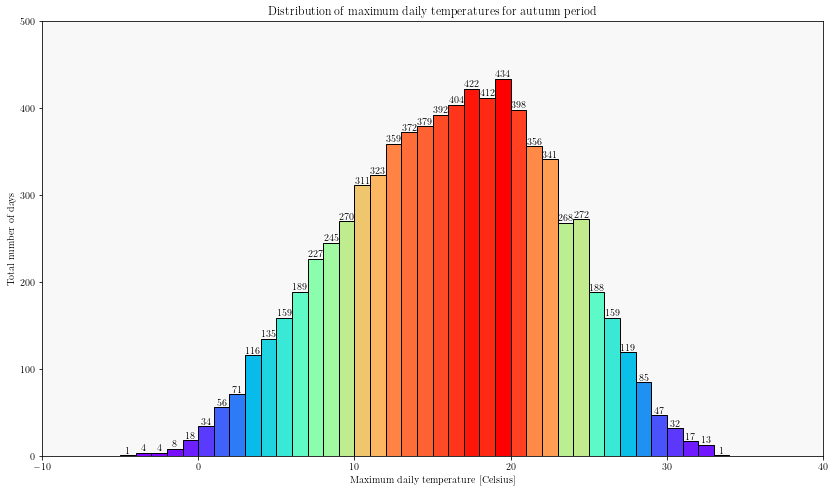

In [197]:
# Plot histogram of maximum daily temperatures for autumn period
n, bins, patches = plt.hist(x=autumn_data["temperature_2m_max (°C)"], bins=np.arange(-5, 35), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('rainbow')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((-10,40))
plt.ylim((0,500))
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Total number of days")
plt.title("Distribution of maximum daily temperatures for autumn period")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_autumn_period.pdf', bbox_inches='tight')

#### Plot histogram of maximum daily temperatures for autumn period (for each decade separately)

In [198]:
# Autumn period data by decades
_40s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 1940) & (autumn_data["time"].dt.year <= 1949)]
_50s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 1950) & (autumn_data["time"].dt.year <= 1959)]
_60s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 1960) & (autumn_data["time"].dt.year <= 1969)]
_70s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 1970) & (autumn_data["time"].dt.year <= 1979)]
_80s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 1980) & (autumn_data["time"].dt.year <= 1989)]
_90s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 1990) & (autumn_data["time"].dt.year <= 1999)]
_00s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 2000) & (autumn_data["time"].dt.year <= 2009)]
_10s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 2010) & (autumn_data["time"].dt.year <= 2019)]
_20s_autumn_days = autumn_data[(autumn_data["time"].dt.year >= 2020) & (autumn_data["time"].dt.year <= 2029)]

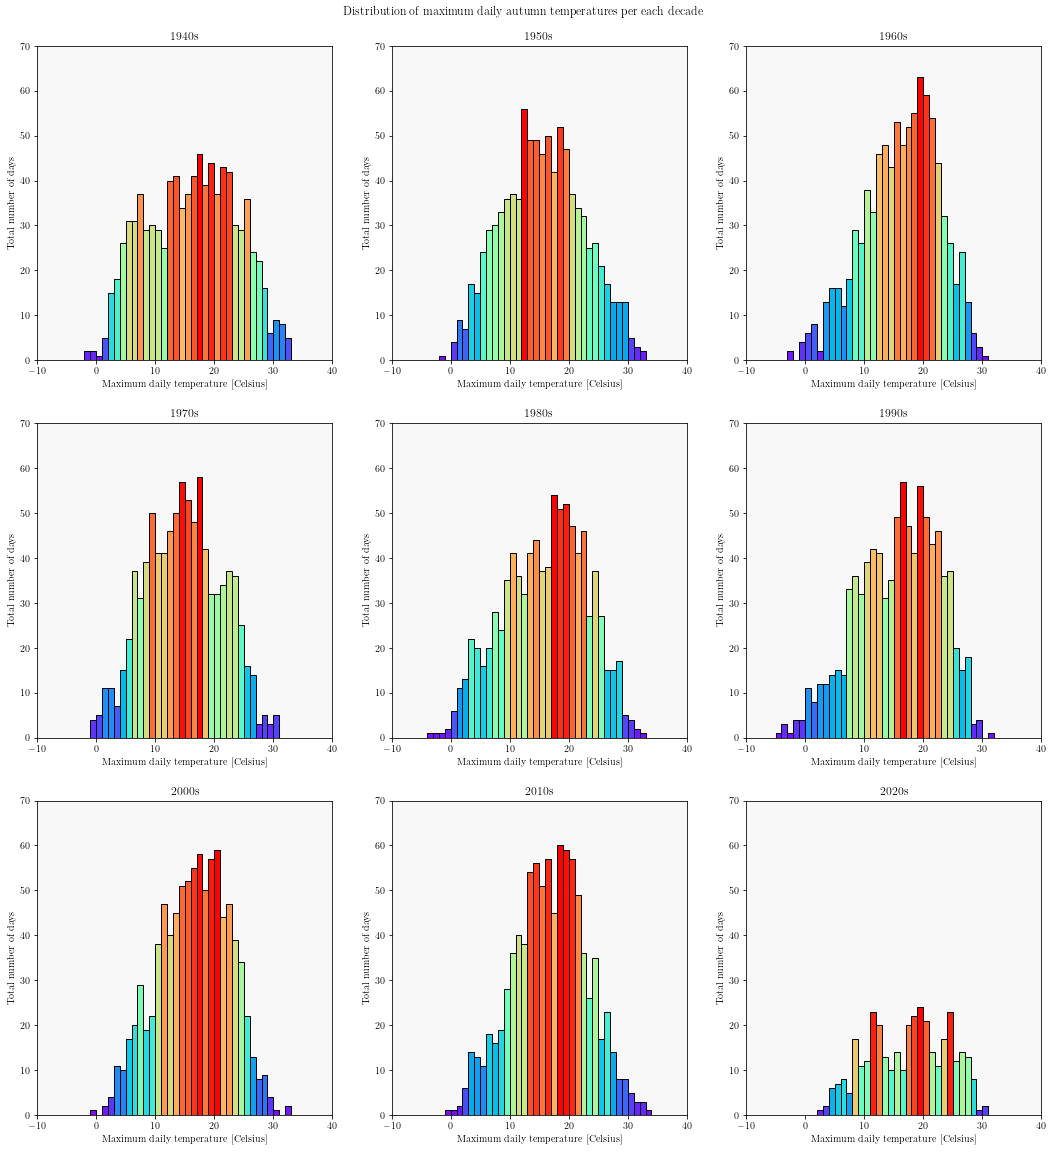

In [199]:
# Create dictionary which will be used to iterate through
max_autumn_temp_data_by_decade = {
    1: [_40s_autumn_days["temperature_2m_max (°C)"], "1940s"],
    2: [_50s_autumn_days["temperature_2m_max (°C)"], "1950s"],
    3: [_60s_autumn_days["temperature_2m_max (°C)"], "1960s"],
    4: [_70s_autumn_days["temperature_2m_max (°C)"], "1970s"],
    5: [_80s_autumn_days["temperature_2m_max (°C)"], "1980s"],
    6: [_90s_autumn_days["temperature_2m_max (°C)"], "1990s"],
    7: [_00s_autumn_days["temperature_2m_max (°C)"], "2000s"],
    8: [_10s_autumn_days["temperature_2m_max (°C)"], "2010s"],
    9: [_20s_autumn_days["temperature_2m_max (°C)"], "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in max_autumn_temp_data_by_decade.keys():
    # Plot histogram of maximum daily temperatures for autumn period by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=max_autumn_temp_data_by_decade[key][0], bins=np.arange(-5, 35), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((-10,40))
    plt.ylim((0,70))
    plt.title(max_autumn_temp_data_by_decade[key][1])
    plt.xlabel("Maximum daily temperature [Celsius]")
    plt.ylabel("Total number of days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of maximum daily autumn temperatures per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_max_daily_temperatures_for_autumn_period_per_each_decade.pdf', bbox_inches='tight')

#### Create boxplots for autumn maximum daily temperature data (for each decade)

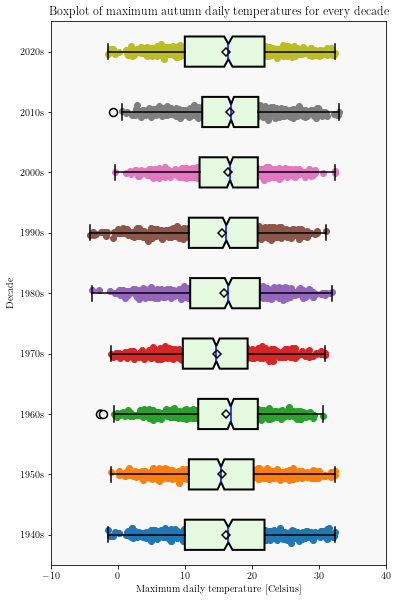

In [200]:
# Combine autumn data max daily temperature data per decade into one single dataframe
autumn_data_max_daily_temps = pd.DataFrame({"1940s": _40s_autumn_days["temperature_2m_max (°C)"],
                                            "1950s": _50s_autumn_days["temperature_2m_max (°C)"],
                                            "1960s": _60s_autumn_days["temperature_2m_max (°C)"],
                                            "1970s": _70s_autumn_days["temperature_2m_max (°C)"],
                                            "1980s": _80s_autumn_days["temperature_2m_max (°C)"],
                                            "1990s": _90s_autumn_days["temperature_2m_max (°C)"],
                                            "2000s": _00s_autumn_days["temperature_2m_max (°C)"],
                                            "2010s": _10s_autumn_days["temperature_2m_max (°C)"],
                                            "2020s": _40s_autumn_days["temperature_2m_max (°C)"]})

# Create boxplot
autumn_data_max_daily_temps.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, xlim=(-10,40), whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True)

# Make boxplot looks pretty
plt.title("Boxplot of maximum autumn daily temperatures for every decade")
plt.xlabel("Maximum daily temperature [Celsius]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(autumn_data_max_daily_temps):
   y = autumn_data_max_daily_temps[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_max_daily_temperatures_for_autumn_period_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of autumn time maximum daily temperature data

In [201]:
# Create dataframe to store data in
stat_chars_of_autumn_max_temps = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "STD", "variance", "standard error", "skewness", "kurtosis", "modes"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in max_autumn_temp_data_by_decade:
    stat_chars_of_autumn_max_temps = stat_chars_of_autumn_max_temps.append({"decade": max_autumn_temp_data_by_decade[key][1],
                                                                            "mean": max_autumn_temp_data_by_decade[key][0].mean(),
                                                                            "Q1 - 25%": max_autumn_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": max_autumn_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": max_autumn_temp_data_by_decade[key][0].quantile([0.25, 0.5, 0.75])[0.75],
                                                                            "STD": max_autumn_temp_data_by_decade[key][0].std(),
                                                                            "variance": max_autumn_temp_data_by_decade[key][0].var(),
                                                                            "standard error": max_autumn_temp_data_by_decade[key][0].sem(),
                                                                            "skewness": skew(max_autumn_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "kurtosis": kurtosis(max_autumn_temp_data_by_decade[key][0], axis=0, bias=True),
                                                                            "modes": max_autumn_temp_data_by_decade[key][0].agg(lambda x: x.mode().tolist())}, ignore_index=True)

# Print dataframe
stat_chars_of_autumn_max_temps

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2085491945.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_autumn_max_temps = stat_chars_of_autumn_max_temps.append({"decade": max_autumn_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2085491945.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_autumn_max_temps = stat_chars_of_autumn_max_temps.append({"decade": max_autumn_temp_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/2085491945.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_autumn_max_temps = stat_chars_of_autumn_max_temps.append({"decade": max_autumn_temp_data_by

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,STD,variance,standard error,skewness,kurtosis,modes
0,1940s,16.109011,10.0,16.50,21.900,7.510329,56.405045,0.248965,-0.050314,-0.873956,"[13.0, 15.8, 17.5, 20.8]"
1,1950s,15.537802,10.6,15.40,20.275,6.801262,46.257161,0.225460,0.063519,-0.572974,"[9.9, 10.8, 12.2, 12.8, 14.3, 16.4, 18.8]"
2,1960s,16.199670,12.0,16.85,20.900,6.304483,39.746502,0.208992,-0.373334,-0.315240,"[19.3, 20.3, 20.9]"
3,1970s,14.748132,9.7,14.70,19.375,6.427999,41.319177,0.213086,0.003766,-0.585454,[9.1]
4,1980s,15.858022,10.8,16.50,21.200,7.066609,49.936960,0.234256,-0.217981,-0.648200,[17.8]
5,1990s,15.581319,10.6,16.20,20.875,6.875494,47.272412,0.227920,-0.361828,-0.443281,[19.6]
6,2000s,16.455275,12.2,16.75,20.900,6.001271,36.015258,0.198940,-0.193123,-0.502616,[15.6]
7,2010s,16.722967,12.6,16.90,20.975,6.232002,38.837855,0.206589,-0.093715,-0.318106,[13.9]
8,2020s,17.333795,11.8,18.10,22.900,6.581955,43.322133,0.346419,-0.132493,-0.944029,"[11.4, 20.0]"


## Temperature distributions through years

#### Calculate average max, min and mean temperatures

In [202]:
# Calculate average mean temperature
avg_mean_temp = data["temperature_2m_mean (°C)"].mean()
# Calculate average max temperature
avg_max_temp = data["temperature_2m_max (°C)"].mean()
# Calculate average min temperature
avg_min_temp = data["temperature_2m_min (°C)"].mean()

# Print values
print("Average mean temperature:", avg_mean_temp)
print("Average maximum temperature:", avg_max_temp)
print("Average minimum temperature:", avg_min_temp)

Average mean temperature: 11.115975983815163
Average maximum temperature: 15.633400770084156
Average minimum temperature: 6.683975070155995


#### Plot max, mean and min temperatures over the years

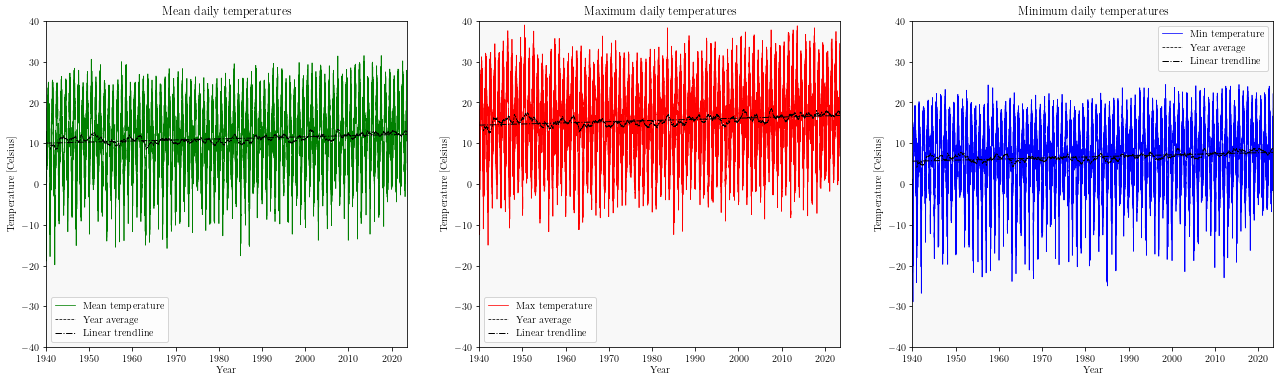

In [203]:
# Plot minimum, maximum and average temperatures over the years
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(22)
fig.set_figheight(6)
ax1.plot(data["time"], data["temperature_2m_mean (°C)"], label="Mean temperature", color="green", linestyle="-", linewidth=0.75)
ax2.plot(data["time"], data["temperature_2m_max (°C)"], label="Max temperature", color="red", linestyle="-", linewidth=0.75)
ax3.plot(data["time"], data["temperature_2m_min (°C)"], label="Min temperature", color="blue", linestyle="-", linewidth=0.75)

# Plot moving averages
ax1.plot(data["time"], data["temperature_2m_mean (°C)"].rolling(365).mean(), color="black", linestyle="--", linewidth=0.75, label="Year average")
ax2.plot(data["time"], data["temperature_2m_max (°C)"].rolling(365).mean(), color="black", linestyle="--", linewidth=0.75, label="Year average")
ax3.plot(data["time"], data["temperature_2m_min (°C)"].rolling(365).mean(), color="black", linestyle="--", linewidth=0.75, label="Year average")

# Set xlabel and ylabel names
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature [Celsius]")
ax2.set_xlabel("Year")
ax2.set_ylabel("Temperature [Celsius]")
ax3.set_xlabel("Year")
ax3.set_ylabel("Temperature [Celsius]")

# Set limits of x and y labels
ax1.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax1.set_ylim(-40, 40)
ax2.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax2.set_ylim(-40, 40)
ax3.set_xlim([dt.date(1940, 1, 1), dt.date(2023, 7, 15)])
ax3.set_ylim(-40, 40)

# Calculate linear trendlines
z_mean = np.polyfit(data["time"].dt.year, data["temperature_2m_mean (°C)"], 1)
p_mean = np.poly1d(z_mean)
z_max = np.polyfit(data["time"].dt.year, data["temperature_2m_max (°C)"], 1)
p_max = np.poly1d(z_max)
z_min = np.polyfit(data["time"].dt.year, data["temperature_2m_min (°C)"], 1)
p_min = np.poly1d(z_min)

# Plot trendlines
ax1.plot(data["time"], p_mean(data["time"].dt.year), color="black", linestyle="-.", linewidth="1", label="Linear trendline")
ax2.plot(data["time"], p_max(data["time"].dt.year), color="black", linestyle="-.", linewidth="1", label="Linear trendline")
ax3.plot(data["time"], p_min(data["time"].dt.year), color="black", linestyle="-.", linewidth="1", label="Linear trendline")

# Plot legends
ax1.legend()
ax2.legend()
ax3.legend()

# Subplot titles
ax1.set_title("Mean daily temperatures")
ax2.set_title("Maximum daily temperatures")
ax3.set_title("Minimum daily temperatures")

ax1.set_facecolor("#F8F8F8")
ax2.set_facecolor("#F8F8F8")
ax3.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('daily_temperatures_per_year.pdf', bbox_inches='tight')

#### Day with maximum temperature in Zagreb

In [204]:
# Get a day with maximum temperature in Zagreb
data[data["temperature_2m_max (°C)"] == data["temperature_2m_max (°C)"].max()]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
3838,1950-07-05,0.0,39.0,21.5,30.6,39.4,23.1,31.5,1950-07-05T04:11,1950-07-05T19:48,...,50400.0,0.0,0.0,0.0,0.0,7.9,20.2,211.0,28.23,6.84


#### Day with minimum temperature in Zagreb

In [205]:
# Get a day with minimum temperature in Zagreb
data[data["temperature_2m_min (°C)"] == data["temperature_2m_min (°C)"].min()]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
45,1940-02-15,1.0,-10.1,-28.9,-18.9,-14.8,-33.7,-23.6,1940-02-15T06:58,1940-02-15T17:21,...,33696.46,0.0,0.0,0.0,0.0,8.8,17.6,237.0,12.32,0.57


#### Statistical characteristics of maximum daily temperature data (per every year)

In [206]:
data.groupby(data["time"].dt.year)["temperature_2m_max (°C)"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
1940,365.0,12.998630,11.102023,-12.4,4.100,15.3,22.30,31.2
1941,365.0,13.931507,9.659521,-7.6,6.100,14.5,22.00,32.1
1942,365.0,14.201370,11.528871,-15.0,4.800,16.1,24.10,32.3
1943,365.0,15.845753,9.113594,-5.9,8.200,17.1,23.10,34.4
1944,366.0,14.938525,9.162399,-3.7,6.725,15.3,22.25,32.2
...,...,...,...,...,...,...,...,...
2019,365.0,17.392877,8.639454,-1.1,10.500,17.7,24.40,34.7
2020,366.0,17.224044,8.349261,0.3,10.200,18.2,24.30,32.6
2021,365.0,16.636712,8.943570,-1.8,9.300,15.5,24.10,35.6


## What about snowfalls?

#### Snow data

In [207]:
# Get snow data column
snow_data = data[["time","snowfall_sum (cm)"]]
snow_data = snow_data[snow_data["snowfall_sum (cm)"] != 0].reset_index(drop=True)
snow_data

,time,snowfall_sum (cm)
0,1940-01-04,0.42
1,1940-01-09,0.42
2,1940-01-10,0.56
3,1940-01-11,0.14
4,1940-01-12,0.07
...,...,...
2448,2023-03-01,0.14
2449,2023-03-06,0.49
2450,2023-03-28,0.21
2451,2023-11-25,0.77


#### Total daily snowfall sum per years

In [208]:
snow_data.groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].to_frame()

,snowfall_sum (cm)
time,
1940,99.33
1941,92.68
1942,102.48
1943,23.80
1944,74.97
...,...
2019,24.64
2020,21.28
2021,43.75


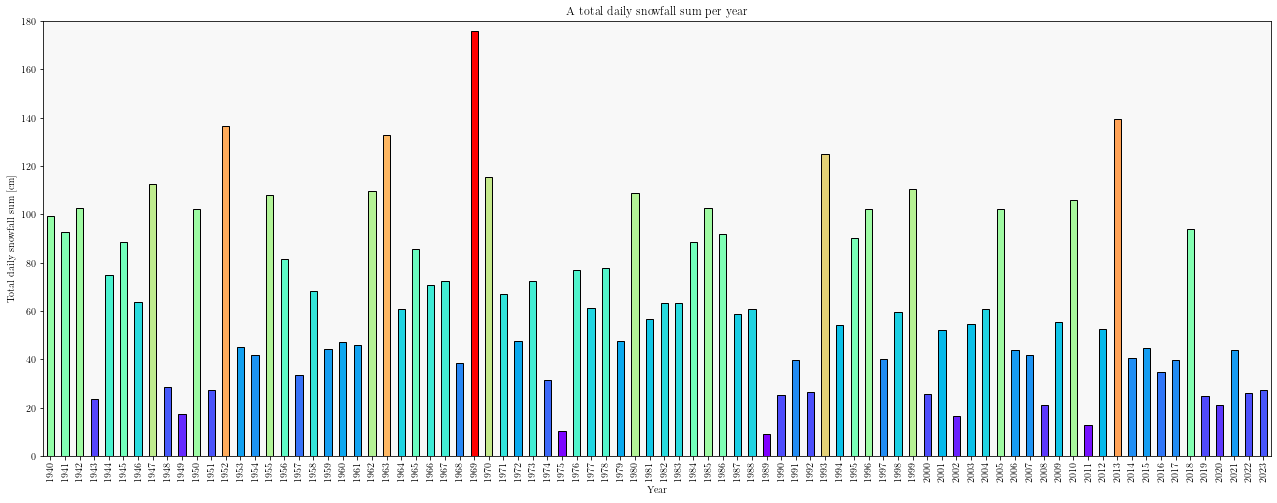

In [209]:
# Plot a total daily snowfall sum per each year
plot = snow_data.groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].plot(kind="bar", figsize=(22,8), xlabel="Year", ylabel="Total daily snowfall sum [cm]", legend=False, ylim=(0,180), color=my_cmap(rescale(snow_data.groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"])), edgecolor="black")
plt.title("A total daily snowfall sum per year")
# plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_daily_snowfall_sum_per_each_year.pdf', bbox_inches='tight')

#### Total daily snowfall sum per decades

In [210]:
# Total snowfall sums per decades
total_snowfall_sum_per_decades = {
    "1940-1949": snow_data[(snow_data["time"].dt.year >= 1940) & (snow_data["time"].dt.year <= 1949)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "1950-1959": snow_data[(snow_data["time"].dt.year >= 1950) & (snow_data["time"].dt.year <= 1959)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "1960-1969": snow_data[(snow_data["time"].dt.year >= 1960) & (snow_data["time"].dt.year <= 1969)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "1970-1979": snow_data[(snow_data["time"].dt.year >= 1970) & (snow_data["time"].dt.year <= 1979)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "1980-1989": snow_data[(snow_data["time"].dt.year >= 1980) & (snow_data["time"].dt.year <= 1989)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "1990-1999": snow_data[(snow_data["time"].dt.year >= 1990) & (snow_data["time"].dt.year <= 1999)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "2000-2009": snow_data[(snow_data["time"].dt.year >= 2000) & (snow_data["time"].dt.year <= 2009)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "2010-2019": snow_data[(snow_data["time"].dt.year >= 2010) & (snow_data["time"].dt.year <= 2019)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum(),
    "2020-2029": snow_data[(snow_data["time"].dt.year >= 2020) & (snow_data["time"].dt.year <= 2029)].groupby(snow_data["time"].dt.year).sum()["snowfall_sum (cm)"].sum()
}

total_snowfall_sum_per_decades = pd.DataFrame(total_snowfall_sum_per_decades, index=[0]).transpose().rename(columns={0: "Total daily snowfall sum per decades [cm]"})
total_snowfall_sum_per_decades

,Total daily snowfall sum per decades [cm]
1940-1949,704.13
1950-1959,688.24
1960-1969,839.86
1970-1979,608.09
1980-1989,703.92
1990-1999,673.12
2000-2009,473.90
2010-2019,588.98
2020-2029,118.51


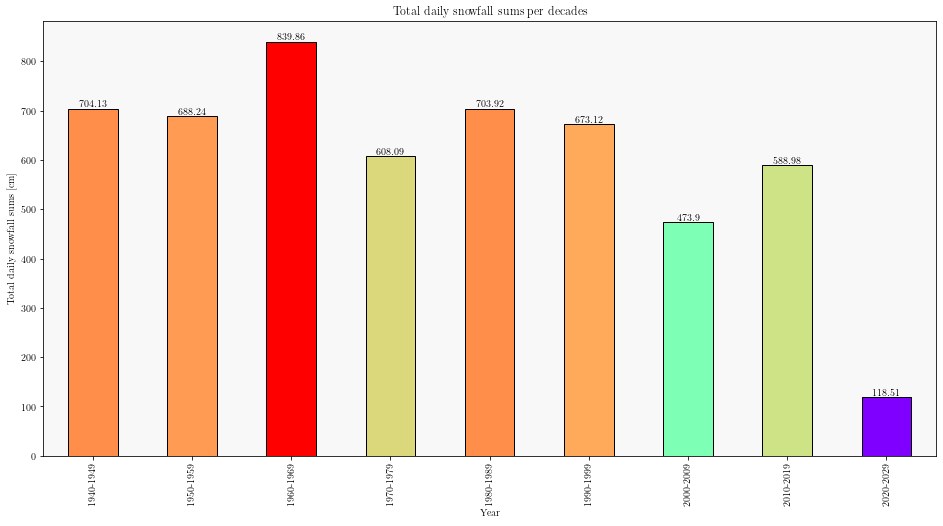

In [211]:
# Plot a total snowfall sums per decades
plot = total_snowfall_sum_per_decades["Total daily snowfall sum per decades [cm]"].plot(kind="bar", figsize=(16,8), xlabel="Year", ylabel="Total daily snowfall sums [cm]", legend=False, color=my_cmap(rescale(total_snowfall_sum_per_decades["Total daily snowfall sum per decades [cm]"])), edgecolor="black")
plt.title("Total daily snowfall sums per decades")
plt.bar_label(container=plot.containers[0])
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to pdf file
plt.savefig('total_daily_snowfall_sums_per_decades.pdf', bbox_inches='tight')

#### Snowfall data by decade

In [212]:
_40s_snowfalls = snow_data[(snow_data["time"].dt.year >= 1940) & (snow_data["time"].dt.year <= 1949)]
_50s_snowfalls = snow_data[(snow_data["time"].dt.year >= 1950) & (snow_data["time"].dt.year <= 1959)]
_60s_snowfalls = snow_data[(snow_data["time"].dt.year >= 1960) & (snow_data["time"].dt.year <= 1969)]
_70s_snowfalls = snow_data[(snow_data["time"].dt.year >= 1970) & (snow_data["time"].dt.year <= 1979)]
_80s_snowfalls = snow_data[(snow_data["time"].dt.year >= 1980) & (snow_data["time"].dt.year <= 1989)]
_90s_snowfalls = snow_data[(snow_data["time"].dt.year >= 1990) & (snow_data["time"].dt.year <= 1999)]
_00s_snowfalls = snow_data[(snow_data["time"].dt.year >= 2000) & (snow_data["time"].dt.year <= 2009)]
_10s_snowfalls = snow_data[(snow_data["time"].dt.year >= 2010) & (snow_data["time"].dt.year <= 2019)]
_20s_snowfalls = snow_data[(snow_data["time"].dt.year >= 2020) & (snow_data["time"].dt.year <= 2029)]

#### Daily snowfall sum distribution for all years

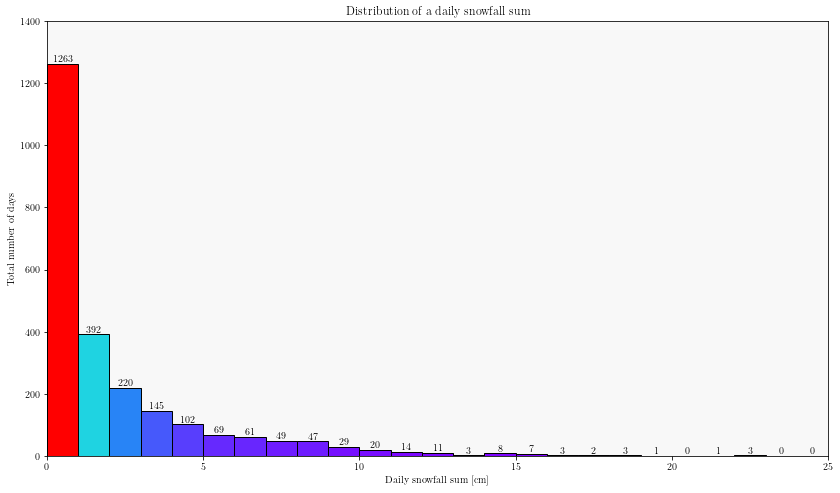

In [213]:
# Plot histogram of snowfall
n, bins, patches = plt.hist(x=snow_data["snowfall_sum (cm)"], bins=np.arange(0, 26, 1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('rainbow')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((0,25))
plt.ylim((0,1400))
plt.xlabel("Daily snowfall sum [cm]")
plt.ylabel("Total number of days")
plt.title("Distribution of a daily snowfall sum")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_snowfall_sum_per_day.pdf', bbox_inches='tight')

#### Daily snowfall sum distribution per decades

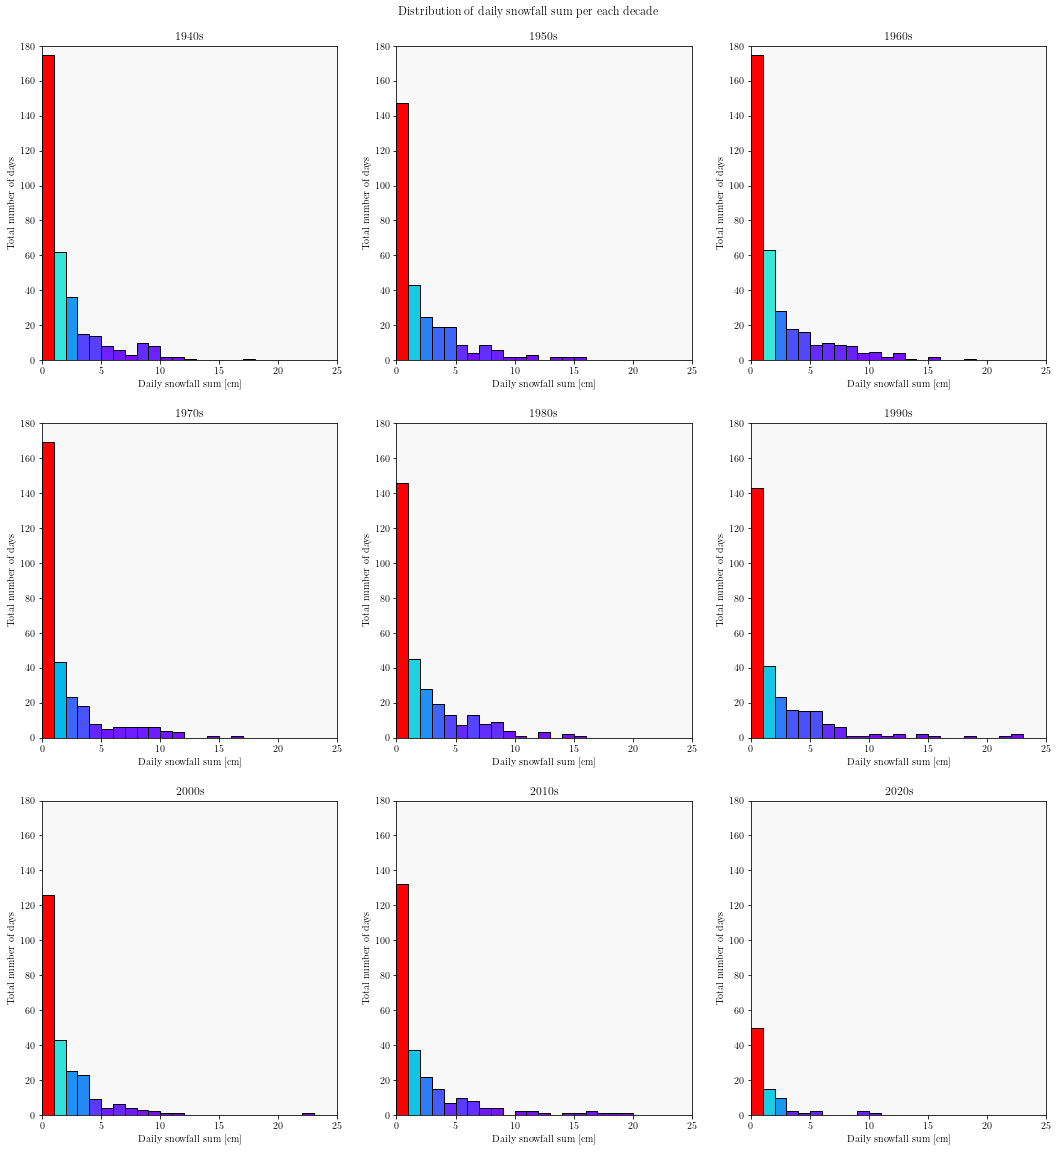

In [214]:
# Create dictionary which will be used to iterate through
snow_data_by_decade = {
    1: [_40s_snowfalls, "1940s"],
    2: [_50s_snowfalls, "1950s"],
    3: [_60s_snowfalls, "1960s"],
    4: [_70s_snowfalls, "1970s"],
    5: [_80s_snowfalls, "1980s"],
    6: [_90s_snowfalls, "1990s"],
    7: [_00s_snowfalls, "2000s"],
    8: [_10s_snowfalls, "2010s"],
    9: [_20s_snowfalls, "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in snow_data_by_decade.keys():
    # Plot histogram of snowfalls by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=snow_data_by_decade[key][0]["snowfall_sum (cm)"], bins=np.arange(0, 26, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((0,25))
    plt.ylim((0,180))
    plt.title(snow_data_by_decade[key][1])
    plt.xlabel("Daily snowfall sum [cm]")
    plt.ylabel("Total number of days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of daily snowfall sum per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_snowfall_sum_per_day_per_decades.pdf', bbox_inches='tight')

#### Create boxplots for daily snowfall sum (for each decade)

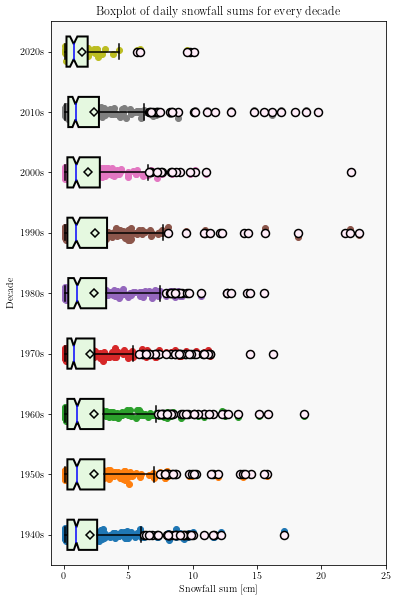

In [215]:
# Combine snowfall data per decade into one single dataframe
snowfall_data_per_decades = pd.DataFrame({  "1940s": _40s_snowfalls["snowfall_sum (cm)"],
                                            "1950s": _50s_snowfalls["snowfall_sum (cm)"],
                                            "1960s": _60s_snowfalls["snowfall_sum (cm)"],
                                            "1970s": _70s_snowfalls["snowfall_sum (cm)"],
                                            "1980s": _80s_snowfalls["snowfall_sum (cm)"],
                                            "1990s": _90s_snowfalls["snowfall_sum (cm)"],
                                            "2000s": _00s_snowfalls["snowfall_sum (cm)"],
                                            "2010s": _10s_snowfalls["snowfall_sum (cm)"],
                                            "2020s": _20s_snowfalls["snowfall_sum (cm)"]})

# Create boxplot
snowfall_data_per_decades.plot.box(figsize=(6,10), boxprops=dict(linewidth=2, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1.5), showmeans=True, meanline=False, meanprops=dict(linewidth=1.5, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1.5), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1.5, markerfacecolor="#FFEDF9"), notch=True, vert=False, whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), patch_artist=True, showfliers=True, xlim=(-1,25))

# Make boxplot looks pretty
plt.title("Boxplot of daily snowfall sums for every decade")
plt.xlabel("Snowfall sum [cm]")
plt.ylabel("Decade")
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add scatter data to boxplot
for i, d in enumerate(snowfall_data_per_decades):
   y = snowfall_data_per_decades[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)

# Save figure to .pdf file
plt.savefig('boxplot_of_daily_snowfall_sum_per_each_decade.pdf', bbox_inches='tight')

#### Statistical characteristics of daily snowfall sum data

In [216]:
# Create dataframe to store data in
stat_chars_of_snowfall_sum_data = pd.DataFrame(columns=["decade", "mean", "Q1 - 25%", "Q2 - 50% (median)", "Q3 - 75%", "skewness", "kurtosis"])

# Iterate through dictionary and determine statistical characteristics of decade data
for key in snow_data_by_decade:
    stat_chars_of_snowfall_sum_data = stat_chars_of_snowfall_sum_data.append({"decade": snow_data_by_decade[key][1],
                                                                            "mean": snow_data_by_decade[key][0]["snowfall_sum (cm)"].mean(),
                                                                            "Q1 - 25%": snow_data_by_decade[key][0]["snowfall_sum (cm)"].quantile([0.25, 0.5, 0.75])[0.25],
                                                                            "Q2 - 50% (median)": snow_data_by_decade[key][0]["snowfall_sum (cm)"].quantile([0.25, 0.5, 0.75])[0.5],
                                                                            "Q3 - 75%": snow_data_by_decade[key][0]["snowfall_sum (cm)"].quantile([0.25, 0.5, 0.75])[0.75],
                                           "skewness": skew(snow_data_by_decade[key][0]["snowfall_sum (cm)"], axis=0, bias=True),
                                           "kurtosis": kurtosis(snow_data_by_decade[key][0]["snowfall_sum (cm)"], axis=0, bias=True)}, ignore_index=True)

# Print dataframe
stat_chars_of_snowfall_sum_data

/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/4199789899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_snowfall_sum_data = stat_chars_of_snowfall_sum_data.append({"decade": snow_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/4199789899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_snowfall_sum_data = stat_chars_of_snowfall_sum_data.append({"decade": snow_data_by_decade[key][1],
/var/folders/5k/m_dgb4kd4d73mj9n7b5mlzn40000gn/T/ipykernel_12084/4199789899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_chars_of_snowfall_sum_data = stat_chars_of_snowfall_sum_data.append({"decade": snow_data_by_decade[key][1],
/var/folde

,decade,mean,Q1 - 25%,Q2 - 50% (median),Q3 - 75%,skewness,kurtosis
0,1940s,2.052857,0.28,0.980,2.590,2.119282,4.804543
1,1950s,2.340952,0.28,1.015,3.150,2.080567,4.462843
2,1960s,2.365803,0.28,1.050,3.080,2.079122,4.597048
3,1970s,2.033746,0.28,0.770,2.380,2.143282,4.480376
4,1980s,2.354247,0.35,1.050,3.290,1.870308,3.537137
5,1990s,2.395445,0.28,0.980,3.360,3.046240,11.705684
6,2000s,1.910887,0.28,0.980,2.800,3.267871,18.053236
7,2010s,2.346534,0.35,0.910,2.730,2.700575,8.117579
8,2020s,1.427831,0.21,0.770,1.855,2.799042,8.370038


#### Day-by-day daily snowfall data

In [217]:
# Every time we see a date with a difference greater than a day, we add a value to that date. 
# Otherwise it remains with the previous value so that we end up with a unique identifier per group.
snow_data['grp_date'] = snow_data["time"].diff().dt.days.ne(1).cumsum()

In [218]:
# Calculate the total number of consecutive snowy days by counting the equal grp_date values
num_of_consecutive_snowy_days = snow_data.groupby('grp_date')['grp_date'].count()

In [219]:
# Join dataframes on grp_date column values
df = snow_data.join(num_of_consecutive_snowy_days, on="grp_date", lsuffix="", rsuffix="_total_number")
# Consider only that days with number larger than 1, i.e. we shall consider two or more consecutive days
consecutive_snowy_days = df[df["grp_date_total_number"] > 1].reset_index(drop=True)
# Print consecutive snowy days dataframe
consecutive_snowy_days

,time,snowfall_sum (cm),grp_date,grp_date_total_number
0,1940-01-09,0.42,2,4
1,1940-01-10,0.56,2,4
2,1940-01-11,0.14,2,4
3,1940-01-12,0.07,2,4
4,1940-01-17,3.57,3,3
...,...,...,...,...
1877,2023-02-25,3.22,1165,3
1878,2023-02-26,9.59,1165,3
1879,2023-02-27,0.21,1165,3
1880,2023-11-25,0.77,1169,2


#### Consecutive days snowfall sum

In [220]:
# Total number of consecutive snowy days per year
consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).count()["grp_date_total_number"]

time
1940    41
1941    35
1942    40
1943     8
1944    24
        ..
2019    15
2020    10
2021    20
2022    15
2023    13
Name: grp_date_total_number, Length: 83, dtype: int64

In [221]:
# How many times consecutive snowy days occur per year?
consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).nunique()["grp_date"]

time
1940    13
1941    11
1942    11
1943     3
1944     6
        ..
2019     4
2020     4
2021     9
2022     5
2023     3
Name: grp_date, Length: 83, dtype: int64

#### Bubble plot of consecutive snowy days per years

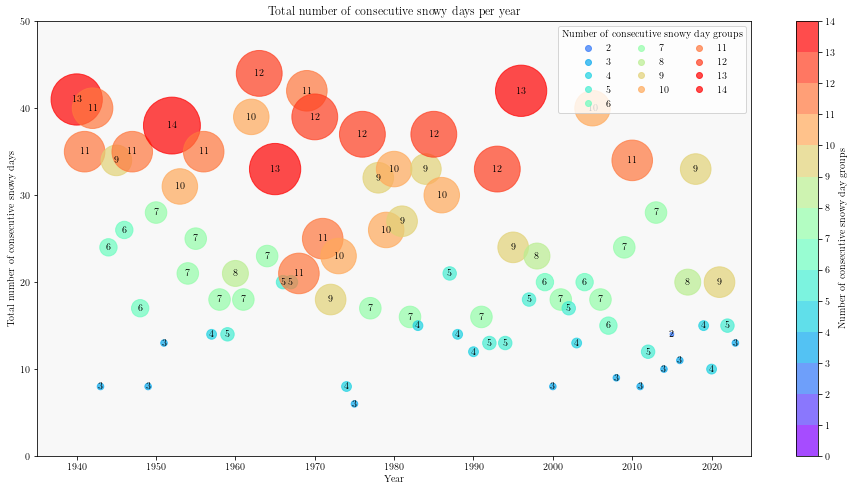

In [222]:
# Get colormap with wanted number of values (14 in our case)
cm = plt.cm.get_cmap('rainbow', 14)

# Plot scatter data using colormap
sc = plt.scatter(
    x=consecutive_snowy_days["time"].dt.year.unique(), 
    y=consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).count()["grp_date_total_number"],
    s=2*consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).nunique()["grp_date"]**2.8,
    c=consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).nunique()["grp_date"],
    alpha=0.7,
    vmin=0,
    vmax=14,
    cmap=cm)

plt.gcf().set_figwidth(16)
plt.gcf().set_figheight(8)

ax = plt.gca()
ax.set_facecolor("#F8F8F8")
ax.set_ylim((0,50))
ax.set_xlim((1935,2025))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of consecutive snowy days")
ax.set_title("Total number of consecutive snowy days per year")

# Produce a legend with a cross-section of sizes from the scatter
handles, labels = sc.legend_elements(alpha=0.7)
legend = ax.legend(handles, labels, loc="upper right", title="Number of consecutive snowy day groups", ncol=3)

# Define colorbar with a list of wanted ticks distribution
cbar = plt.gcf().colorbar(sc, ticks=[i for i in range(15)], label="Number of consecutive snowy day groups")

# Add labels to all points
for (xi, yi, zi) in zip(consecutive_snowy_days["time"].dt.year.unique().tolist(), consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).count()["grp_date_total_number"].to_list(), consecutive_snowy_days.groupby(consecutive_snowy_days["time"].dt.year).nunique()["grp_date"].to_list()):
    plt.annotate(zi, (xi,yi), ha='center', va="center")
    
# Save figure to .pdf file
plt.savefig('bubbleplot_total_number_of_consecutive_snow_days_per_year.pdf', bbox_inches='tight')                              

#### Distribution of consecutive days snowfall sum (for all years)

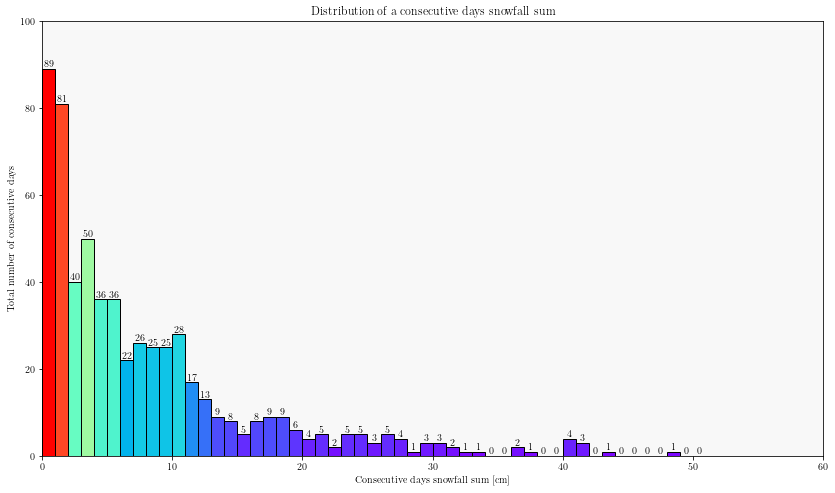

In [223]:
# Plot histogram of snowfall
n, bins, patches = plt.hist(x=consecutive_snowy_days.groupby("grp_date").sum()["snowfall_sum (cm)"], bins=np.arange(0, 52, 1), edgecolor="black")

# Add colormap to bins
col = (n-n.min())/(n.max()-n.min())
cm = plt.cm.get_cmap('rainbow')
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))

# Get current figure and make it looks pretty
figure = plt.gcf()
figure.set_figwidth(14)
figure.set_figheight(8)
plt.xlim((0,60))
plt.ylim((0,100))
plt.xlabel("Consecutive days snowfall sum [cm]")
plt.ylabel("Total number of consecutive days")
plt.title("Distribution of a consecutive days snowfall sum")
plt.bar_label(patches)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Save figure to .pdf file
plt.savefig('distribution_of_consecutive_days_snowfall_sum.pdf', bbox_inches='tight')

#### Consecutive days snowfall data by decades

In [224]:
_40s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 1940) & (consecutive_snowy_days["time"].dt.year <= 1949)]
_50s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 1950) & (consecutive_snowy_days["time"].dt.year <= 1959)]
_60s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 1960) & (consecutive_snowy_days["time"].dt.year <= 1969)]
_70s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 1970) & (consecutive_snowy_days["time"].dt.year <= 1979)]
_80s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 1980) & (consecutive_snowy_days["time"].dt.year <= 1989)]
_90s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 1990) & (consecutive_snowy_days["time"].dt.year <= 1999)]
_00s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 2000) & (consecutive_snowy_days["time"].dt.year <= 2009)]
_10s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 2010) & (consecutive_snowy_days["time"].dt.year <= 2019)]
_20s_consecutive_snowy_days = consecutive_snowy_days[(consecutive_snowy_days["time"].dt.year >= 2020) & (consecutive_snowy_days["time"].dt.year <= 2029)]

#### Distribution of consecutive days snowfall sum per decades

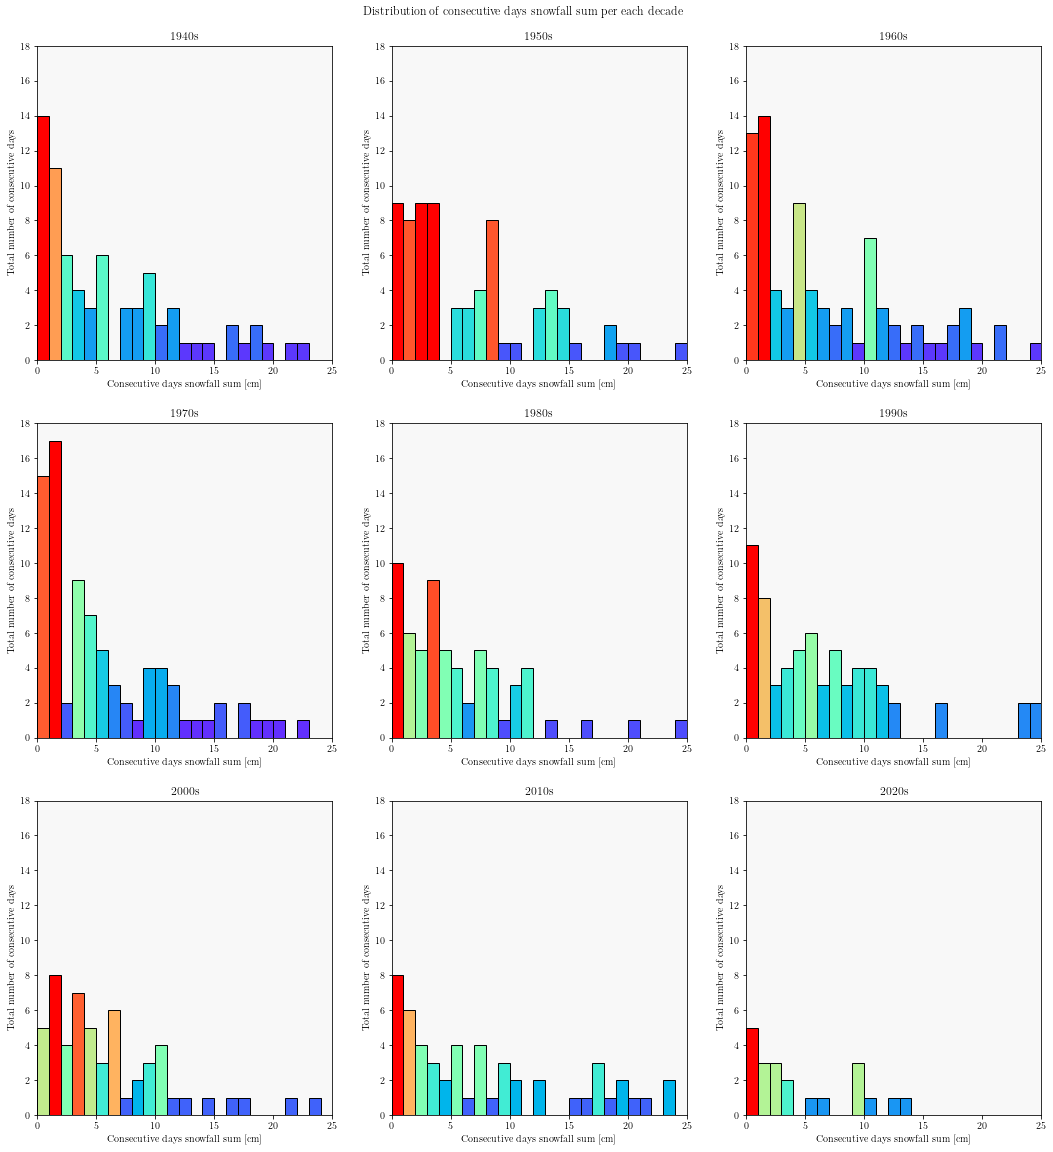

In [225]:
# Create dictionary which will be used to iterate through
consecutive_snowy_days_by_decades = {
    1: [_40s_consecutive_snowy_days, "1940s"],
    2: [_50s_consecutive_snowy_days, "1950s"],
    3: [_60s_consecutive_snowy_days, "1960s"],
    4: [_70s_consecutive_snowy_days, "1970s"],
    5: [_80s_consecutive_snowy_days, "1980s"],
    6: [_90s_consecutive_snowy_days, "1990s"],
    7: [_00s_consecutive_snowy_days, "2000s"],
    8: [_10s_consecutive_snowy_days, "2010s"],
    9: [_20s_consecutive_snowy_days, "2020s"]
}

# Iterate through dictionary key values and plot histogram subplots for every decade
for key in consecutive_snowy_days_by_decades.keys():
    # Plot histogram of consecutive daily snowfalls by decades
    plt.subplot(3, 3, key)
    n, bins, patches = plt.hist(x=consecutive_snowy_days_by_decades[key][0].groupby("grp_date").sum()["snowfall_sum (cm)"], bins=np.arange(0, 26, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((0,25))
    plt.ylim((0,18))
    plt.title(consecutive_snowy_days_by_decades[key][1])
    plt.xlabel("Consecutive days snowfall sum [cm]")
    plt.ylabel("Total number of consecutive days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of consecutive days snowfall sum per each decade")
plt.subplots_adjust(top=0.95)

# Save figure to .pdf file
plt.savefig('distribution_of_consecutive_days_snowfall_sum_per_decades.pdf', bbox_inches='tight')

## Is July 2023 really the hottest July in history (data only for Zagreb)?

#### Zagreb July data

In [226]:
# Data for Zagreb in July
data_july = data[data["time"].dt.month == 7].reset_index(drop=True)
# Print dataframe
data_july

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1940-07-01,61.0,22.7,17.0,19.6,23.7,17.6,20.3,1940-07-01T04:10,1940-07-01T19:49,...,35321.65,12.8,12.8,0.0,18.0,18.9,52.9,358.0,15.58,2.94
1,1940-07-02,61.0,27.5,17.4,22.6,29.8,18.5,24.3,1940-07-02T04:11,1940-07-02T19:49,...,50400.00,4.0,4.0,0.0,5.0,15.0,36.7,18.0,24.97,4.90
2,1940-07-03,53.0,29.4,16.4,23.6,33.6,17.4,26.6,1940-07-03T04:11,1940-07-03T19:49,...,50400.00,0.5,0.5,0.0,1.0,8.7,19.8,214.0,25.61,5.08
3,1940-07-04,55.0,29.1,17.2,22.5,32.0,19.3,25.0,1940-07-04T04:12,1940-07-04T19:48,...,48595.69,1.7,1.7,0.0,2.0,14.7,31.7,221.0,24.67,4.85
4,1940-07-05,61.0,21.1,16.6,18.9,22.7,17.5,20.2,1940-07-05T04:13,1940-07-05T19:48,...,26124.34,4.3,4.3,0.0,10.0,10.0,28.1,342.0,12.55,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,2023-07-27,2.0,22.7,12.2,18.1,22.6,12.3,18.3,2023-07-27T04:33,2023-07-27T19:32,...,50085.46,0.0,0.0,0.0,0.0,10.5,25.6,198.0,24.83,4.30
2600,2023-07-28,2.0,28.0,14.5,21.5,28.7,14.8,22.3,2023-07-28T04:34,2023-07-28T19:30,...,49957.80,0.0,0.0,0.0,0.0,17.1,38.5,231.0,25.73,5.11
2601,2023-07-29,1.0,29.3,17.7,23.5,32.5,19.0,25.6,2023-07-29T04:35,2023-07-29T19:29,...,49827.89,0.0,0.0,0.0,0.0,9.8,23.8,268.0,24.68,4.96
2602,2023-07-30,63.0,26.5,19.7,22.3,29.6,21.4,24.6,2023-07-30T04:36,2023-07-30T19:28,...,25692.78,17.6,17.6,0.0,6.0,10.9,25.9,334.0,16.10,3.15


In [227]:
# Group mean temp July data values by years and add them to dictionary
mean_temp_data_july_by_year = {}
for year in data_july["time"].dt.year.unique():
    mean_temp_data_july_by_year[year] = data_july[data_july["time"].dt.year == year]["temperature_2m_mean (°C)"].reset_index(drop=True)
mean_temp_data_july_by_year

{1940: 0     19.6
 1     22.6
 2     23.6
 3     22.5
 4     18.9
 5     20.8
 6     23.1
 7     22.1
 8     18.2
 9     18.2
 10    21.7
 11    21.4
 12    19.6
 13    18.7
 14    20.8
 15    23.0
 16    20.3
 17    20.0
 18    20.9
 19    21.9
 20    22.3
 21    20.9
 22    21.0
 23    21.3
 24    23.0
 25    24.8
 26    21.5
 27    19.9
 28    18.3
 29    16.2
 30    15.7
 Name: temperature_2m_mean (°C), dtype: float64,
 1941: 0     19.5
 1     18.7
 2     18.1
 3     19.7
 4     21.0
 5     19.9
 6     19.9
 7     19.3
 8     19.1
 9     20.8
 10    20.5
 11    22.0
 12    23.7
 13    25.5
 14    24.4
 15    23.9
 16    19.2
 17    20.7
 18    21.0
 19    22.4
 20    19.9
 21    20.4
 22    21.7
 23    21.8
 24    22.3
 25    24.7
 26    23.3
 27    22.4
 28    21.1
 29    20.4
 30    18.6
 Name: temperature_2m_mean (°C), dtype: float64,
 1942: 0     20.4
 1     21.6
 2     21.5
 3     19.1
 4     21.0
 5     22.6
 6     23.9
 7     22.8
 8     23.8
 9     24.8
 10    23.0
 11    1

#### July with maximum max daily temperature

In [228]:
data_july[data_july["temperature_2m_max (°C)"] == data_july["temperature_2m_max (°C)"].max()]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
314,1950-07-05,0.0,39.0,21.5,30.6,39.4,23.1,31.5,1950-07-05T04:11,1950-07-05T19:48,...,50400.0,0.0,0.0,0.0,0.0,7.9,20.2,211.0,28.23,6.84


#### July with minimum max daily temperature

In [229]:
data_july[data_july["temperature_2m_max (°C)"] == data_july["temperature_2m_max (°C)"].min()]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
686,1962-07-05,61.0,11.8,9.0,10.7,11.4,8.1,9.7,1962-07-05T04:12,1962-07-05T19:48,...,0.0,18.7,18.7,0.0,18.0,10.1,21.2,68.0,3.11,0.7


#### Filter out only July days with daily max temperatures larger than 30 deg

In [230]:
# Get only hot days (temperatures larger than 30 deg)
data_july_hot_days = data_july[data_july["temperature_2m_max (°C)"] > 30].reset_index(drop=True)[["time","temperature_2m_max (°C)","temperature_2m_mean (°C)"]]
# Print dataframe
data_july_hot_days

,time,temperature_2m_max (°C),temperature_2m_mean (°C)
0,1940-07-16,30.7,23.0
1,1940-07-26,31.2,24.8
2,1941-07-14,31.9,25.5
3,1942-07-07,30.7,23.9
4,1942-07-10,30.1,24.8
...,...,...,...
477,2023-07-16,32.6,26.4
478,2023-07-17,34.5,27.8
479,2023-07-18,32.5,26.8
480,2023-07-19,31.9,24.9


#### Filter out total number of July hot days for each year

In [231]:
# Get total number of July hot days for each year
num_of_july_hot_days_per_year = data_july_hot_days.groupby(data_july_hot_days["time"].dt.year)["temperature_2m_max (°C)"].count().rename("Number of hot days")
# Print series
num_of_july_hot_days_per_year

time
1940     2
1941     1
1942     3
1943     2
1944     1
        ..
2019    13
2020     8
2021    11
2022    11
2023     9
Name: Number of hot days, Length: 72, dtype: int64

#### Bubble plot the total number of July hot days per each year

In [232]:
# July mean temperature of July temperatures for every year
data_july_mean_temps = data_july.groupby(data_july["time"].dt.year)["temperature_2m_mean (°C)"].mean()
# Print dataframe
data_july_mean_temps

time
1940    20.735484
1941    21.158065
1942    20.683871
1943    20.822581
1944    21.041935
          ...    
2019    23.274194
2020    22.058065
2021    23.874194
2022    23.803226
2023    23.235484
Name: temperature_2m_mean (°C), Length: 84, dtype: float64

In [233]:
temps_data_july = pd.concat((num_of_july_hot_days_per_year, data_july_mean_temps), axis=1, join="outer").fillna(0).sort_values(by="time")
temps_data_july["Number of hot days"] = temps_data_july["Number of hot days"].astype(int)
temps_data_july

,Number of hot days,temperature_2m_mean (°C)
time,,
1940,2,20.735484
1941,1,21.158065
1942,3,20.683871
1943,2,20.822581
1944,1,21.041935
...,...,...
2019,13,23.274194
2020,8,22.058065
2021,11,23.874194


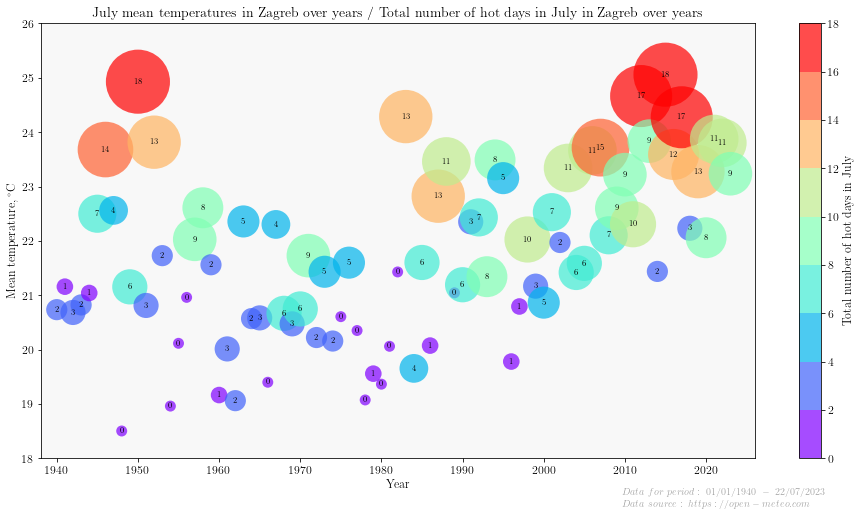

In [234]:
# Get colormap with wanted number of values (13 in our case)
cm = plt.cm.get_cmap('rainbow',9)

# Plot scatter data using colormap
sc = plt.scatter(
    x=data_july["time"].dt.year.unique(), 
    y=temps_data_july["temperature_2m_mean (°C)"],
    s=120*(temps_data_july["Number of hot days"]+1)**1.2,
    c=temps_data_july["Number of hot days"],
    alpha=0.7,
    vmin=0,
    vmax=18,
    cmap=cm,
    linewidths=0)

plt.gcf().set_figwidth(16)
plt.gcf().set_figheight(8)

ax = plt.gca()
ax.set_facecolor("#F8F8F8")
ax.set_ylim((18,26))
ax.set_xlim((1938,2026))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel("Year", fontdict={"fontsize": 12})
ax.set_ylabel(r'Mean temperature, $^{\circ}$\textrm{C}', fontdict={"fontsize": 12})
ax.set_title("July mean temperatures in Zagreb over years / Total number of hot days in July in Zagreb over years", fontdict={"fontsize": 14})

# Produce a legend with a cross-section of sizes from the scatter
# handles, labels = sc.legend_elements(alpha=0.7)
# legend = ax.legend(handles, labels, loc="lower right", title="Total number of hot days in July", ncol=4)

# Define colorbar with a list of wanted ticks distribution
cbar = plt.gcf().colorbar(sc, ticks=np.arange(0,19,2))
cbar.ax.tick_params(axis="both", labelsize=12)
cbar.set_label("Total number of hot days in July", fontsize=12)

# Add reference
plt.gcf().text(0.63, 0.06, r'$Data\ for\ period:\ 01/01/1940\ -\ 22/07/2023$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)
plt.gcf().text(0.63, 0.04, r'$Data\ source:\ https://open-meteo.com$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)

# Add labels to all points
for (xi, yi, zi) in zip(data_july["time"].dt.year.unique().tolist(), temps_data_july["Number of hot days"].tolist(), temps_data_july["temperature_2m_mean (°C)"].tolist()):
    plt.annotate(yi, (xi, zi), ha='center', va="center", fontsize=8)
    
# Save figure to .pdf and .png file
plt.savefig('bubbleplot_temperatures_for_july_over_years.pdf', bbox_inches='tight')
plt.savefig('bubbleplot_temperatures_for_july_over_years.png', bbox_inches='tight', dpi=500, facecolor='white')

#### Get year with largest mean temperature

In [235]:
data_july[data_july["temperature_2m_mean (°C)"] == data_july["temperature_2m_mean (°C)"].max()]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
2096,2007-07-20,1.0,37.8,23.5,31.4,40.8,25.8,33.3,2007-07-20T04:25,2007-07-20T19:39,...,50400.0,0.0,0.0,0.0,0.0,7.6,23.4,242.0,25.41,6.11


#### Get year with lowest mean temperature

In [236]:
data_july[data_july["temperature_2m_mean (°C)"] == data_july["temperature_2m_mean (°C)"].min()]

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
686,1962-07-05,61.0,11.8,9.0,10.7,11.4,8.1,9.7,1962-07-05T04:12,1962-07-05T19:48,...,0.0,18.7,18.7,0.0,18.0,10.1,21.2,68.0,3.11,0.7


#### Distribution of daily mean temperature in July for every year

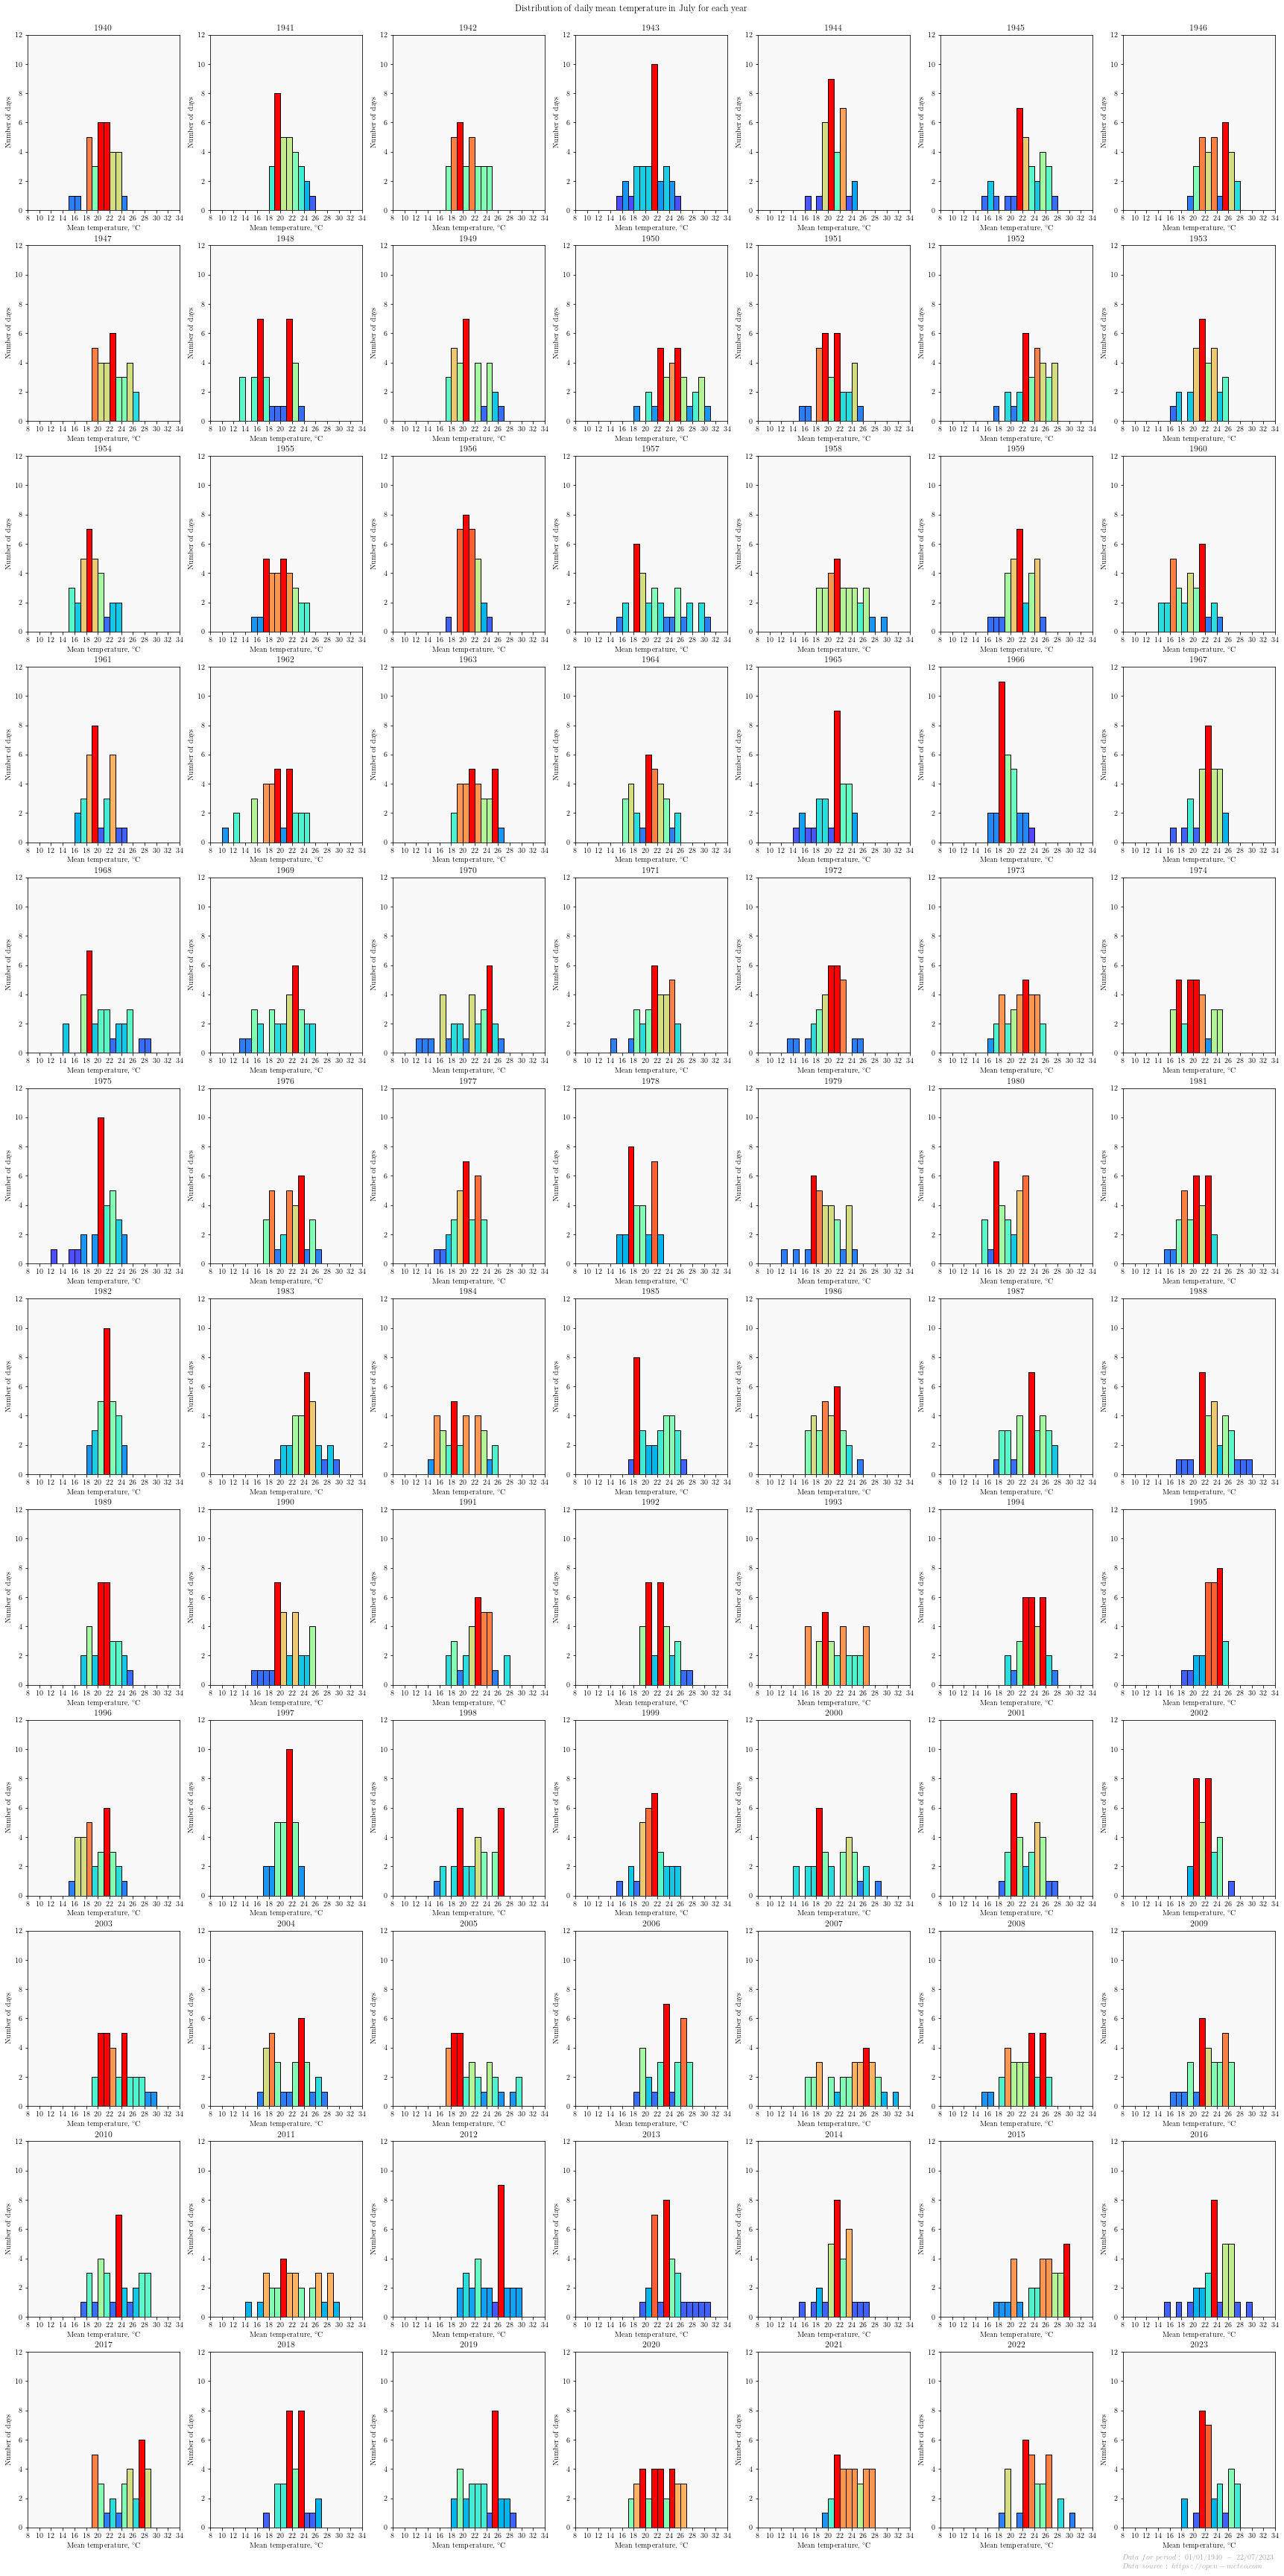

In [237]:
i = 0
for year in mean_temp_data_july_by_year.keys():
    # Plot histogram of consecutive daily snowfalls by decades
    plt.subplot(12, 7, i+1)
    n, bins, patches = plt.hist(x=mean_temp_data_july_by_year[year], bins=np.arange(8, 34, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((8,34))
    plt.ylim((0,12))
    plt.title(data_july["time"].dt.year.unique()[i])
    plt.xlabel(r'Mean temperature, $^{\circ}$\textrm{C}')
    plt.ylabel("Number of days")
    plt.xticks(np.arange(8, 36, 2))
    # plt.ylabel("Total number of consecutive days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")
    i += 1

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(30)
figure.set_figheight(55)
plt.suptitle("Distribution of daily mean temperature in July for each year")
plt.subplots_adjust(top=0.97)

# Add reference
plt.gcf().text(0.805, 0.114, r'$Data\ for\ period:\ 01/01/1940\ -\ 22/07/2023$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)
plt.gcf().text(0.805, 0.111, r'$Data\ source:\ https://open-meteo.com$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)

# Save figure to .pdf and .png file
plt.savefig('histograms_temperatures_for_july_over_years.pdf', bbox_inches='tight')
plt.savefig('histograms_temperatures_for_july_over_years.png', bbox_inches='tight', dpi=300, facecolor='white')

#### Boxplot of daily mean temperatures for every year

In [238]:
df = pd.DataFrame()

for year in mean_temp_data_july_by_year.keys():
   df.insert(column=int(f"{year}"), loc=df.shape[1], value=mean_temp_data_july_by_year[year])

df = df.reset_index(drop=True)
df

,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,19.6,19.5,20.4,16.6,20.8,20.5,26.2,22.2,15.1,17.3,...,18.4,23.5,24.9,20.8,17.5,26.5,25.7,19.6,28.2,21.1
1,22.6,18.7,21.6,17.9,21.3,17.5,26.8,21.5,15.8,18.0,...,21.2,25.4,25.8,20.4,19.0,25.5,24.7,20.4,23.9,22.6
2,23.6,18.1,21.5,19.2,22.5,16.8,25.7,20.9,16.2,17.1,...,20.2,25.5,20.7,21.0,21.5,24.6,20.7,21.8,25.5,22.4
3,22.5,19.7,19.1,20.1,22.4,15.9,26.8,22.8,16.0,18.8,...,21.7,25.2,21.5,22.5,21.4,19.9,21.2,22.6,26.7,20.9
4,18.9,21.0,21.0,21.2,19.4,16.4,27.9,23.2,17.2,20.8,...,22.2,26.5,23.6,25.1,23.3,23.1,22.9,21.0,23.5,21.6
5,20.8,19.9,22.6,21.4,20.2,19.3,27.3,23.9,13.8,19.9,...,23.4,27.6,23.2,26.3,20.6,25.8,24.1,23.9,23.8,21.4
6,23.1,19.9,23.9,19.8,22.5,21.0,23.7,24.2,16.7,20.6,...,25.5,29.7,21.8,27.0,21.1,23.0,18.0,27.2,21.6,21.5
7,22.1,19.3,22.8,18.9,24.2,21.7,21.3,25.0,17.8,20.2,...,22.2,28.1,23.7,27.3,20.9,20.5,19.4,27.5,19.3,22.4
8,18.2,19.1,23.8,15.9,24.2,21.1,19.5,25.3,13.6,18.6,...,18.9,20.6,25.0,28.3,21.2,19.0,22.7,27.1,19.2,24.4
9,18.2,20.8,24.8,16.6,20.2,21.8,21.0,19.5,13.5,18.7,...,15.1,20.8,26.0,28.8,22.4,18.1,25.2,24.2,19.6,26.8


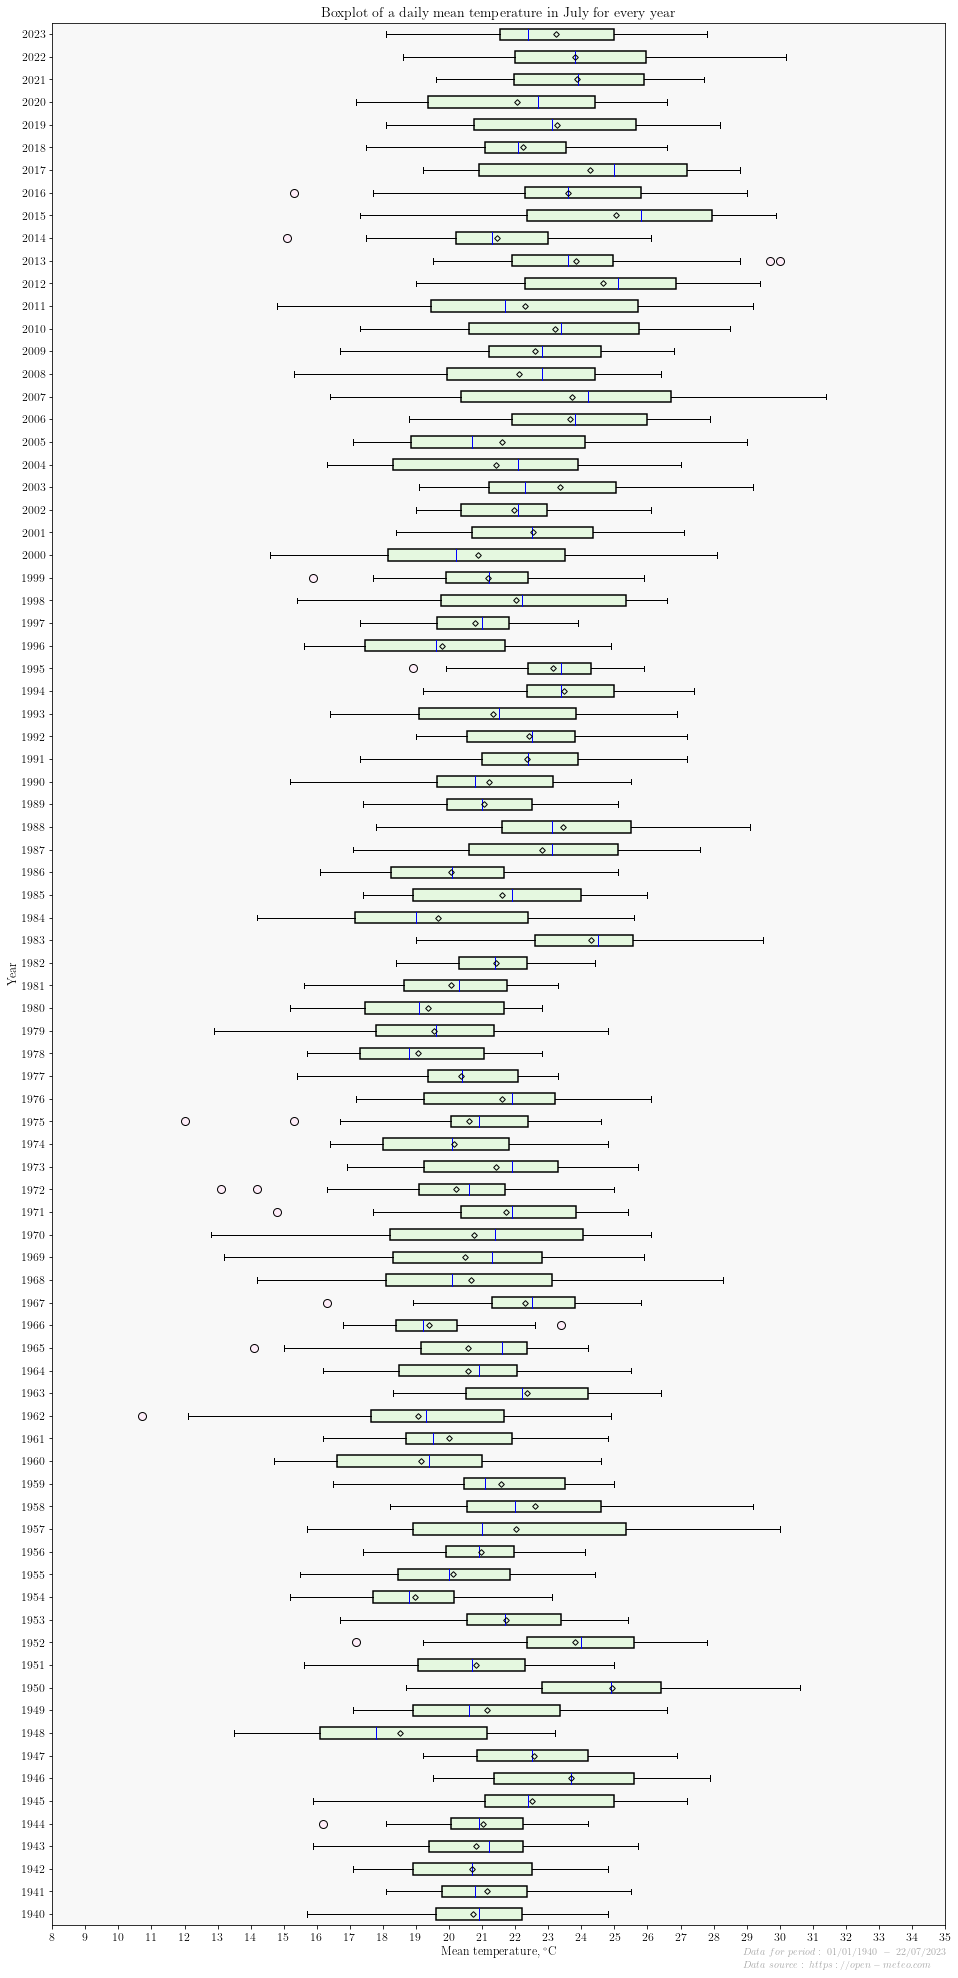

In [239]:
# Create boxplot
df.plot.box(figsize=(16,35), boxprops=dict(linewidth=1.5, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1), showmeans=True, meanline=False, meanprops=dict(linewidth=1, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1, markersize=4), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, markerfacecolor="#FFEDF9"), notch=False, vert=False, whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1), patch_artist=True, showfliers=True, xlim=(8,34))

# Make boxplot looks pretty
plt.title("Boxplot of a daily mean temperature in July for every year", fontsize=14)
plt.xlabel(r'Mean temperature, $^{\circ}$\textrm{C}', fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(np.arange(8, 36, 1), fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add reference
plt.gcf().text(0.725, 0.113, r'$Data\ for\ period:\ 01/01/1940\ -\ 22/07/2023$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)
plt.gcf().text(0.725, 0.108, r'$Data\ source:\ https://open-meteo.com$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)

# Save figure to .pdf and .png file
plt.savefig('boxplot_temperatures_for_july_over_years.pdf', bbox_inches='tight')
plt.savefig('boxplot_temperatures_for_july_over_years.png', bbox_inches='tight', dpi=300, facecolor='white')

#### Boxplot of a daily mean temperature in July for every decade

In [240]:
#### July mean temperatures by decades

mean_temp_data_july_by_decade = dict()

for year in np.arange(data_july["time"].dt.year.unique().min(), data_july["time"].dt.year.unique().max(), 10):
    mean_temp_data_july_by_decade[f"{year}s"] = data_july[(data_july["time"].dt.year >= year) & (data_july["time"].dt.year <= (year + 9))]["temperature_2m_mean (°C)"].reset_index(drop=True)
    
mean_temp_data_july_by_decade

{'1940s': 0      19.6
 1      22.6
 2      23.6
 3      22.5
 4      18.9
        ... 
 305    23.9
 306    25.3
 307    26.6
 308    25.0
 309    24.1
 Name: temperature_2m_mean (°C), Length: 310, dtype: float64,
 '1950s': 0      28.9
 1      29.3
 2      29.8
 3      29.5
 4      30.6
        ... 
 305    22.7
 306    23.7
 307    24.5
 308    24.0
 309    20.9
 Name: temperature_2m_mean (°C), Length: 310, dtype: float64,
 '1960s': 0      14.7
 1      15.5
 2      16.8
 3      16.3
 4      17.7
        ... 
 305    25.1
 306    25.9
 307    23.2
 308    21.0
 309    19.9
 Name: temperature_2m_mean (°C), Length: 310, dtype: float64,
 '1970s': 0      16.8
 1      19.0
 2      16.3
 3      13.6
 4      16.0
        ... 
 305    19.8
 306    19.6
 307    21.5
 308    23.0
 309    24.8
 Name: temperature_2m_mean (°C), Length: 310, dtype: float64,
 '1980s': 0      17.3
 1      15.6
 2      15.2
 3      17.2
 4      18.4
        ... 
 305    21.0
 306    20.0
 307    20.5
 308    21.4
 309 

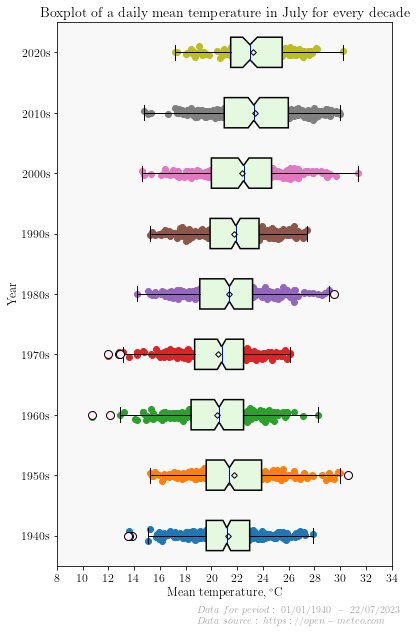

In [241]:
# Create boxplot
pd.DataFrame(mean_temp_data_july_by_decade).plot.box(figsize=(6,10), boxprops=dict(linewidth=1.5, facecolor="#e5f8e0"), medianprops=dict(color="blue",linewidth=1), showmeans=True, meanline=False, meanprops=dict(linewidth=1, marker='D', markeredgecolor='black', markerfacecolor="none", markeredgewidth=1, markersize=4), flierprops=dict(marker='o', markersize=8, markeredgecolor='black', markeredgewidth=1, markerfacecolor="#FFEDF9"), notch=True, vert=False, whiskerprops=dict(linewidth=1), capprops=dict(linewidth=1), patch_artist=True, showfliers=True, xlim=(8,34))

# Make boxplot looks pretty
plt.title("Boxplot of a daily mean temperature in July for every decade", fontsize=14)
plt.xlabel(r'Mean temperature, $^{\circ}$\textrm{C}', fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(np.arange(8, 36, 2), fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.set_facecolor("#F8F8F8")

# Add reference
plt.gcf().text(0.45, 0.06, r'$Data\ for\ period:\ 01/01/1940\ -\ 22/07/2023$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)
plt.gcf().text(0.45, 0.045, r'$Data\ source:\ https://open-meteo.com$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)

# Add scatter data to boxplot
for i, d in enumerate(pd.DataFrame(mean_temp_data_july_by_decade)):
   y = pd.DataFrame(mean_temp_data_july_by_decade)[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(y,x)
   
# Save figure to .pdf and .png file
plt.savefig('boxplot_temperatures_for_july_over_decades.pdf', bbox_inches='tight')
plt.savefig('boxplot_temperatures_for_july_over_decades.png', bbox_inches='tight', dpi=300, facecolor='white')

#### Histograms of a daily mean temperature in July for every decade

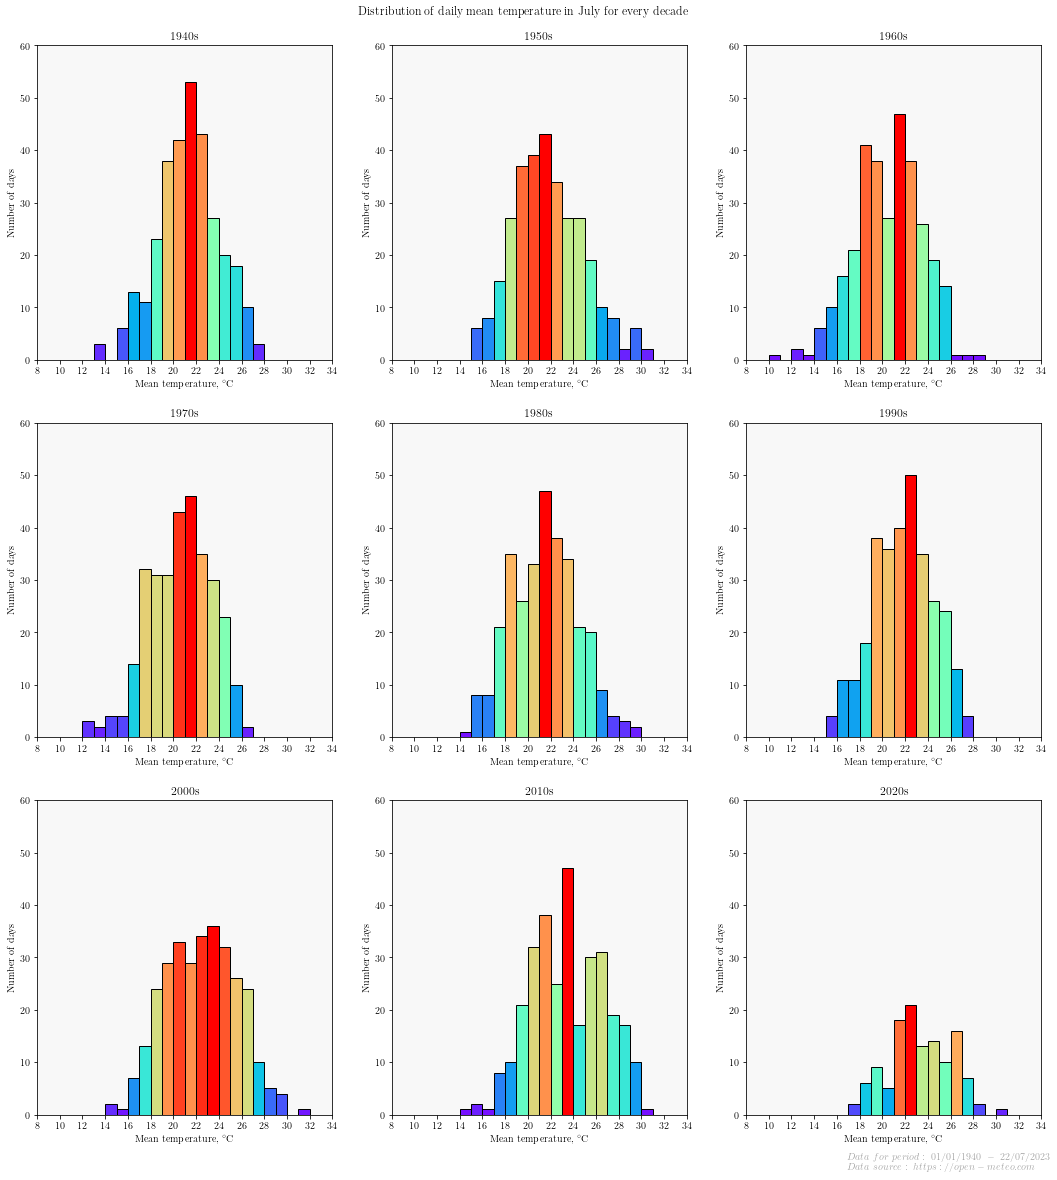

In [242]:
i = 1
for key in mean_temp_data_july_by_decade.keys():
    # Plot histogram of consecutive daily snowfalls by decades
    plt.subplot(3, 3, i)
    n, bins, patches = plt.hist(x=mean_temp_data_july_by_decade[key], bins=np.arange(8, 34, 1), edgecolor="black")

    # Add colormap to bins
    col = (n-n.min())/(n.max()-n.min())
    cm = plt.cm.get_cmap('rainbow')
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    plt.xlim((8,34))
    plt.ylim((0,60))
    plt.title(key)
    plt.xlabel(r'Mean temperature, $^{\circ}$\textrm{C}')
    plt.ylabel("Number of days")
    plt.xticks(np.arange(8, 36, 2))
    # plt.ylabel("Total number of consecutive days")
    ax = plt.gca()
    ax.set_facecolor("#F8F8F8")

    i += 1

# Make figure looks pretty
figure = plt.gcf()
figure.set_figwidth(18)
figure.set_figheight(18)
plt.suptitle("Distribution of daily mean temperature in July for every decade")
plt.subplots_adjust(top=0.95)

# Add reference
plt.gcf().text(0.75, 0.09, r'$Data\ for\ period:\ 01/01/1940\ -\ 22/07/2023$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)
plt.gcf().text(0.75, 0.082, r'$Data\ source:\ https://open-meteo.com$', horizontalalignment='left', fontdict=dict(color="#a7a7a7"), wrap=True)

# Save figure to .pdf and .png file
plt.savefig('histograms_temperatures_for_july_over_decades.pdf', bbox_inches='tight')
plt.savefig('histograms_temperatures_for_july_over_decades.png', bbox_inches='tight', dpi=300, facecolor='white')